In [581]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\ipobo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['legend', 'random', 'size', 'axes', 'degrees']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [582]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import igraph as ig
import hypernetx as hnx
from hypernetx import drawing
import hypernetx.algorithms.generative_models as gm
import hypernetx.algorithms.hypergraph_modularity as hmod
import hnxwidget as hnxw
import scipy as sc
#import graphviz
import math
import warnings
from collections import defaultdict
import pandas as pd
from hypernetx import Hypergraph
from networkx.algorithms.community import k_clique_communities

from netgraph import Graph
import community
from community import community_louvain
from collections import Counter

from itertools import chain
import matplotlib.patches as mpatches
import time

from clusim.clustering import Clustering, print_clustering
import clusim.sim as sim

from transpose_dict import TD

In [583]:
def grapher(n, m, p, x):
    if ((n == 0 or m == 0) and p == 0):
        H = hnx.Hypergraph(x)
    else:
        H = gm.erdos_renyi_hypergraph(n, m, p)
    return H

def drawer(H):
    rubberband = hnx.drawing.rubber_band.draw(H)
    #try:    
    #    bipartit = hnx.drawing.two_column.draw(H)
    #except:
    #    print("No Bipartit for this one")
    #else:
    #    print("Nothing went wrong")
    normal = hmod.two_section(H)
    
    
    return rubberband, normal

start = time.time()

# Write the Julia command here

In [584]:
fallout3 = pd.read_csv('./50_0.0_linear_he.txt', delimiter="  ", header = None).to_dict()[0]

comms = np.loadtxt('./50_0.0_linear_comm.txt')
assign = np.loadtxt('./50_0.0_linear_assign.txt')
deg = np.loadtxt('./50_0.0_linear_deg.txt')

f03 = {key: list(map(int, value.split())) for key, value in fallout3.items()}

for i in range(0, len(list(f03.keys()))):
    newkeys = (['l' + str(x) for x in range(len(f03))])
    f03[newkeys[i]]=f03.pop(list(f03.keys())[0])


C:\Users\ipobo\AppData\Local\Temp\ipykernel_19412\1468960960.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fallout3 = pd.read_csv('./50_0.0_linear_he.txt', delimiter="  ", header = None).to_dict()[0]


# Plots

Hyperedges for 0.5 linear -- fallout:


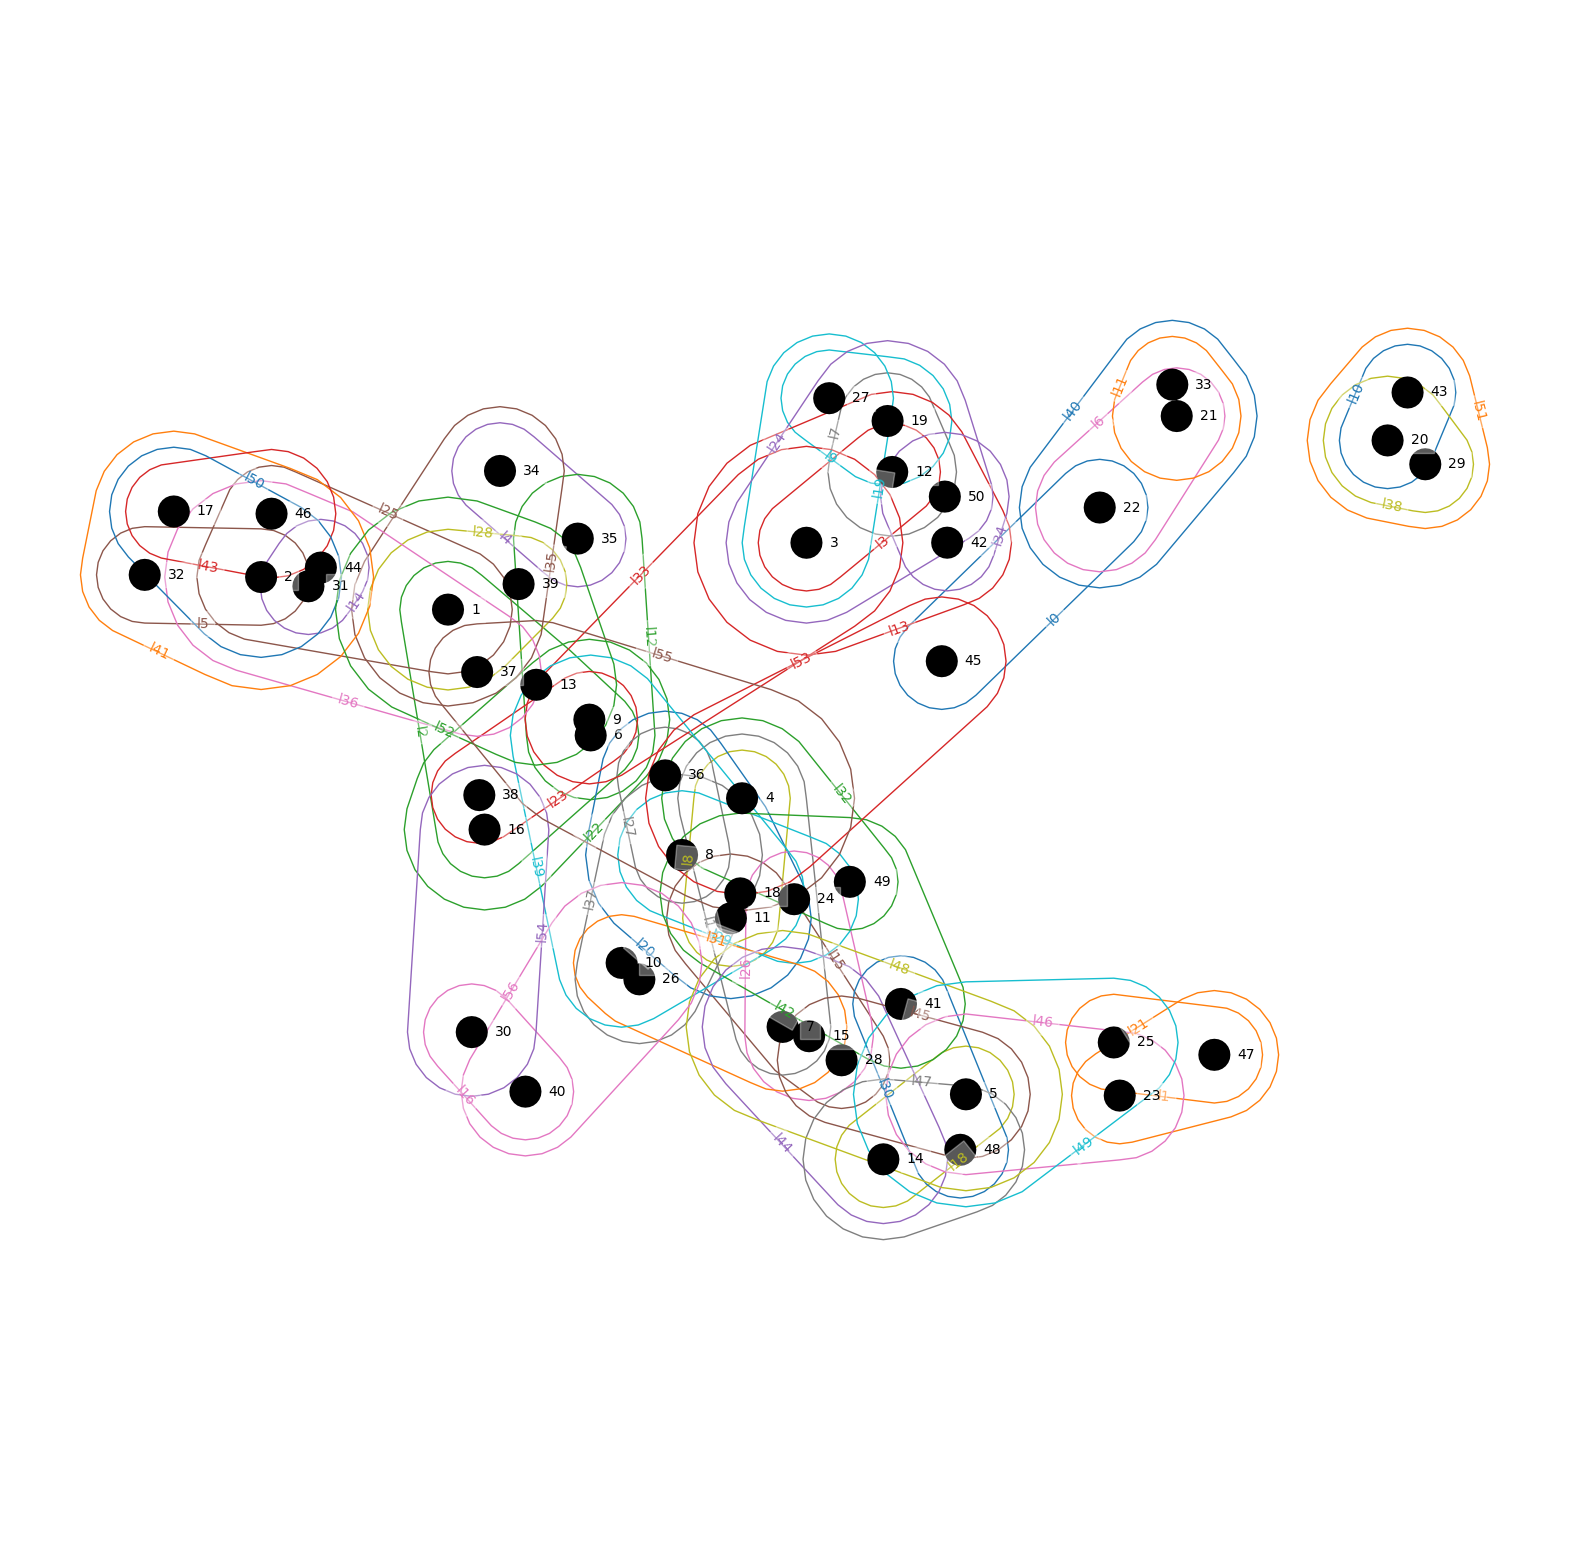

In [585]:
f03p = grapher(0 ,0 ,0 ,f03)
f03p_1, f03p_2 = drawer(f03p)

plt.rcParams['figure.figsize'] = [20, 20]

print("Hyperedges for 0.5 linear -- fallout:")
f03p_1

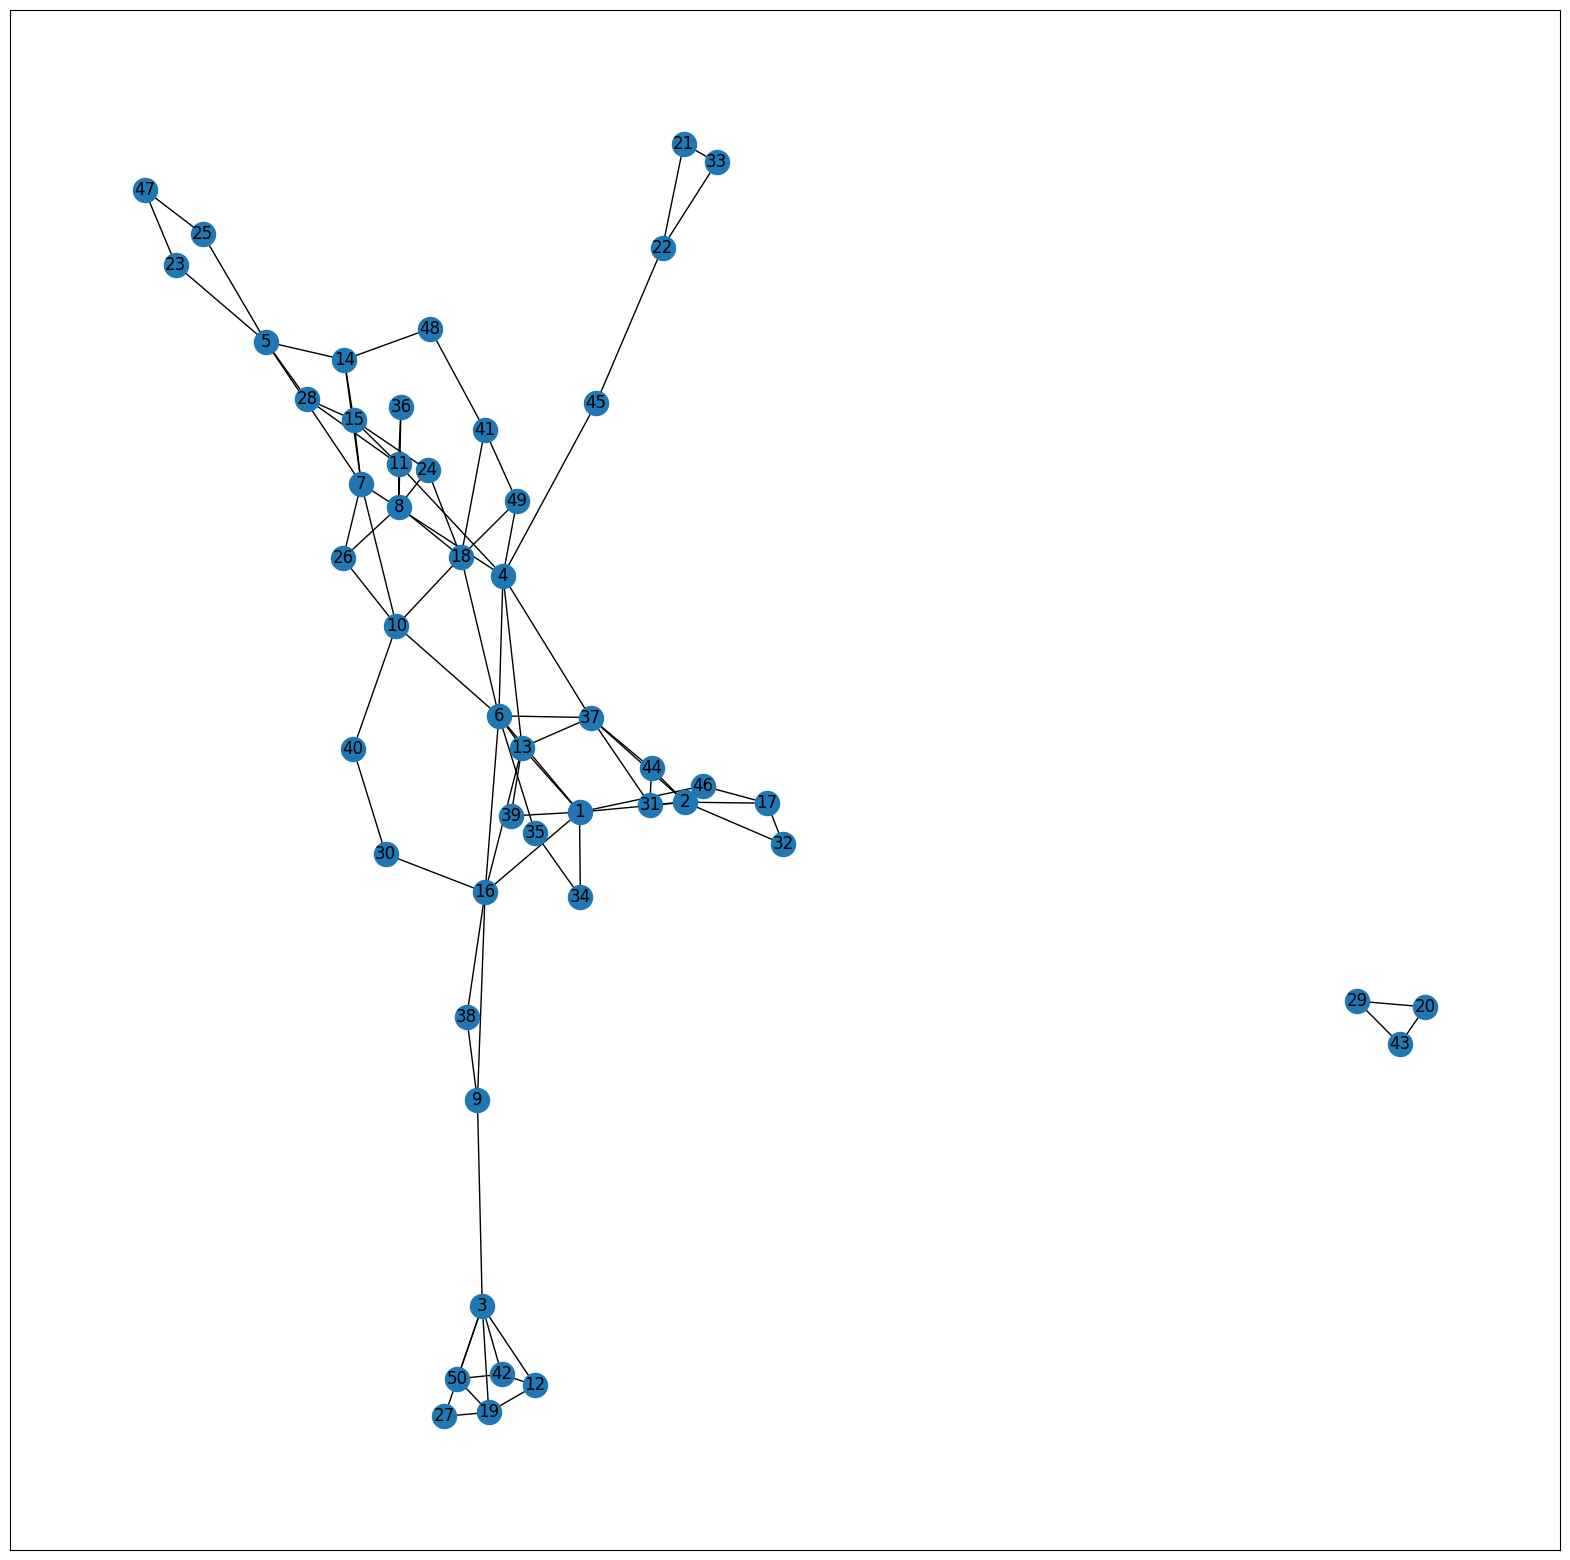

In [586]:
G = nx.Graph()
names = f03p_2.vs['name']
G.add_nodes_from(names)
G.add_edges_from([(names[x[0]], (names[x[1]])) for x in f03p_2.get_edgelist()])

pos = nx.spring_layout(G)

nx.draw_networkx(G, pos, arrows=None, with_labels=True)


<class 'networkx.utils.decorators.argmap'> compilation 20:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


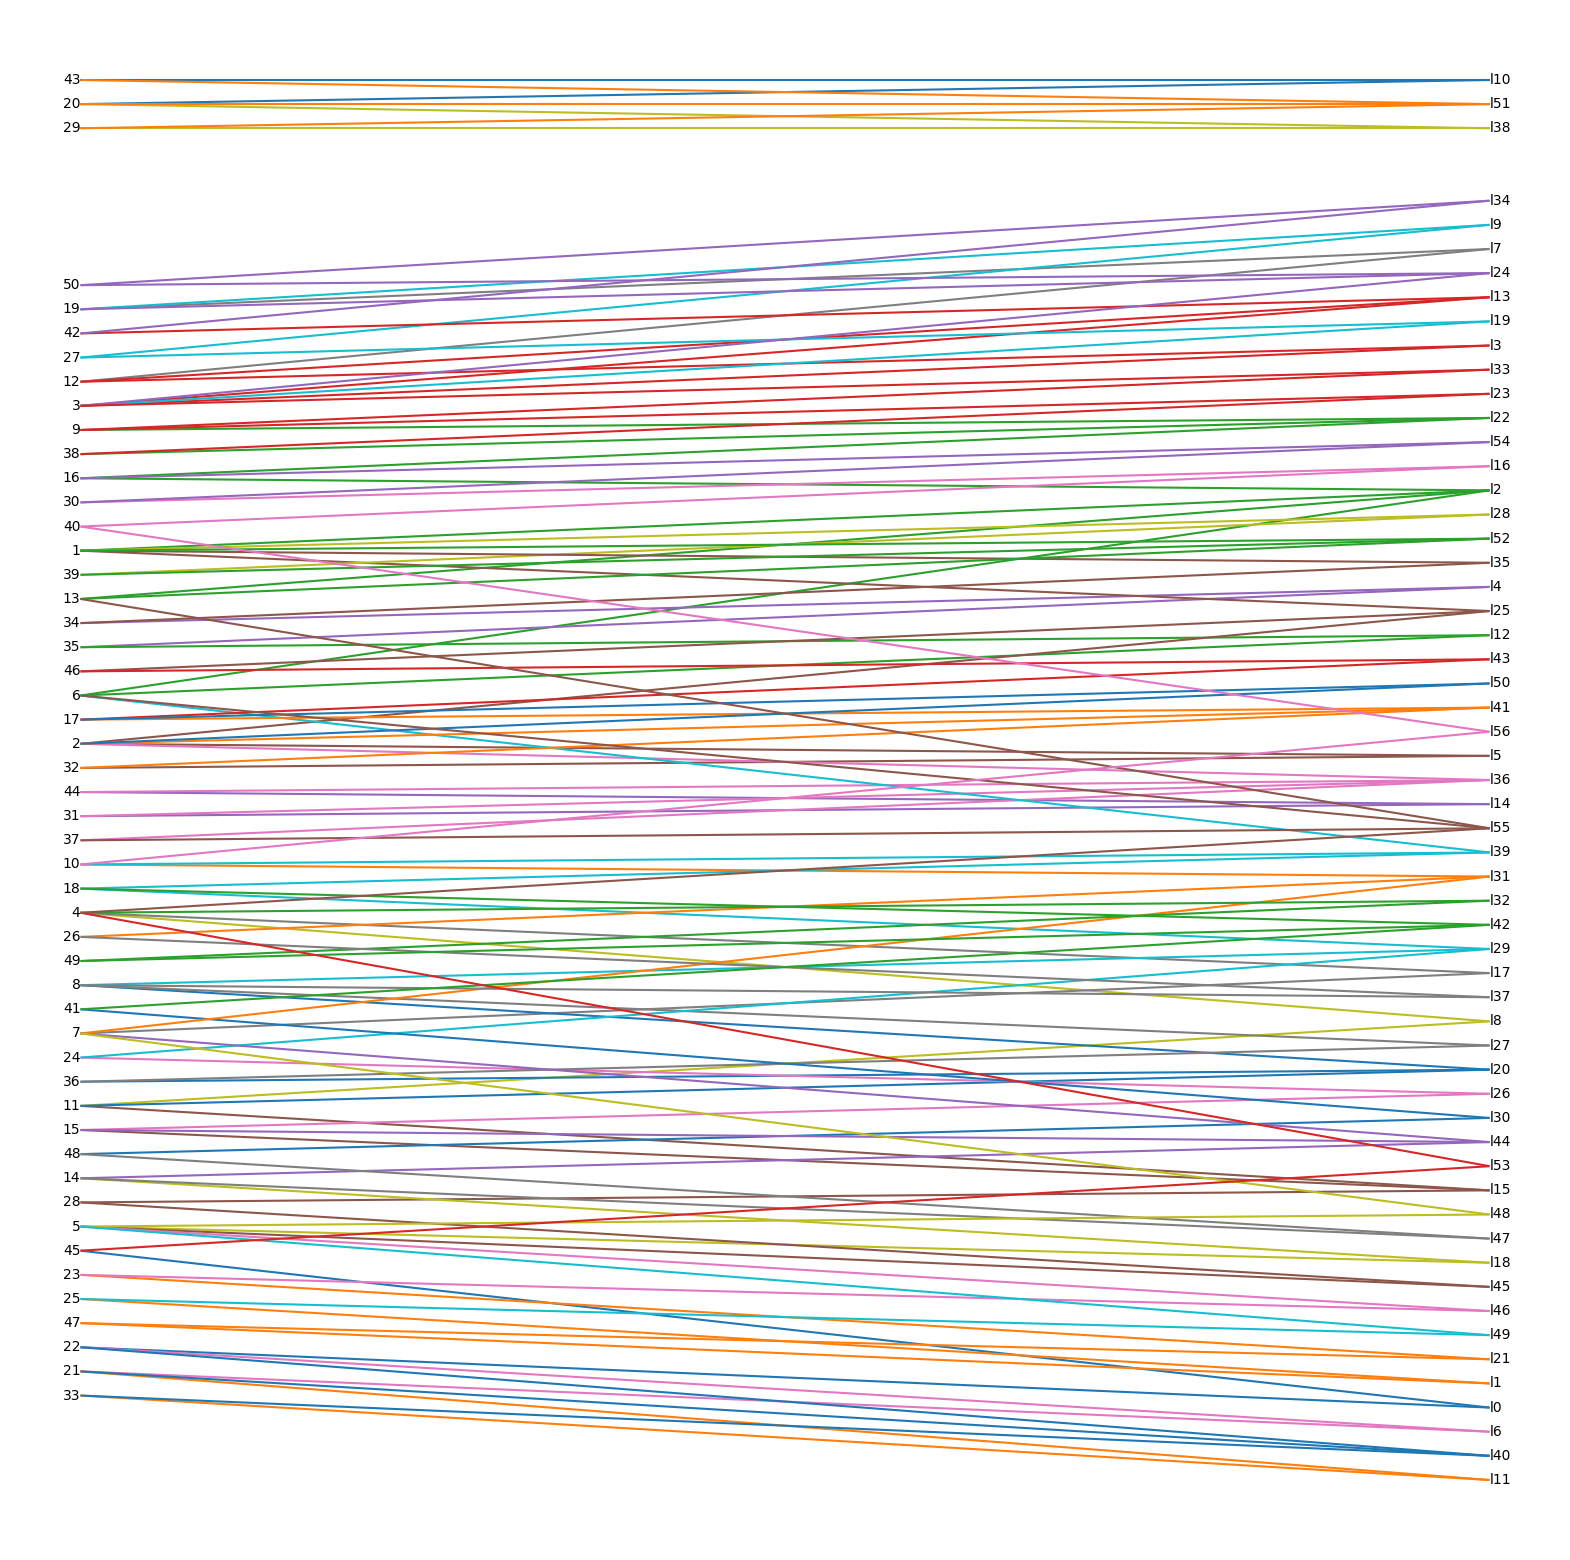

In [587]:
hnx.drawing.two_column.draw(f03p)

### Weighting

In [588]:
sizes = []

for i in range(0, len(f03)):    
    result = [f03[key] for key in f03.keys()]
    sizes.append(len(result[i]))



In [589]:
nxlist = ([(names[x[0]], (names[x[1]])) for x in f03p_2.get_edgelist()])

w = np.array(np.zeros(len(nxlist)))

for i in range(0, len(nxlist)):
    for l in range(0, len(f03)):
        if (nxlist[i][0] in [f03[key] for key in f03.keys()][l]) and (nxlist[i][1] in [f03[key] for key in f03.keys()][l]):
           w[i] += (1/(len([f03[key] for key in f03.keys()][l])-1)) 

w

array([1.        , 1.5       , 0.5       , 1.        , 1.        ,
       1.        , 1.        , 0.33333333, 0.83333333, 0.33333333,
       1.        , 0.5       , 0.5       , 1.5       , 0.66666667,
       0.33333333, 1.        , 0.33333333, 0.5       , 0.5       ,
       0.33333333, 0.33333333, 0.33333333, 0.5       , 0.33333333,
       1.        , 0.5       , 0.5       , 1.5       , 0.5       ,
       1.        , 0.5       , 1.        , 0.5       , 1.        ,
       0.5       , 1.        , 1.5       , 0.33333333, 0.33333333,
       0.5       , 0.33333333, 1.5       , 0.5       , 1.5       ,
       1.        , 0.5       , 1.        , 1.        , 1.        ,
       0.33333333, 0.5       , 0.5       , 0.5       , 0.5       ,
       1.5       , 1.5       , 0.5       , 1.        , 1.33333333,
       0.33333333, 0.33333333, 0.5       , 0.5       , 0.5       ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.5       , 0.5       , 0.5       , 1.        , 1.     

In [590]:
nxlistnew = []
for k in range(0, len(w)):
    nxlistnew.append(nxlist[k] + (w[k], ))
    
nxlistnew

[(22, 45, 1.0),
 (22, 21, 1.5),
 (22, 33, 0.5),
 (45, 4, 1.0),
 (25, 47, 1.0),
 (25, 5, 1.0),
 (47, 23, 1.0),
 (1, 6, 0.3333333333333333),
 (1, 13, 0.8333333333333333),
 (1, 16, 0.3333333333333333),
 (1, 34, 1.0),
 (1, 2, 0.5),
 (1, 46, 0.5),
 (1, 39, 1.5),
 (6, 13, 0.6666666666666666),
 (6, 16, 0.3333333333333333),
 (6, 35, 1.0),
 (6, 4, 0.3333333333333333),
 (6, 18, 0.5),
 (6, 10, 0.5),
 (6, 37, 0.3333333333333333),
 (13, 16, 0.3333333333333333),
 (13, 4, 0.3333333333333333),
 (13, 39, 0.5),
 (13, 37, 0.3333333333333333),
 (16, 30, 1.0),
 (16, 9, 0.5),
 (16, 38, 0.5),
 (3, 12, 1.5),
 (3, 19, 0.5),
 (3, 27, 1.0),
 (3, 42, 0.5),
 (3, 9, 1.0),
 (3, 50, 0.5),
 (12, 19, 1.0),
 (12, 42, 0.5),
 (34, 35, 1.0),
 (2, 32, 1.5),
 (2, 31, 0.3333333333333333),
 (2, 44, 0.3333333333333333),
 (2, 46, 0.5),
 (2, 37, 0.3333333333333333),
 (2, 17, 1.5),
 (32, 17, 0.5),
 (21, 33, 1.5),
 (19, 27, 1.0),
 (19, 50, 0.5),
 (4, 11, 1.0),
 (4, 7, 1.0),
 (4, 49, 1.0),
 (4, 37, 0.3333333333333333),
 (11, 15, 0.5

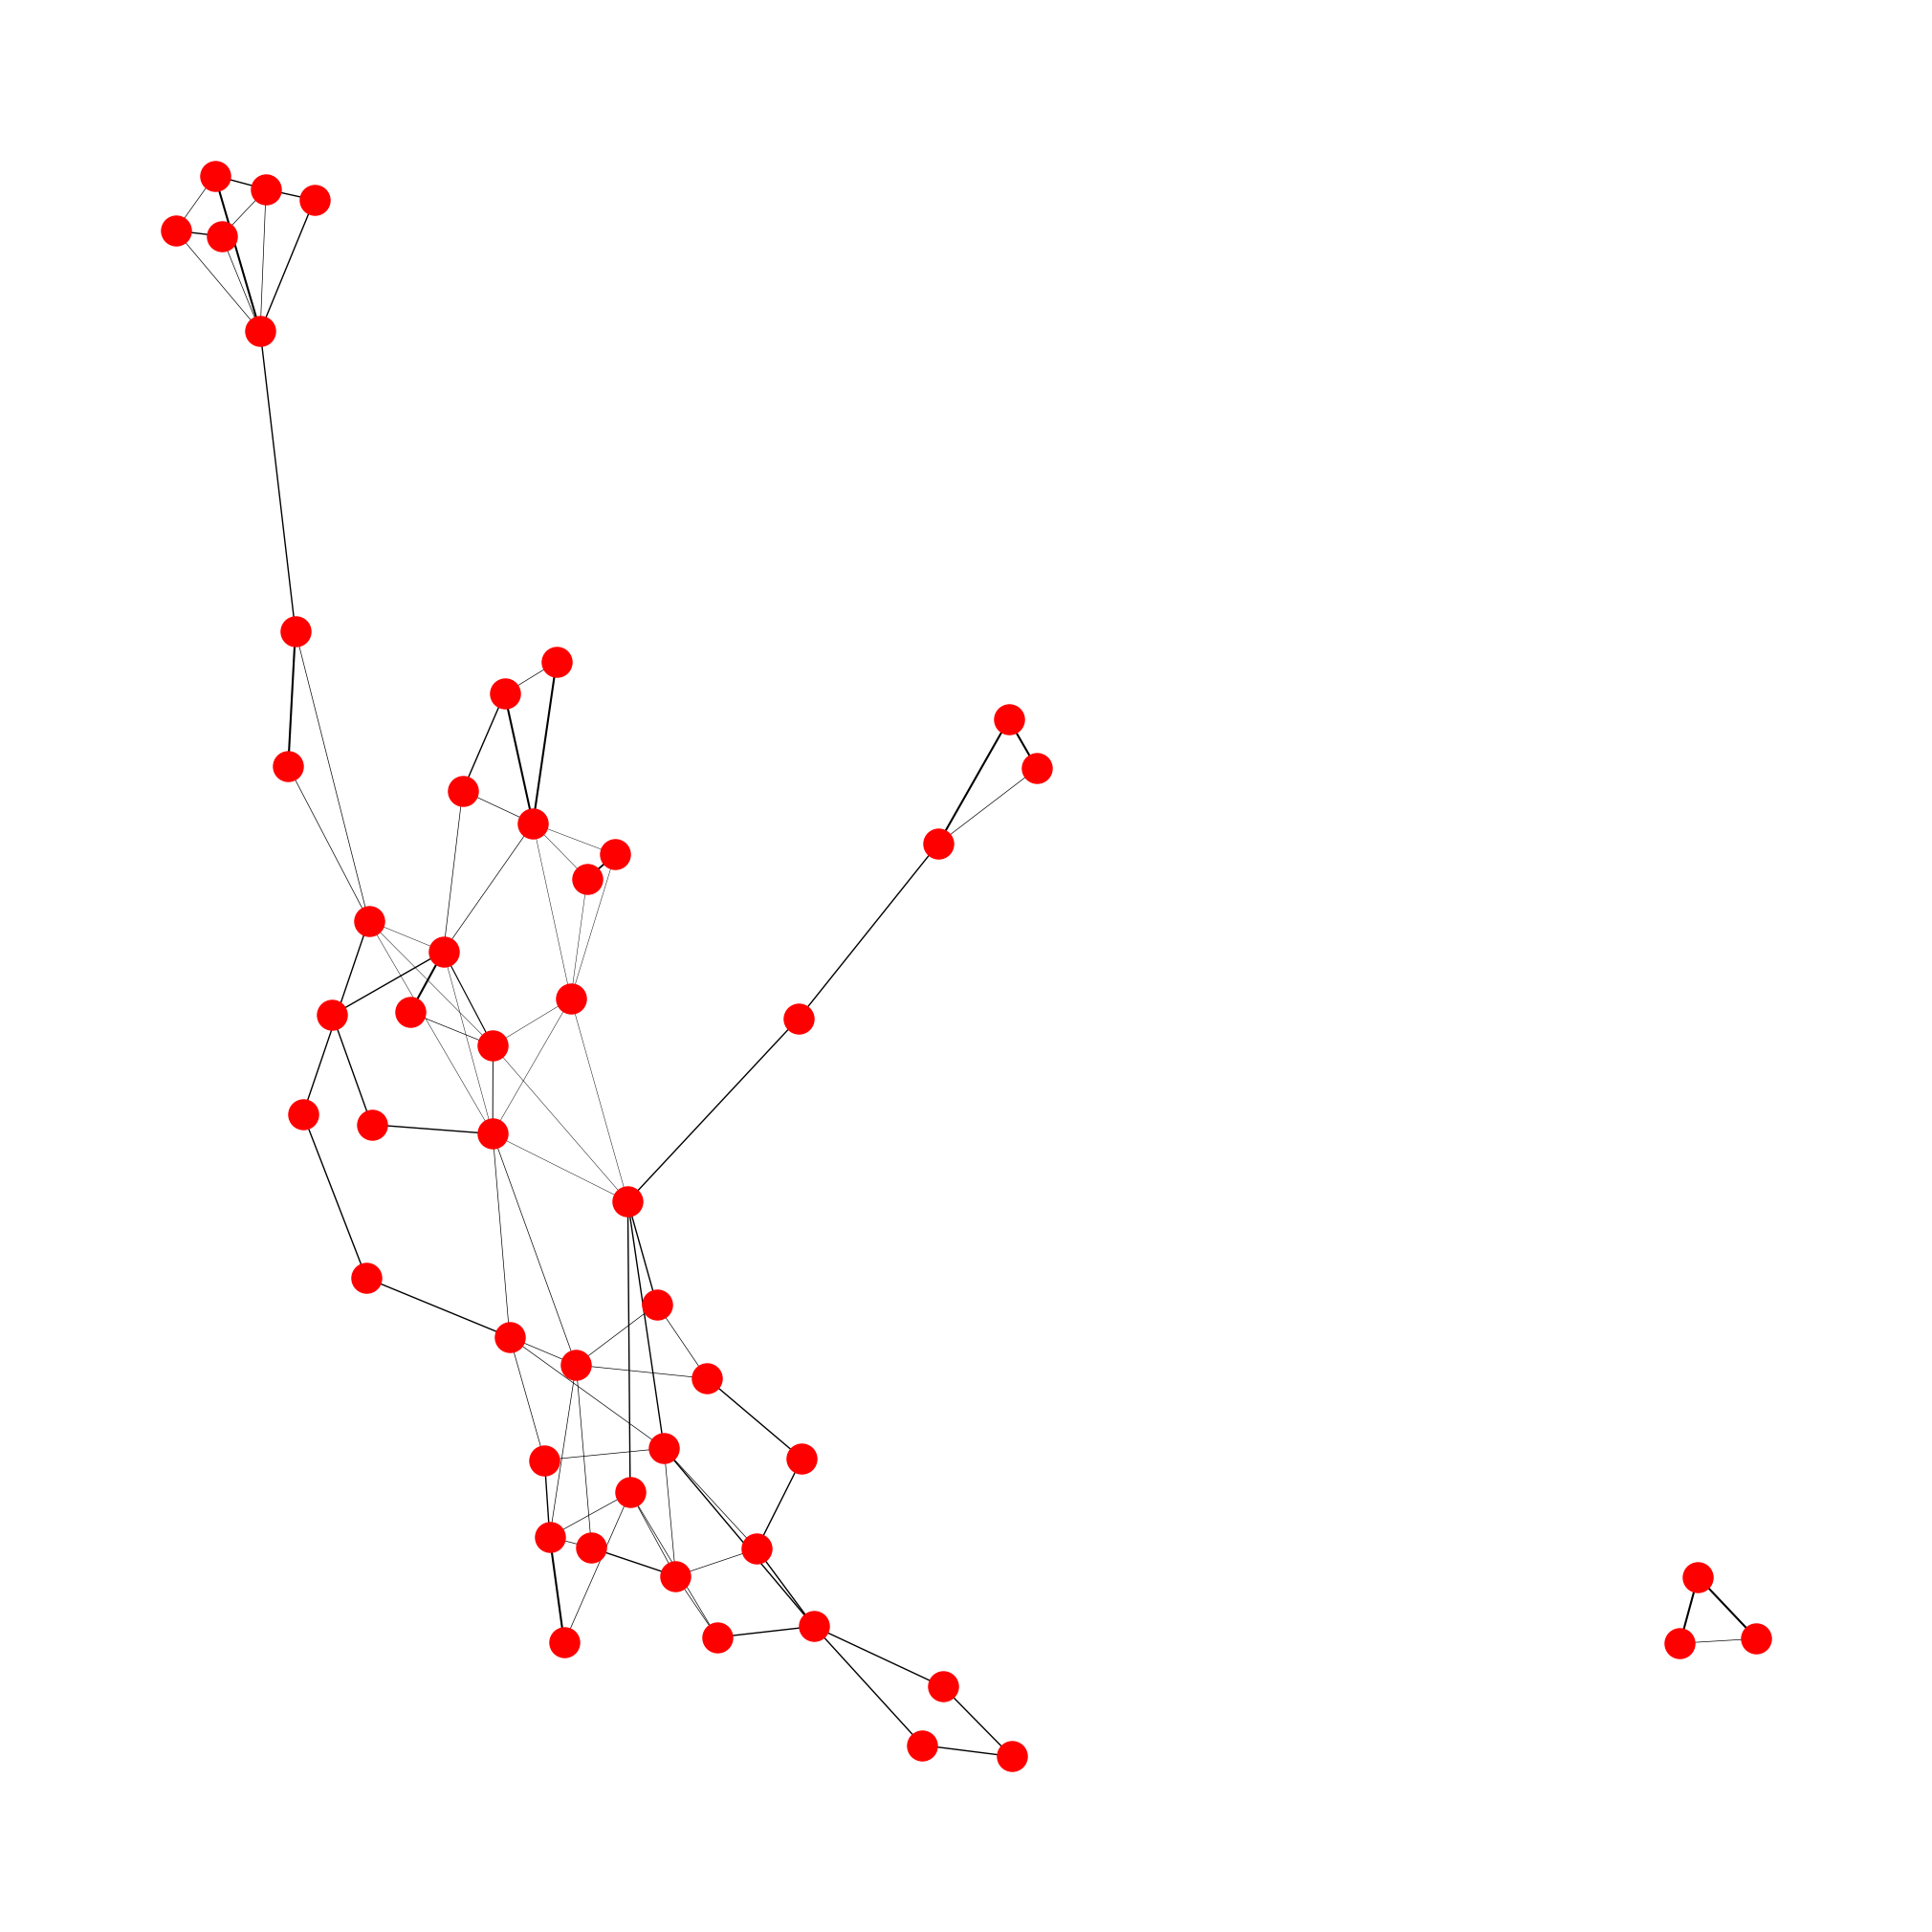

In [591]:
G2 = nx.Graph() 
G2.add_weighted_edges_from(nxlistnew)

edges,weights = zip(*nx.get_edge_attributes(G2,'weight').items())

pos = nx.spring_layout(G)

#nx.draw(G2, pos, node_color='r',with_labels=True, edgelist=edges, edge_color = weights, width=10.0, edge_cmap=plt.cm.Greens)

nx.draw(G2, pos, node_color='r',with_labels=False, edgelist=edges, node_size = 500, width = 10000*weights)

#plt.savefig('edges.png')

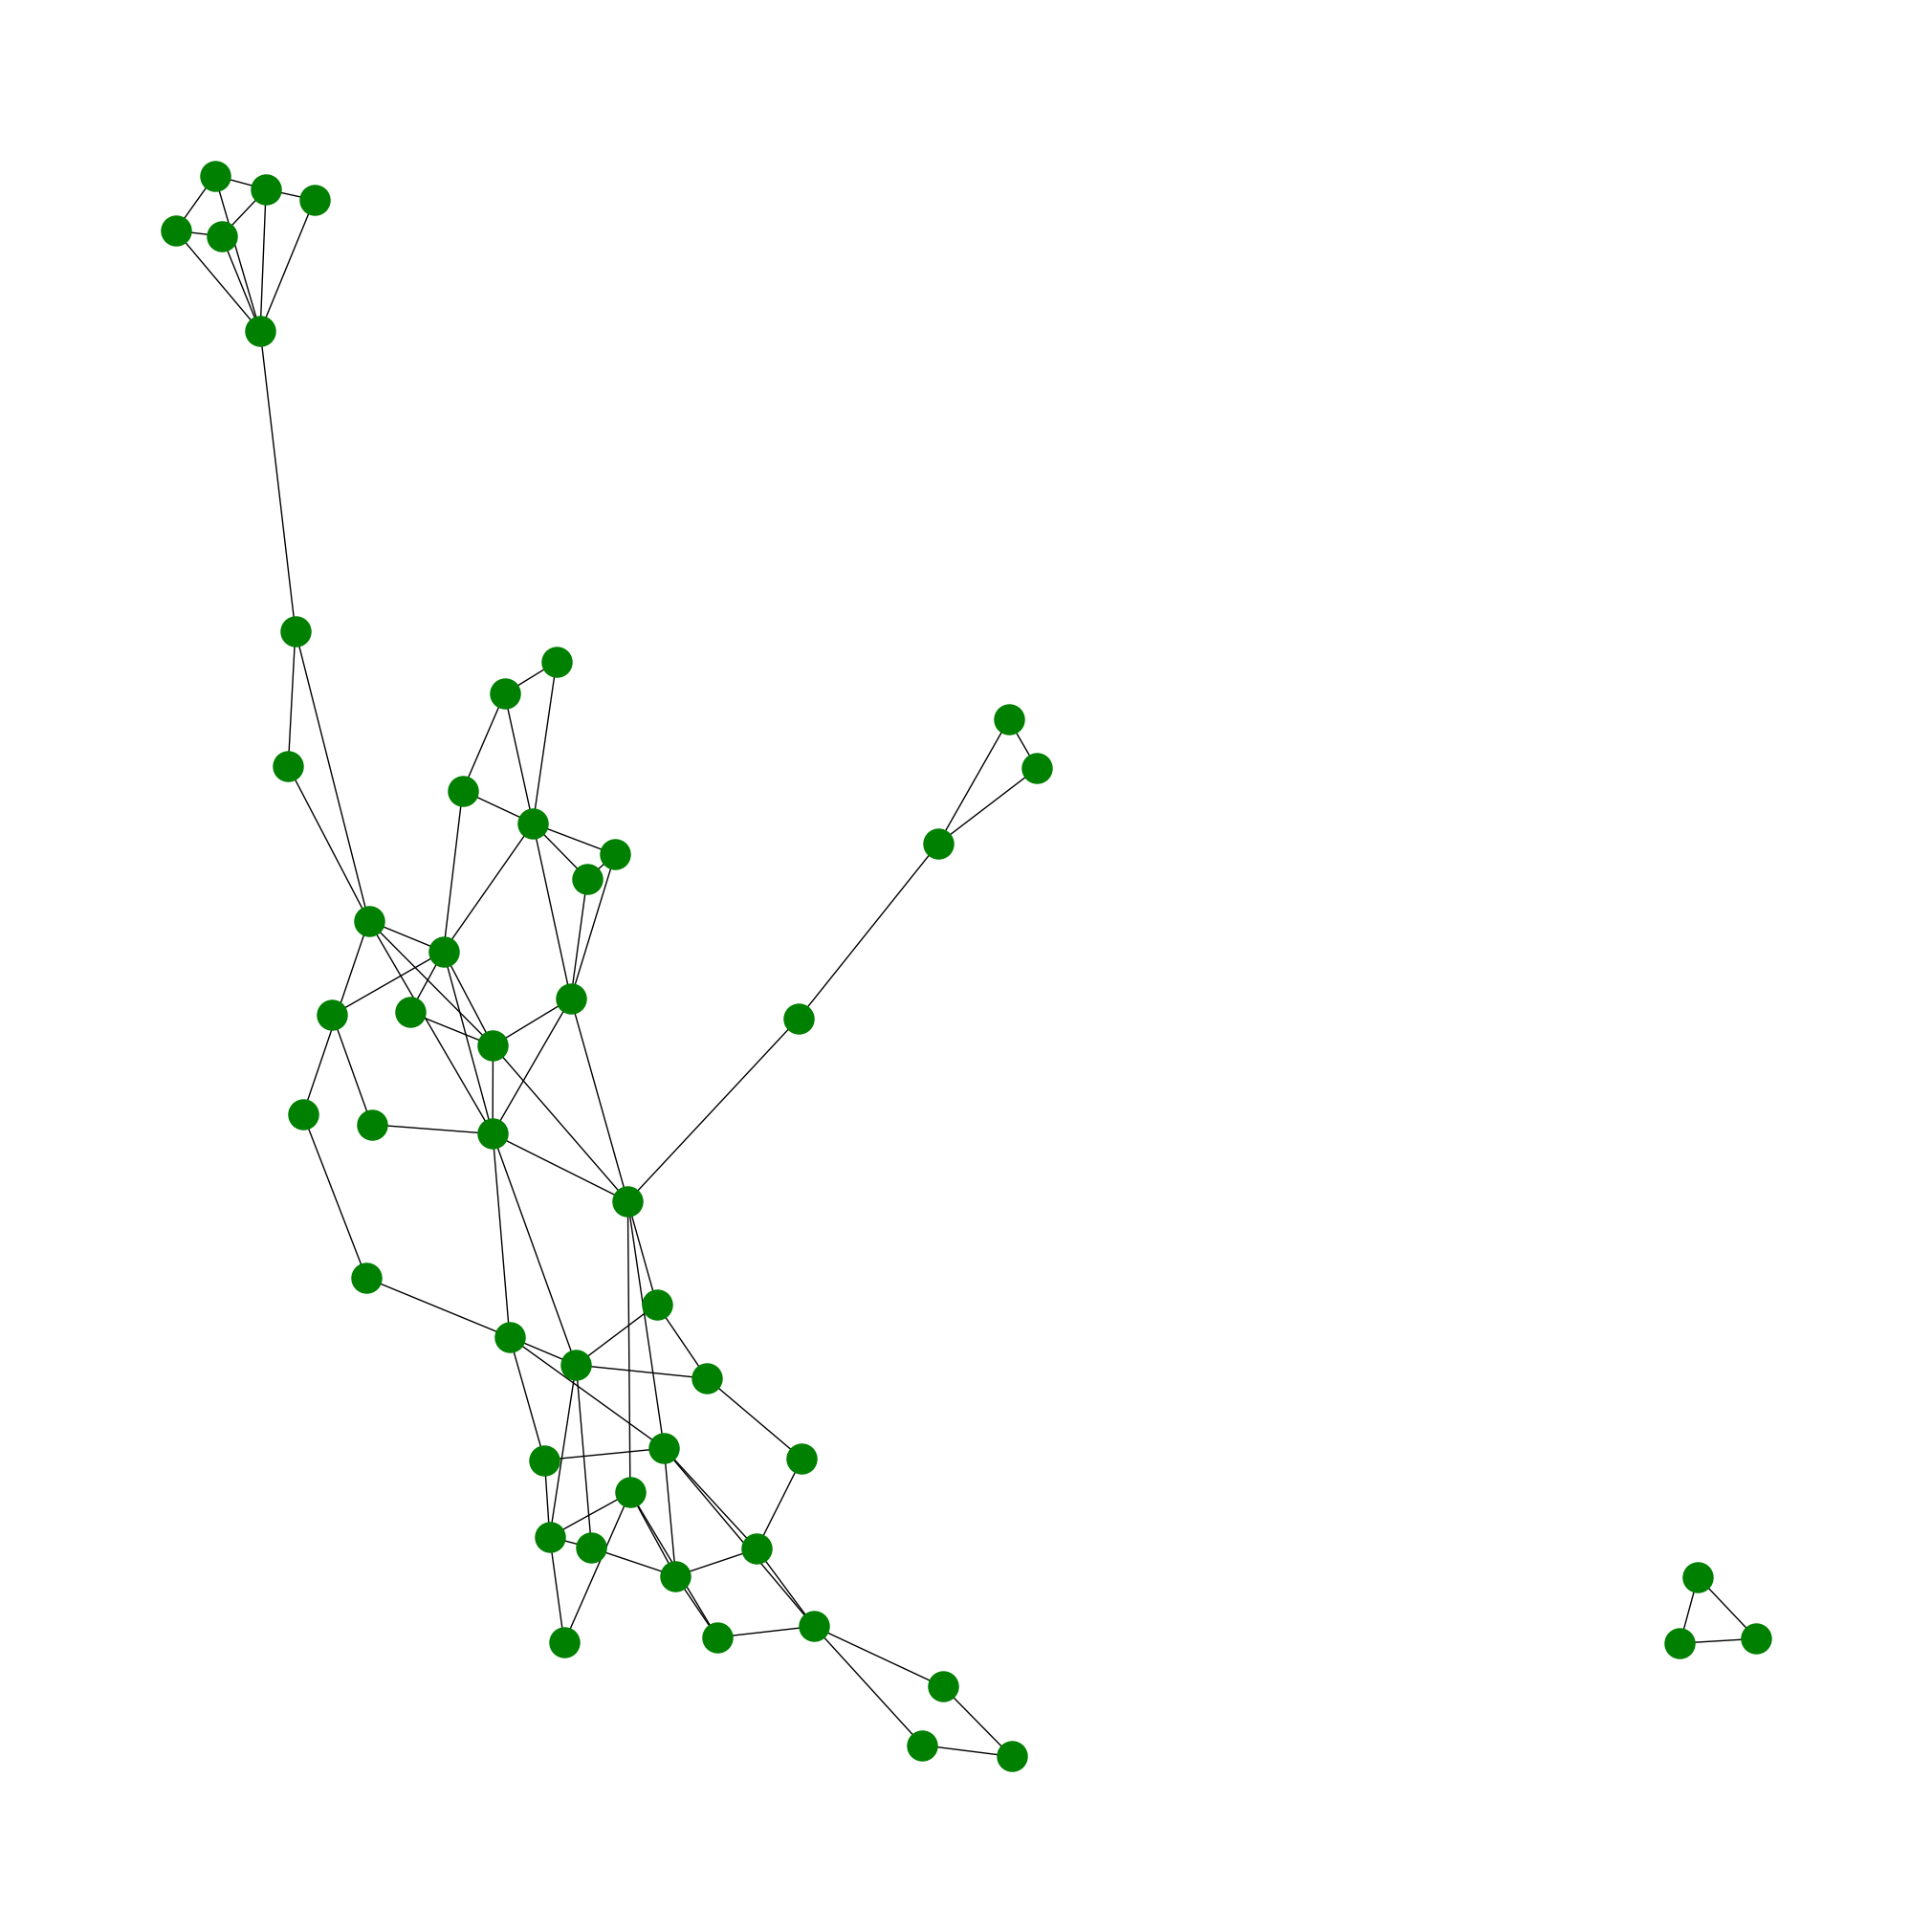

In [592]:
nx.draw(G2, pos, node_color='g',with_labels=False, edgelist=edges, node_size = 500)


# Information and histograms

In [593]:
communities3 = list(k_clique_communities(G2, 3, cliques=None))

print('The community sizes as per our generator are:', comms)

for i in range(0, len(communities3)):
    communities3[i] = sorted(list(communities3[i]))
    if len(communities3[i]) == max(comms):
        print('The longest comm is:', communities3[i])

print('With Max community size =', max(comms))

The community sizes as per our generator are: [8. 7. 7. 6. 6. 6. 5. 5.]
With Max community size = 8.0


In [594]:
print('Az átlag fokszám a hipergráfon belül:', np.average(deg))

degrees = [G.degree(n) for n in G.nodes()]
print('Az átlag fokszám a kivetített hálón:', np.average(degrees))

Az átlag fokszám a hipergráfon belül: 2.7
Az átlag fokszám a kivetített hálón: 3.56


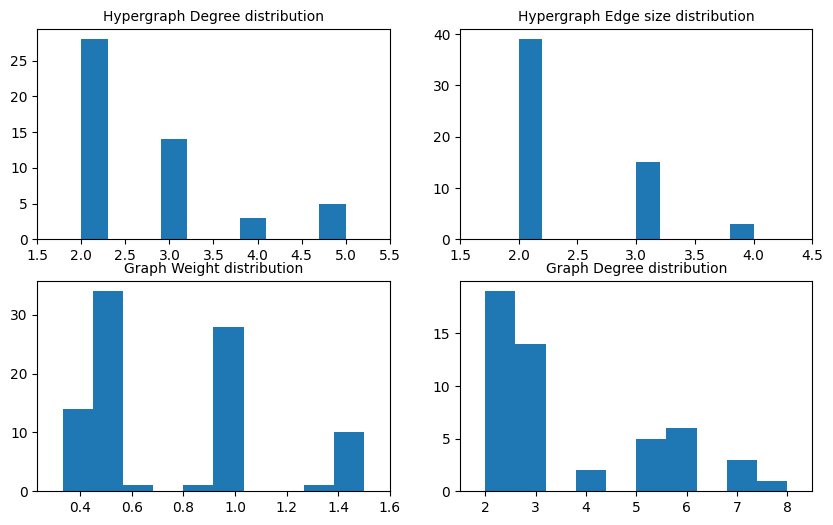

In [595]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

axes[0][0].set_xlim([min(deg)-0.5, max(deg)+0.5])
axes[0][0].hist(deg)
axes[0][0].set_title('Hypergraph Degree distribution', fontsize=10)

axes[0][1].set_xlim([min(sizes)-0.5, max(sizes)+0.5])
axes[0][1].hist(sizes, align='mid')
axes[0][1].set_title('Hypergraph Edge size distribution', fontsize=10)

axes[1][0].set_xlim([min(w)-0.1, max(w)+0.1])
axes[1][0].hist(w)
axes[1][0].set_title('Graph Weight distribution', fontsize=10)

axes[1][1].set_xlim([min(degrees)-0.5, max(degrees)+0.5])
axes[1][1].hist(degrees)
axes[1][1].set_title('Graph Degree distribution', fontsize=10)

#csoportméreteloszlás


plt.show()

# Groups and colouring

### ABCD Groups

In [777]:
number_of_colors = int(max(assign))

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)


['#84B330', '#4EAB71', '#967929', '#73D683', '#308C28', '#29C94D', '#24C5E5', '#AF2B44']


In [778]:

communitiesG =  [[] for _ in range(int(max(assign)))]

for j in range(0, int(max(assign))+1):
    for i in range(0, len(assign)):
        if assign[i] == j:
            communitiesG[j-1].append(i+1)



communitiesG

[[4, 7, 14, 18, 26, 41, 48, 49],
 [2, 17, 31, 32, 37, 44, 46],
 [20, 21, 22, 29, 33, 43, 45],
 [9, 10, 16, 30, 38, 40],
 [3, 12, 19, 27, 42, 50],
 [1, 6, 13, 34, 35, 39],
 [8, 11, 15, 24, 36],
 [5, 23, 25, 28, 47]]

In [779]:
assign

array([6., 2., 5., 1., 8., 6., 1., 7., 4., 4., 7., 5., 6., 1., 7., 4., 2.,
       1., 5., 3., 3., 3., 8., 7., 8., 1., 5., 8., 3., 4., 2., 2., 3., 6.,
       6., 7., 2., 4., 6., 4., 1., 5., 3., 2., 3., 2., 8., 1., 1., 5.])

In [780]:
trier = {color[i] : communitiesG[i] for i in range(0, len(communitiesG)) if (color[i] != '#FF0000' or color[i] != '#808080')}

trier

{'#84B330': [4, 7, 14, 18, 26, 41, 48, 49],
 '#4EAB71': [2, 17, 31, 32, 37, 44, 46],
 '#967929': [20, 21, 22, 29, 33, 43, 45],
 '#73D683': [9, 10, 16, 30, 38, 40],
 '#308C28': [3, 12, 19, 27, 42, 50],
 '#29C94D': [1, 6, 13, 34, 35, 39],
 '#24C5E5': [8, 11, 15, 24, 36],
 '#AF2B44': [5, 23, 25, 28, 47]}

In [781]:
nodelist = []
for nodes in G2.nodes():
    nodelist.append(nodes)

color_map=[]
size=[]

for node in nodelist:
    if node in list(chain(*trier.values())):
        if (list(chain(*trier.values())).count(node) == 1):
            #color_map.append('green')
            for i in range(0, len(list(trier.values()))):
                if (node in list(trier.values())[i]) == True:
                    c = color[i] 
                    color_map.append(c)
        else:
            color_map.append('#FF0000')
    else:
        color_map.append('#808080')
        
#color_map

for i in range (0, len(color_map)):
    if color_map[i] == '#FF0000':
        size.append(600)
    elif color_map[i] == '#808080':
        size.append(250)
    else:
        size.append(450)
        
#size

In [782]:
legend = []
lista = []

for i in range(0, len(communitiesG)):
    #legend.append(Line2D([0], [0], marker='o', color=color[i], label='Group {}'.format(i)
                           #,markerfacecolor=color[i], markersize=15))
    #legend.append(mpatches.Patch(color=color[i], label='Group {}'.format(i + 1)))
    legend.append(mpatches.Patch(color=color[i], label=(communitiesG[i])))
    lista = legend #+ [mpatches.Patch(color= '#FF0000', label='Multigroups'), mpatches.Patch(color= '#808080', label='0 groups')]

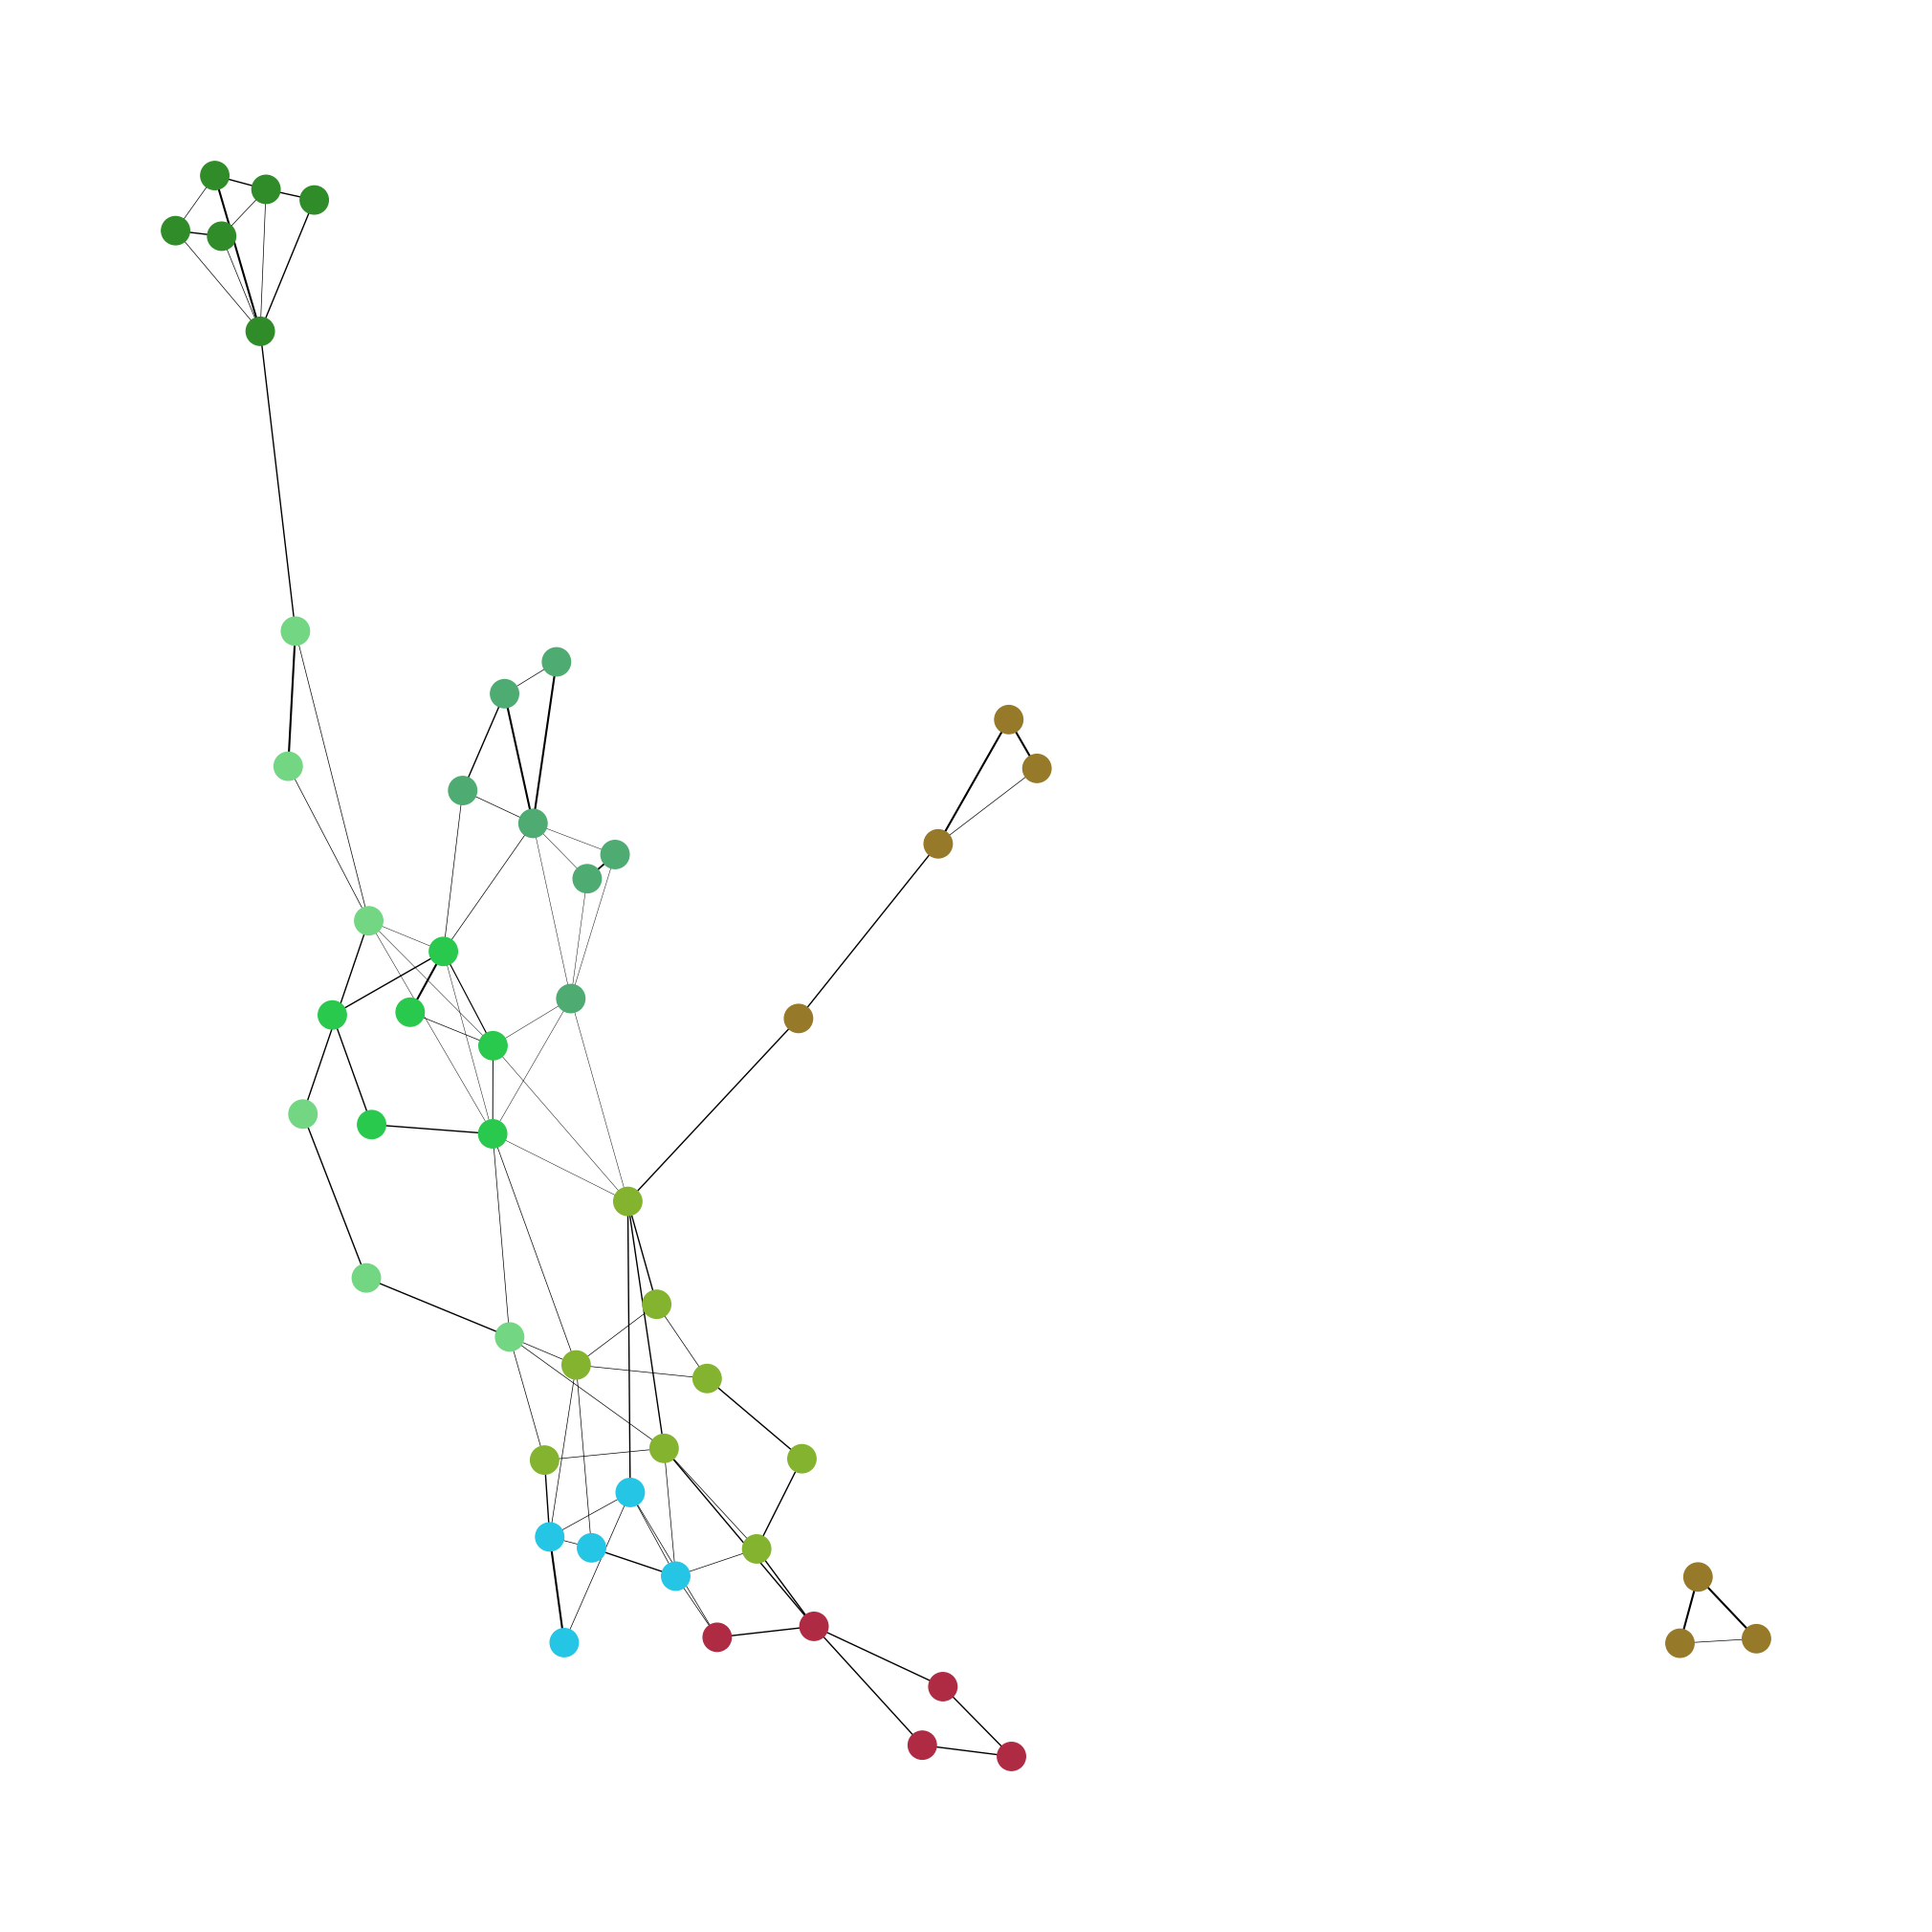

In [783]:
nx.draw(G2, pos  , node_color=color_map ,with_labels=False, node_size = size, edgelist=edges, width=weights)
#plt.legend('csop:színek', loc='upper left')

#plt.legend(handles = [lista[i] for i in range(0, len(lista))])

plt.show()

### K_clique groups

In [786]:
def clique_coloring(graph, k):
    communities = []
    color_map=[]
    size=[]
    legend = []
    #lista = []
    nodelist2 = []
    
    for nodes in graph.nodes():
        nodelist2.append(nodes)

    for i in range(0, len(list(k_clique_communities(graph, k, cliques=None)))):
        communities.append(sorted(list(k_clique_communities(graph, k))[i]))    
        
    number_of_colors = len(communities)

    color = ["#"+''.join([random.choice('0123456789ABCDEF') for k in range(6)])
                for l in range(number_of_colors)]
    
    trier = {color[i] : communities[i] for i in range(0, len(communities)) if (color[i] != '#FF0000' or color[i] != '#808080')}

    for node in nodelist2:
        if node in list(chain(*trier.values())):
            if (list(chain(*trier.values())).count(node) == 1):
                #color_map.append('green')
                for i in range(0, len(list(trier.values()))):
                    if (node in list(trier.values())[i]) == True:
                        c = color[i] 
                        color_map.append(c)
            else:
                color_map.append('#FF0000')
        else:
            color_map.append('#808080')


    for i in range (0, len(color_map)):
        if color_map[i] == '#FF0000':
            size.append(600)
        elif color_map[i] == '#808080':
            size.append(250)
        else:
            size.append(450)
        
    for i in range(0, len(communities)):
        legend.append(mpatches.Patch(color=color[i], label=(communities[i])))
        #lista = legend + [mpatches.Patch(color= '#FF0000', label='Multigroups'), mpatches.Patch(color= '#808080', label='0 groups')]
    
    if communities == []:
        print('No groups for k =', k)
    else:
        nx.draw(graph, pos , node_color=color_map ,with_labels=False, node_size = size, edgelist=edges, width=weights)
        #plt.legend('csop:színek', loc='upper left')

        #plt.legend(handles = [lista[i] for i in range(0, len(lista))])

        plt.show()
    
    return(communities)

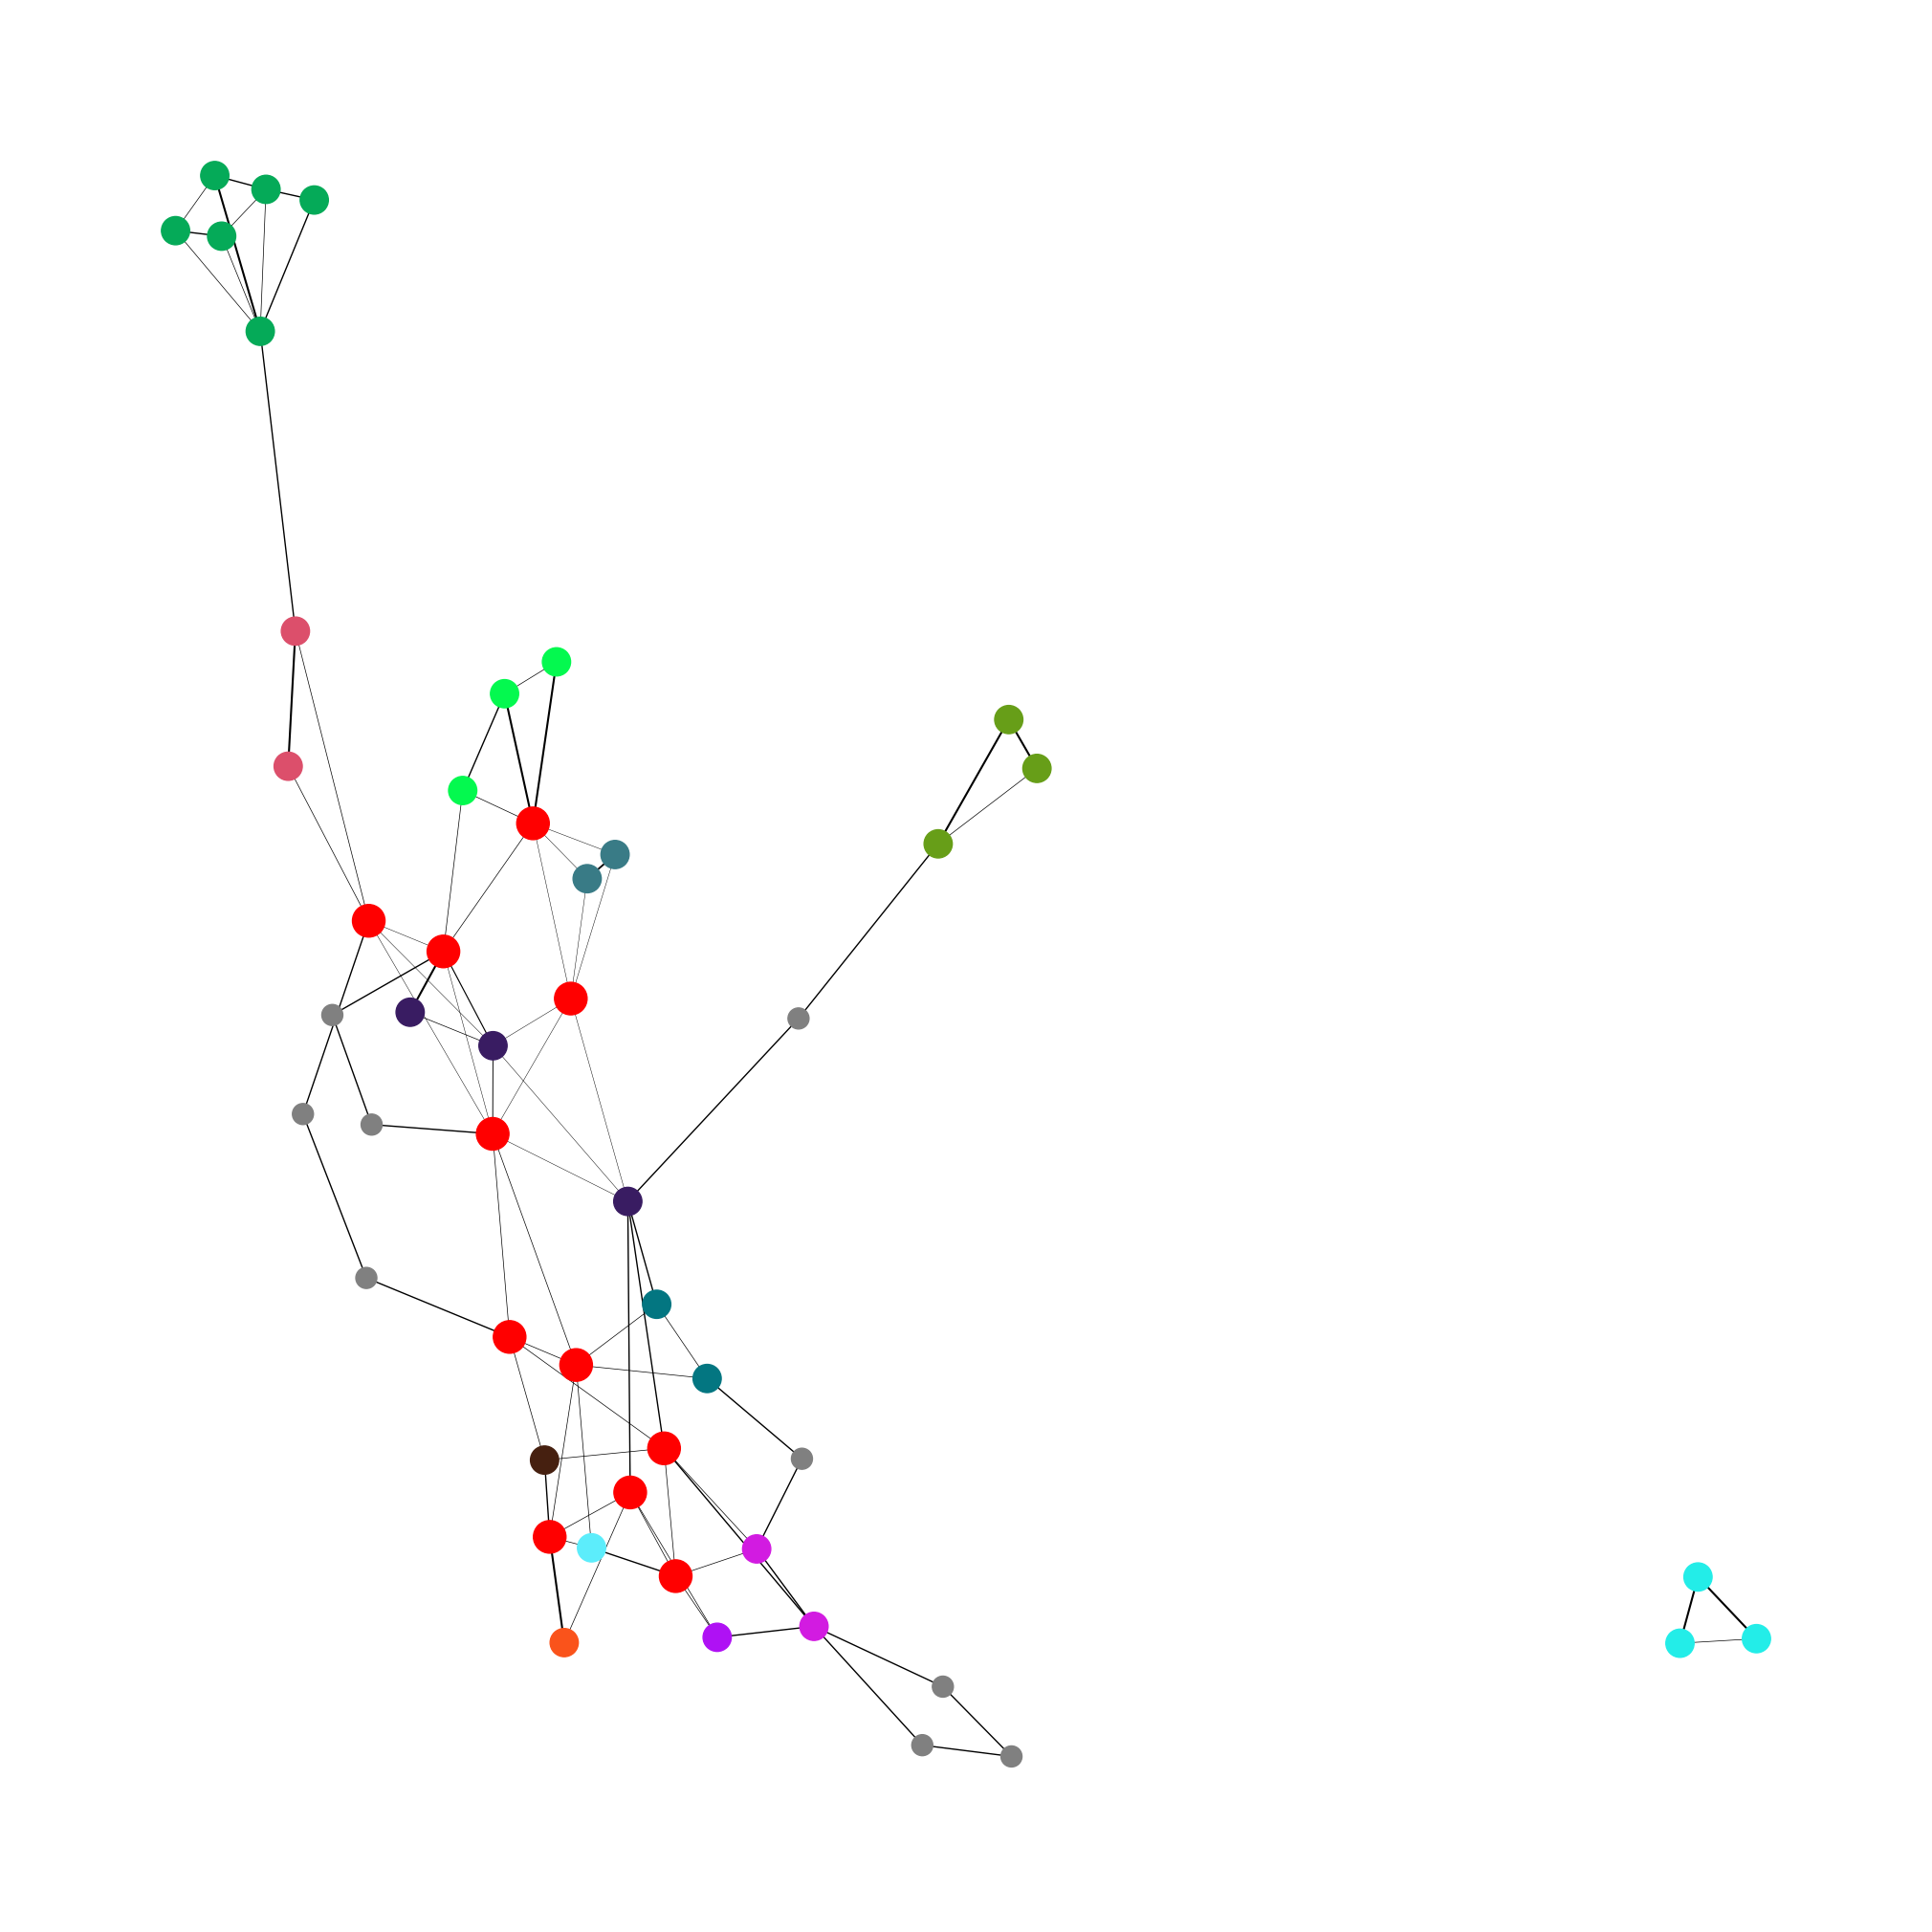

[[1, 2, 17, 32, 46],
 [2, 31, 37, 44],
 [3, 12, 19, 27, 42, 50],
 [5, 7, 14, 15],
 [6, 10, 18],
 [1, 4, 6, 13, 16, 37, 39],
 [7, 10, 26],
 [8, 18, 24],
 [8, 11, 36],
 [9, 16, 38],
 [11, 15, 28],
 [20, 29, 43],
 [21, 22, 33],
 [18, 41, 49]]

In [798]:
comm3 = clique_coloring(G2, 3)
comm3

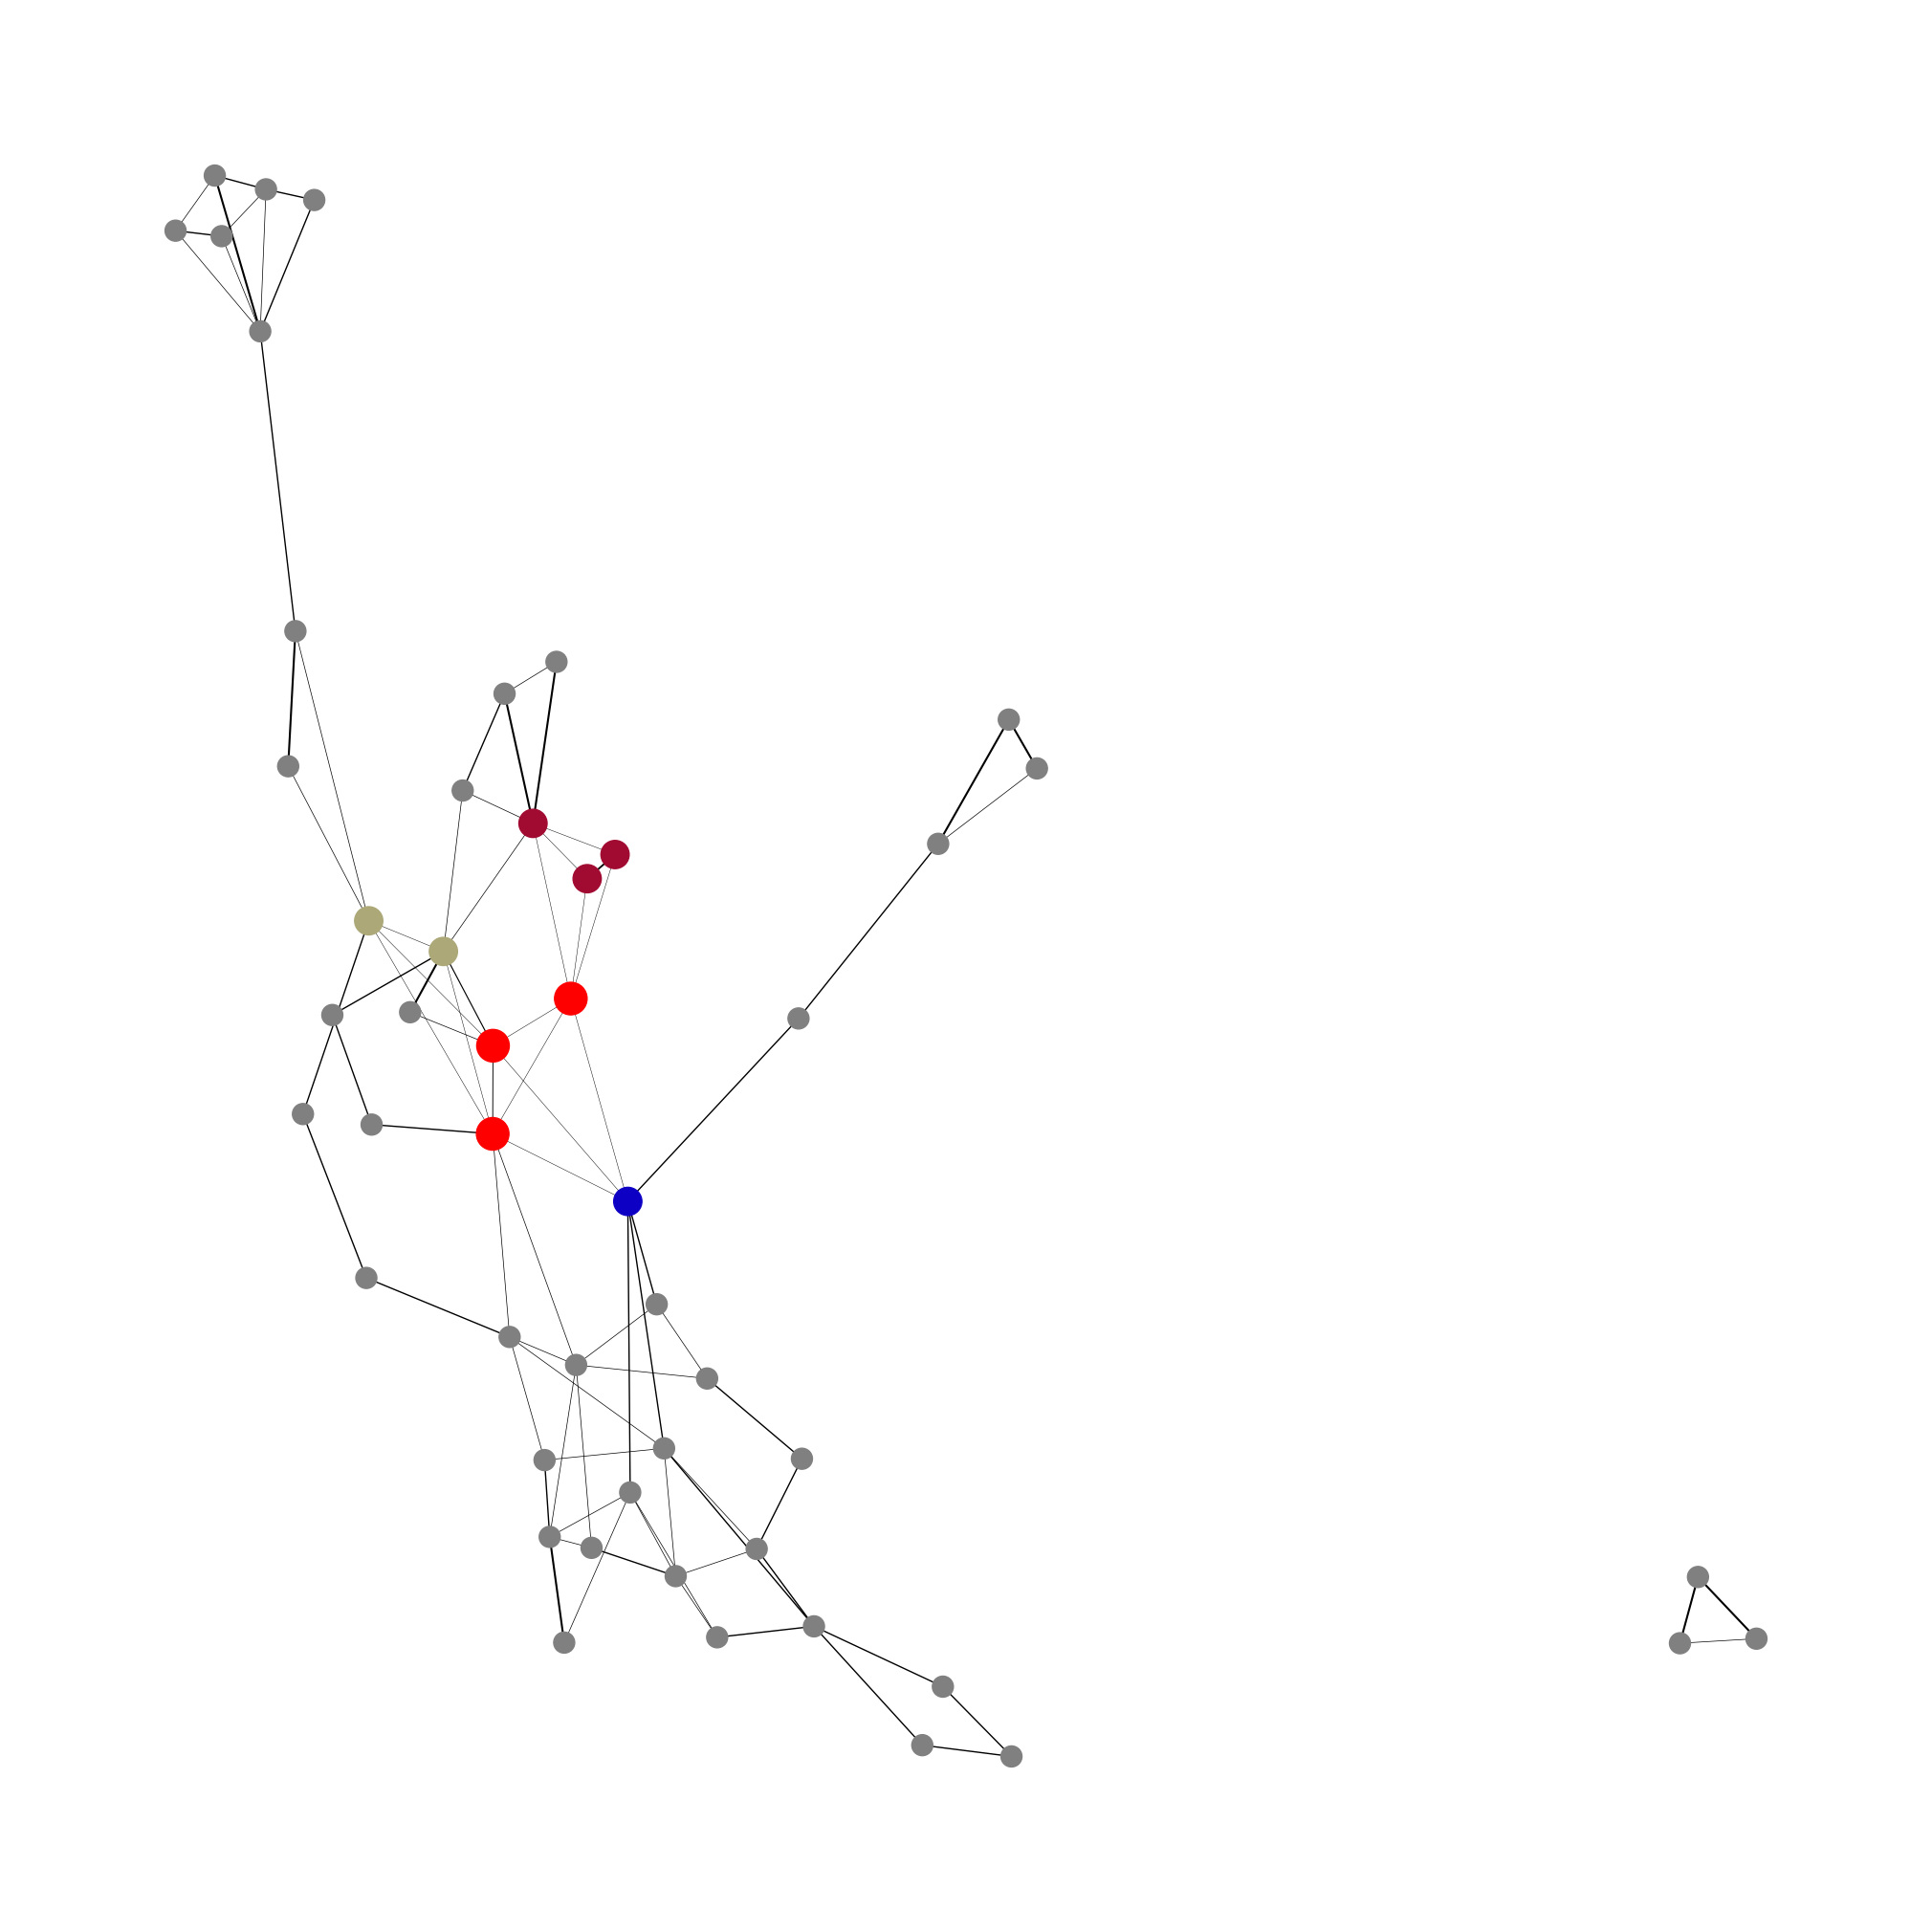

In [791]:
comm4 = clique_coloring(G2, 4)

In [606]:
comm5 = clique_coloring(G2, 5)
comm5

No groups for k = 5


[]

In [607]:
comm6 = clique_coloring(G2, 6)
comm6

No groups for k = 6


[]

# Susceptibility and Weight levels

In [608]:
weightlist = [0.0, ] + sorted(list(set(w)))
weighted_dict = {}
graphs = {}
communities = {}
community_sizes = {}
susceptibility = []

for l in range(0, len(weightlist)):
    weighted_dict['weightup_%s' % weightlist[l]] = []
    graphs['graph_%s' % l] =  nx.Graph() 
    communities['c_%s' % l] = []
    community_sizes['c_%s' % l] = []
    
    weighted_dict['weightup_%s' % weightlist[l]] = [(u, v, d) for (u, v, d) in nxlistnew if d > weightlist[l]]
    graphs['graph_%s' % l].add_weighted_edges_from(weighted_dict['weightup_%s' % weightlist[l]])

    for i in range(0, len(list(k_clique_communities(graphs['graph_%s' % l], 2, cliques=None)))):
        communities['c_%s' % l].append(sorted(list(k_clique_communities(graphs['graph_%s' % l], 2))[i]))
        
    for k in range(0, len(communities['c_%s' % l])):  
        community_sizes['c_%s' % l].append(len(communities['c_%s' % l][k]))       
        
    if (sum(community_sizes['c_%s' % l][1:])) ==0.0:
        susceptibility.append(0.0)
    else:        
        susceptibility.append((sum(community_sizes['c_%s' % l][1:]))/(len(community_sizes['c_%s' % l])-1))
    #community_sizes['c_%s' % l] = (len(communities['c_%s' % l][i]) for i in range(0, len(communities['c_%s' % l])))

    if len(communities['c_%s' % l]) == 0:
        communities['c_%s' % l] = [[]]
        

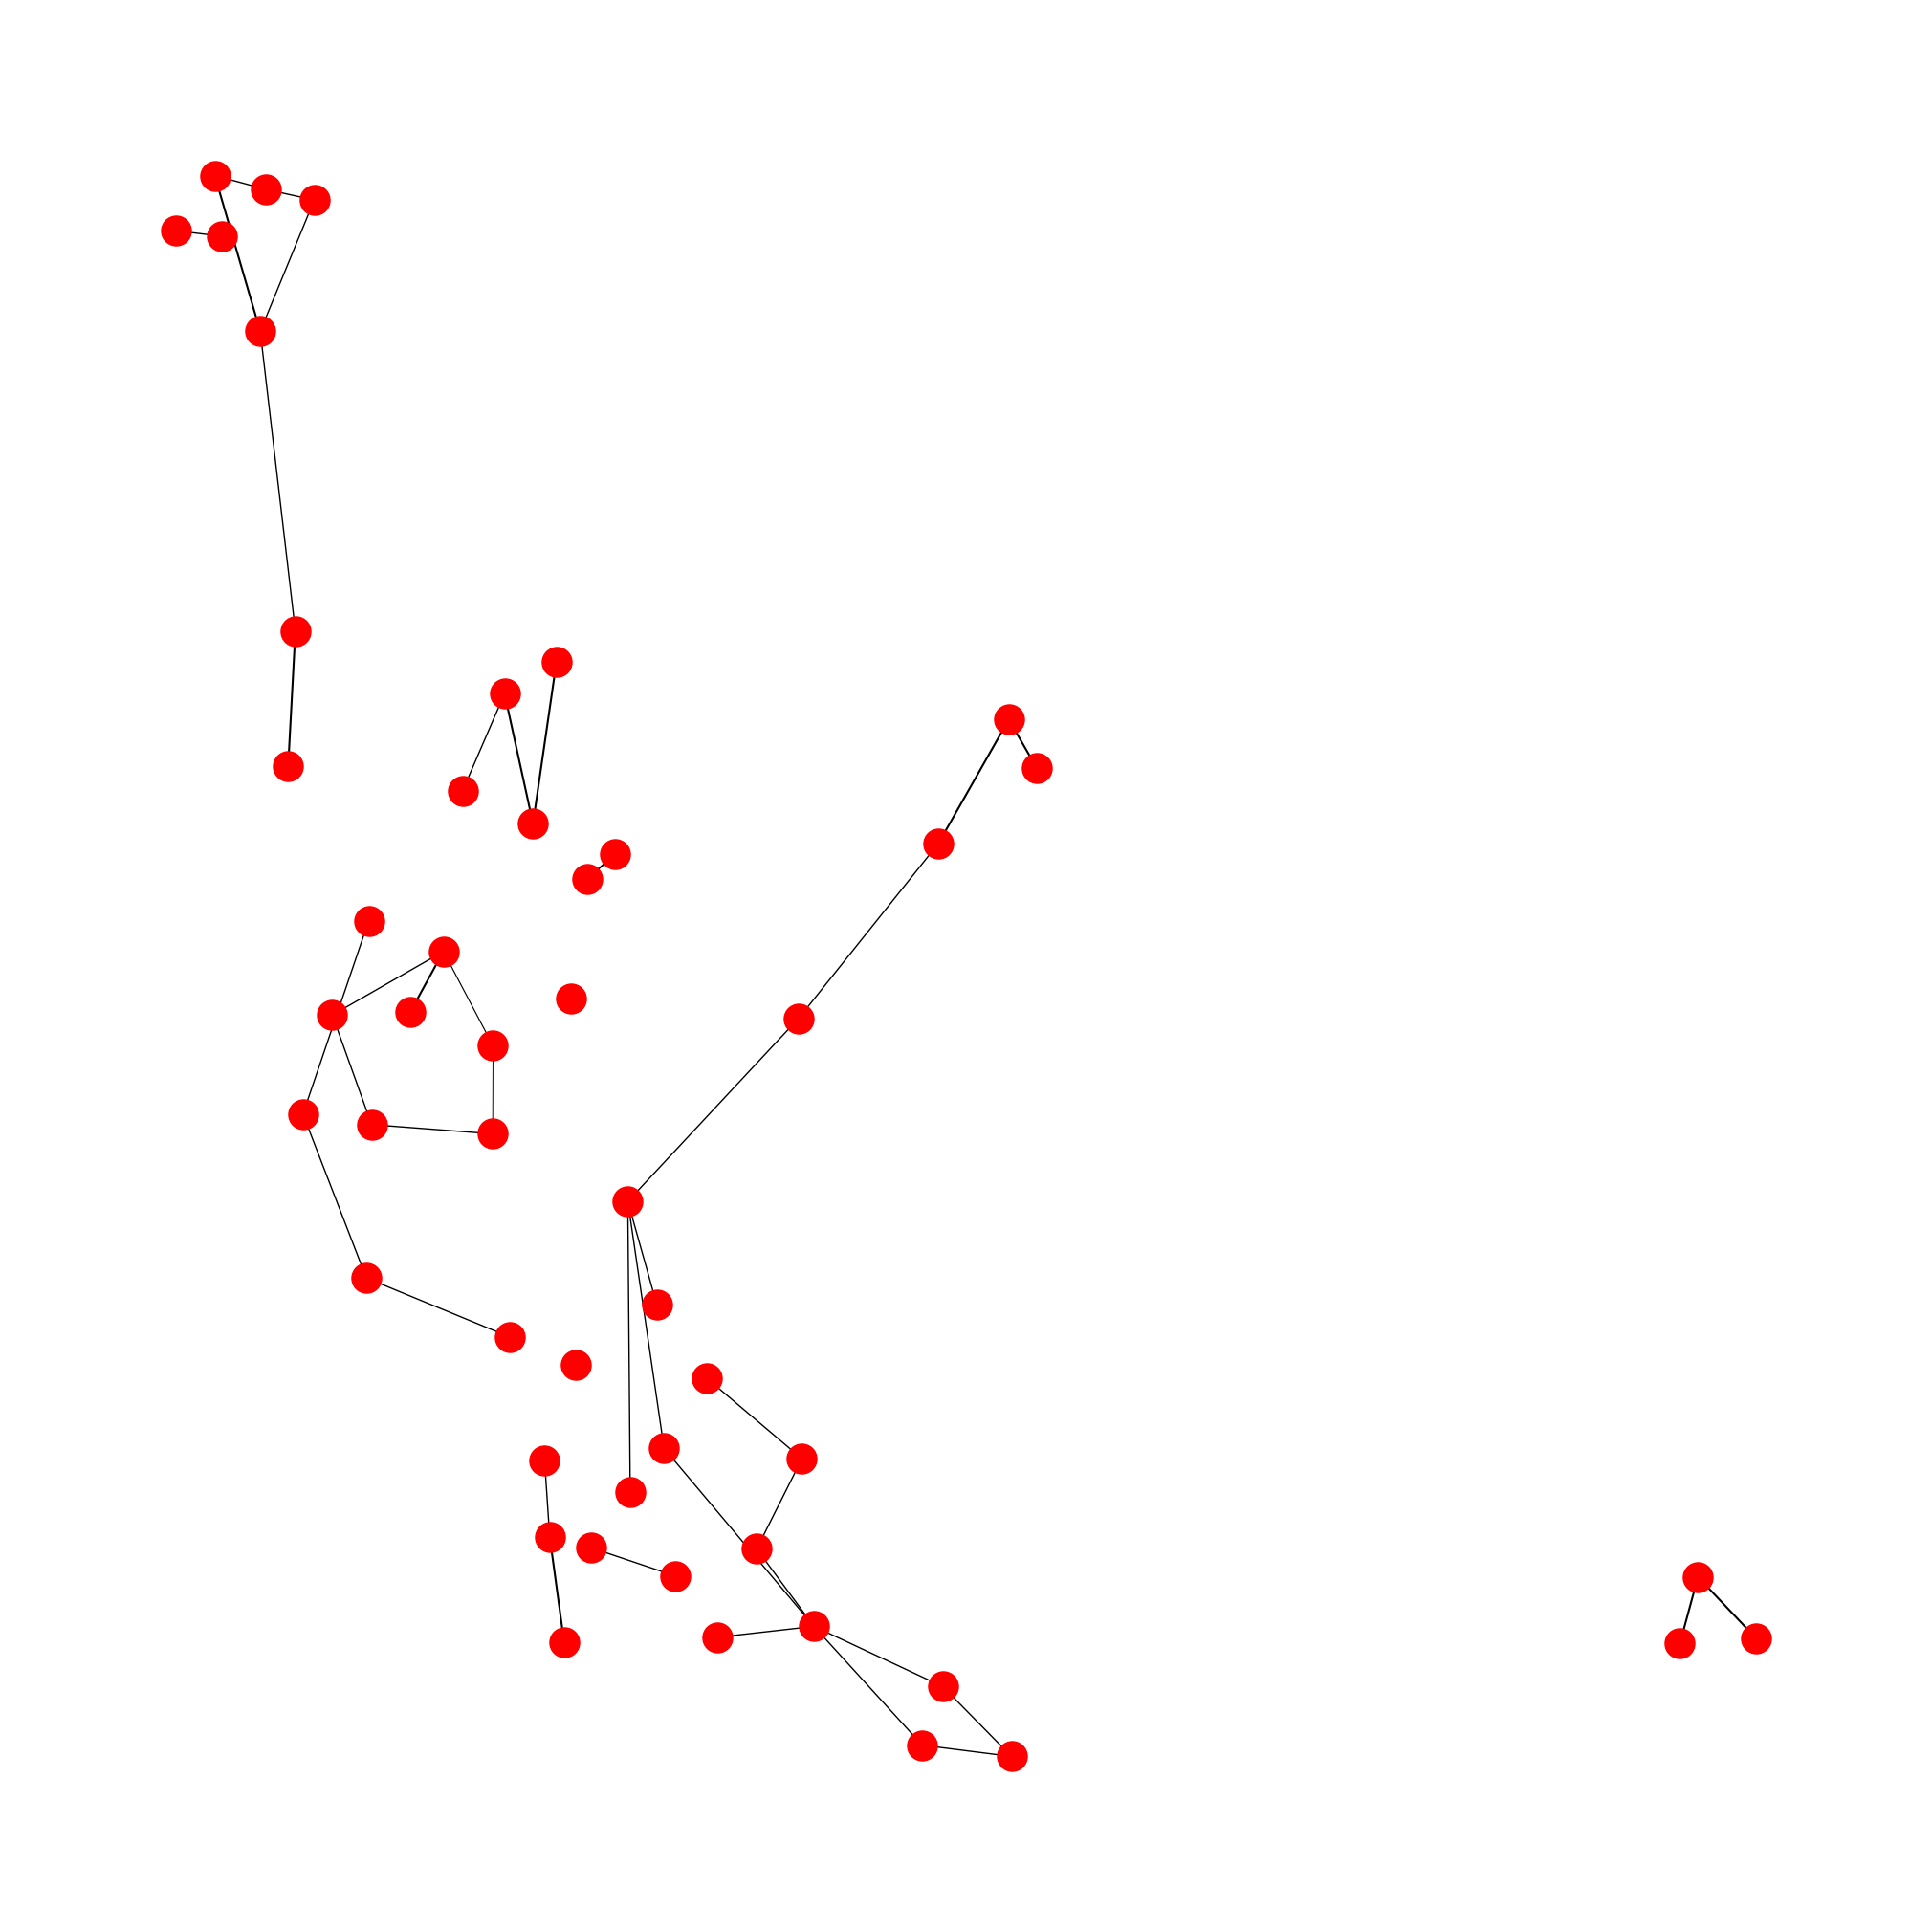

In [682]:
#graphs['graph_%s' % l]

edgest,weightst = zip(*nx.get_edge_attributes(graphs['graph_2'],'weight').items())

nx.draw(G2, pos, node_color='r',with_labels=False, edgelist=edgest, node_size = 500, width = weightst)


In [610]:
#clique_coloring(graphs['graph_5'], 2)
communities = []
color_map=[]
size=[]
legend = []
    #lista = []
nodelist2 = []
    
for nodes in graphs['graph_5'].nodes():
    nodelist2.append(nodes)

for i in range(0, len(list(k_clique_communities(graphs['graph_5'], 2, cliques=None)))):
    communities.append(sorted(list(k_clique_communities(graphs['graph_5'], 2))[i]))    
        
number_of_colors = len(communities)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for k in range(6)])
            for l in range(number_of_colors)]
    
trier = {color[i] : communities[i] for i in range(0, len(communities)) if (color[i] != '#FF0000' or color[i] != '#808080')}



In [611]:
for node in nodelist2:
    if node in list(chain(*trier.values())):
        if (list(chain(*trier.values())).count(node) == 1):
                #color_map.append('green')
            for i in range(0, len(list(trier.values()))):
                if (node in list(trier.values())[i]) == True:
                    c = color[i] 
                    color_map.append(c)
        else:
            color_map.append('#FF0000')
    else:
        color_map.append('#808080')


color_map

['#D3CD60',
 '#D3CD60',
 '#E13EE5',
 '#E13EE5',
 '#E6012F',
 '#E6012F',
 '#03ABA4',
 '#03ABA4',
 '#03ABA4',
 '#D3CD60',
 '#688804',
 '#688804',
 '#688804',
 '#33DDBD',
 '#33DDBD',
 '#6AFFCA',
 '#6AFFCA',
 '#1AEA9E',
 '#1AEA9E']

In [612]:
len(color_map)

19

In [613]:
G2

In [614]:
graphs['graph_5']

In [615]:
hist_S, bin_edges_S = sc.histogram(w, bins=weightlist)

C:\Users\ipobo\AppData\Local\Temp\ipykernel_19412\1966310404.py:1: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist_S, bin_edges_S = sc.histogram(w, bins=weightlist)


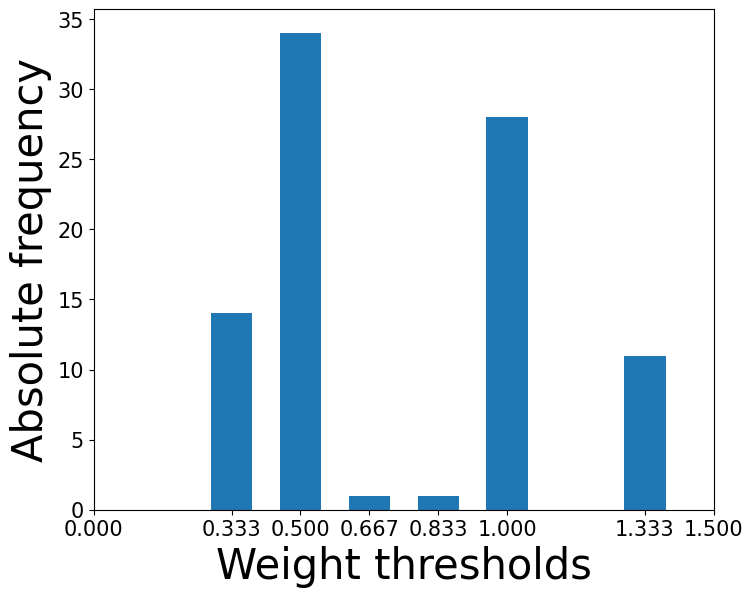

In [816]:
plt.rcParams['figure.figsize'] = [8, 6.5]

plt.bar(bin_edges_S[:-1], hist_S, width = 0.1)
plt.xlim(min(bin_edges_S), max(bin_edges_S))
plt.xlabel("Weight thresholds", fontsize = 30)
plt.ylabel("Absolute frequency", fontsize = 30)
plt.xticks(weightlist, fontsize = 15)
plt.yticks(fontsize = 15)
#plt.set_title('Graph Weight distribution', fontsize=10)
plt.show()


In [617]:
weightlist

[0.0,
 0.3333333333333333,
 0.5,
 0.6666666666666666,
 0.8333333333333333,
 1.0,
 1.3333333333333333,
 1.5]

In [618]:
susceptibility

[3.0,
 2.5,
 4.666666666666667,
 4.666666666666667,
 4.666666666666667,
 2.4285714285714284,
 2.5,
 0.0]

In [619]:
comm_maxes

[0.007, 0.006, 0.0, 0.0, 0.0, 0.0, 0.0, 0]

In [620]:
no_of_comms

[14, 13, 1, 1, 1, 1, 1, 0]

In [621]:
weightlist

[0.0,
 0.3333333333333333,
 0.5,
 0.6666666666666666,
 0.8333333333333333,
 1.0,
 1.3333333333333333,
 1.5]

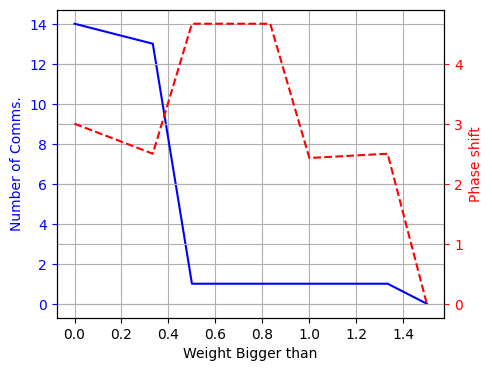

In [622]:
fig, ax = plt.subplots()

ax.plot(weightlist, no_of_comms, color="blue")                  # set line color to blue
ax.set_xlabel('Weight Bigger than')
ax.set_ylabel('Number of Comms.', color="blue")        # set y axis title to blue
ax.tick_params(axis='y', colors="blue")  
ax.grid(True)# set y axis tick labels to blue

# We create another axis object. It shares the same x axis as ax, but the y-axis is separate.
ax2 = ax.twinx()
ax2.plot(weightlist, susceptibility, color="red", linestyle = 'dashed')                  # set line color to red
ax2.set_ylabel('Phase shift', color="red")        # set y axis title to red
ax2.tick_params(axis='y', colors="red")       # set y axis tick labels to red
ax2.grid(True)

plt.show()

# Clustering number

In [623]:
ABCD_groups = {}
clique_groups = {}
groups_k = {}
bipartits = {}

ngn_sg = {}
non_grouped_nodes_sg = {}
ngn = {}

N = 3

for i in range(1, len(assign)+1):
    ABCD_groups[i] = [int(assign[i-1])]
    
#------------------------------------------------------------------------

for i in range(0, len(weightlist)):
    non_grouped_nodes_sg['w_%s' % weightlist[i]] = []
    ngn['w_%s' % weightlist[i]] = []
    ngn_sg['w_%s' % weightlist[i]] = nx.Graph()
    
    groups_k['w_%s' % weightlist[i]] = {}
    bipartits['w_%s' % weightlist[i]] = nx.Graph()
    for l in range(1, len(list(k_clique_communities(graphs['graph_%s' % i], N, cliques=None))) + 1):
        groups_k['w_%s' % weightlist[i]][l] = []
        #groups_k['w_%s' % weightlist[i]][0] = []
        groups_k['w_%s' % weightlist[i]][l] = (sorted(list(k_clique_communities(graphs['graph_%s' % i], N))[l-1]))
    clique_groups['w_%s' % weightlist[i]] = {}
    for k in groups_k['w_%s' % weightlist[i]]:
        for v in groups_k['w_%s' % weightlist[i]][k]:
             clique_groups['w_%s' % weightlist[i]].setdefault(v, []).append(k)
    #middleman['w_%s' % weightlist[i]] = dict((v, [k]) for k in groups_k['w_%s' % weightlist[i]] for v in groups_k['w_%s' % weightlist[i]][k])
    for j in [x for x in range(1,max(nodelist)+1) if x not in (list(dict((v, [k]) for k in groups_k['w_%s' % weightlist[i]] for v in groups_k['w_%s' % weightlist[i]][k]).keys()))]:
        clique_groups['w_%s' % weightlist[i]][j] = [0]
        
    for key in clique_groups['w_%s' % weightlist[i]]:
        if clique_groups['w_%s' % weightlist[i]][key] == [0]:
            non_grouped_nodes_sg['w_%s' % weightlist[i]].append(key)
            ngn['w_%s' % weightlist[i]] = (len(non_grouped_nodes_sg['w_%s' % weightlist[i]]))
        ngn_sg['w_%s' % weightlist[i]] = G2.subgraph(non_grouped_nodes_sg['w_%s' % weightlist[i]])
        
        """
        for k in clique_groups['w_%s' % weightlist[i]]:
            for v in clique_groups['w_%s' % weightlist[i]][k]:
                bipartits['w_%s' % weightlist[i]].add_nodes_from(k, bipartite=0)
                bipartits['w_%s' % weightlist[i]].add_nodes_from(v, bipartite=1)
        #clique_groups['w_%s' % weightlist[i]][j] = [j + len(groups_k['w_%s' % weightlist[i]])]
"""

#ABCD_groups

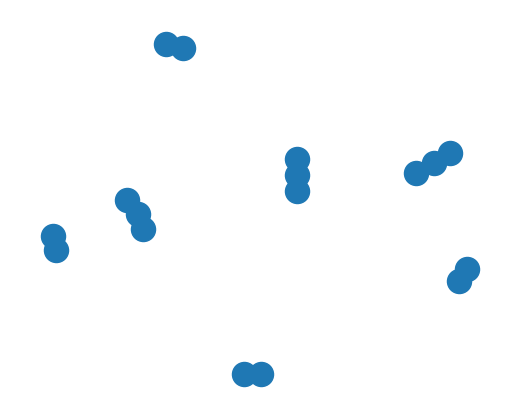

In [624]:
nx.draw(graphs['graph_6'])

In [625]:
groups_k['w_0.3333333333333333']

{1: [1, 2, 17, 32, 46],
 2: [1, 13, 39],
 3: [3, 12, 19, 27, 42, 50],
 4: [5, 7, 14, 15],
 5: [6, 10, 18],
 6: [7, 10, 26],
 7: [8, 18, 24],
 8: [8, 11, 36],
 9: [11, 15, 28],
 10: [9, 16, 38],
 11: [18, 41, 49],
 12: [20, 29, 43],
 13: [21, 22, 33]}

In [626]:
clique_groups['w_0.3333333333333333']

{1: [1, 2],
 2: [1],
 17: [1],
 32: [1],
 46: [1],
 13: [2],
 39: [2],
 3: [3],
 12: [3],
 19: [3],
 27: [3],
 42: [3],
 50: [3],
 5: [4],
 7: [4, 6],
 14: [4],
 15: [4, 9],
 6: [5],
 10: [5, 6],
 18: [5, 7, 11],
 26: [6],
 8: [7, 8],
 24: [7],
 11: [8, 9],
 36: [8],
 28: [9],
 9: [10],
 16: [10],
 38: [10],
 41: [11],
 49: [11],
 20: [12],
 29: [12],
 43: [12],
 21: [13],
 22: [13],
 33: [13],
 4: [0],
 23: [0],
 25: [0],
 30: [0],
 31: [0],
 34: [0],
 35: [0],
 37: [0],
 40: [0],
 44: [0],
 45: [0],
 47: [0],
 48: [0]}

In [627]:
non_grouped_nodes_sg

{'w_0.0': [23, 25, 30, 34, 35, 40, 45, 47, 48],
 'w_0.3333333333333333': [4, 23, 25, 30, 31, 34, 35, 37, 40, 44, 45, 47, 48],
 'w_0.5': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 'w_0.6666666666666666': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 'w_0.8333333333333333': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  

In [628]:
ngn

{'w_0.0': 9,
 'w_0.3333333333333333': 13,
 'w_0.5': 50,
 'w_0.6666666666666666': 50,
 'w_0.8333333333333333': 50,
 'w_1.0': 50,
 'w_1.3333333333333333': 50,
 'w_1.5': 50}

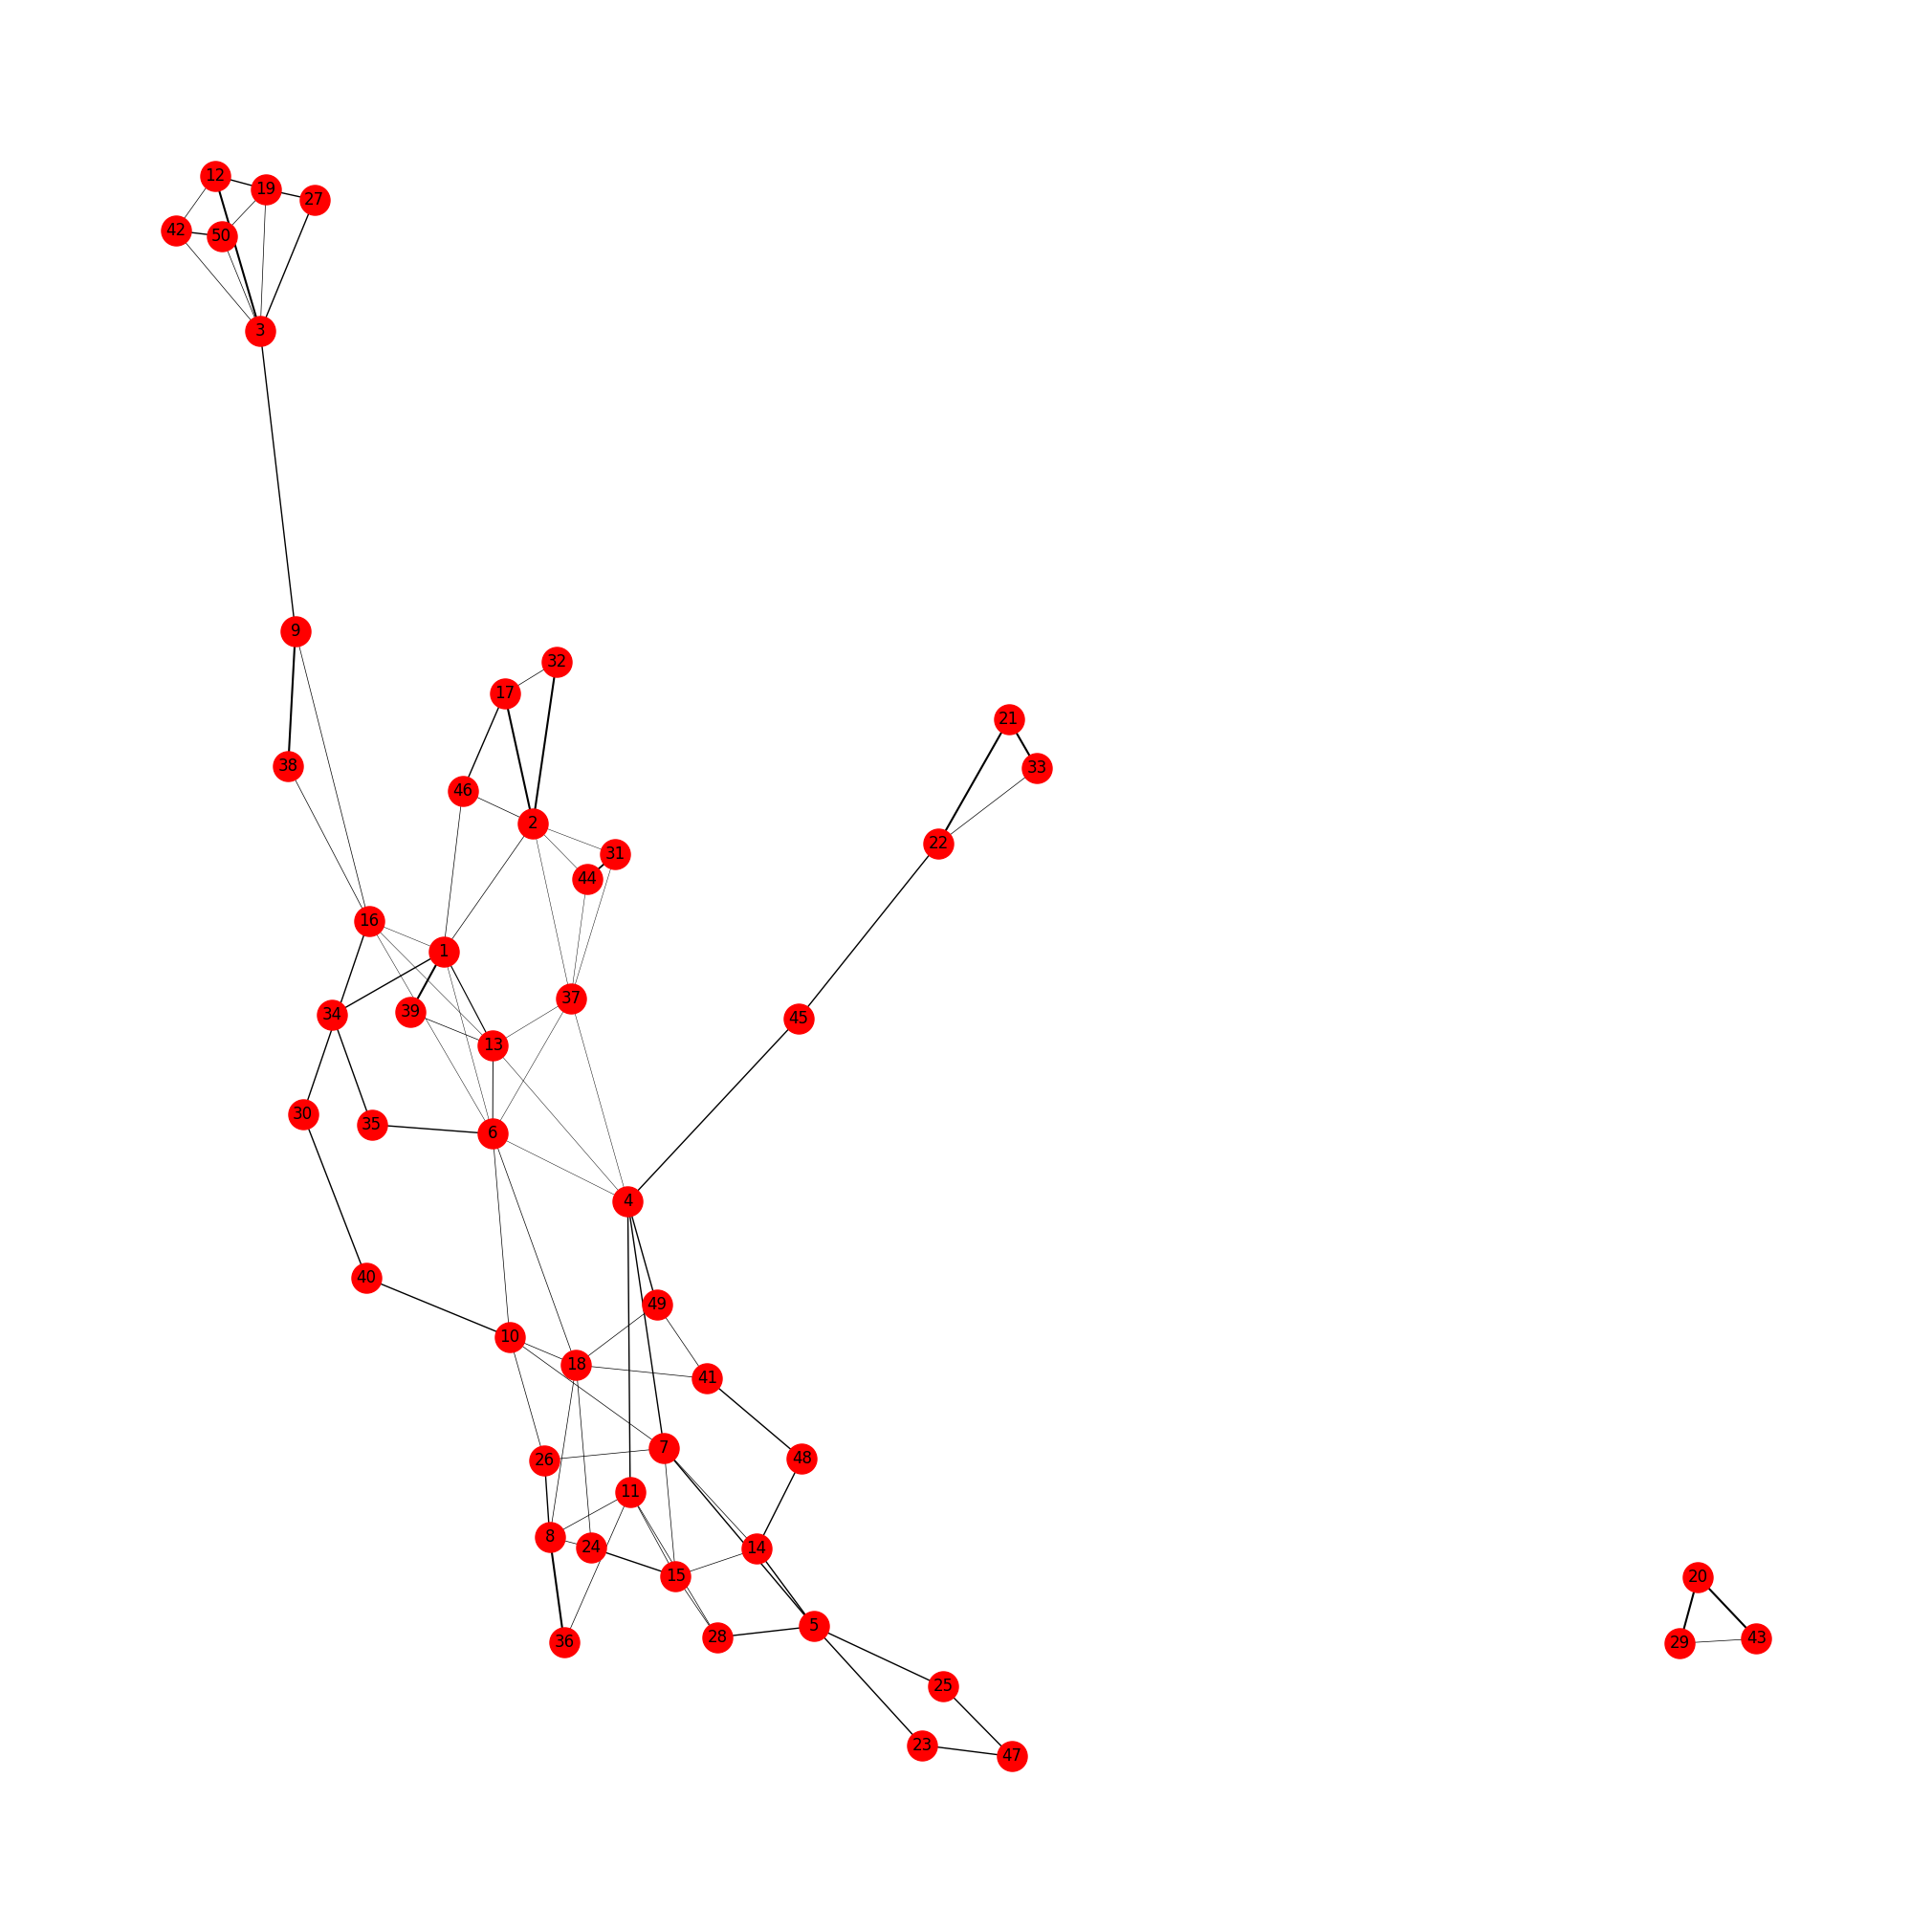

In [677]:
plt.rcParams['figure.figsize'] = [20, 20]

edgest_p, weightst_p = zip(*nx.get_edge_attributes(ngn_sg['w_1.3333333333333333'],'weight').items())

nx.draw(ngn_sg['w_1.3333333333333333'], pos, node_color='r',with_labels=True, edgelist=edgest_p, node_size = 500, width = weightst_p)

In [630]:
def merge_two_dicts(x, y):
    z = x.copy()   # start with keys and values of x
    z.update(y)    # modifies z with keys and values of y
    return z

In [829]:
    N=3
    
    weighted_dict = {}
    graphs = {}
    communities = {}
    community_sizes = {}
    susceptibility = []
    ABCD_groups = {}
    clique_groups = {}
    clique_groups_leftout = {}
    groups_k = {}
    groups_k_leftout = {}
    ngn_sg = {}
    non_grouped_nodes_sg = {}
    ngn = {}
    last_groups = {}

    weightlist = [0.0, ] + sorted(list(set(w)))

    for i in range(1, len(assign)+1):
        ABCD_groups[i] = [int(assign[i-1])]

    for l in range(0, len(weightlist)):
        weighted_dict['weightup_%s' % weightlist[l]] = []
        graphs['graph_%s' % l] =  nx.Graph() 
        communities['c_%s' % l] = []
        community_sizes['c_%s' % l] = []
        ngn_sg['w_%s' % weightlist[l]] = nx.Graph()
        non_grouped_nodes_sg['w_%s' % weightlist[l]] = []
        ngn['w_%s' % weightlist[l]] = []
        
        weighted_dict['weightup_%s' % weightlist[l]] = [(u, v, d) for (u, v, d) in nxlistnew if d > weightlist[l]]
        graphs['graph_%s' % l].add_weighted_edges_from(weighted_dict['weightup_%s' % weightlist[l]])

        for i in range(0, len(list(k_clique_communities(graphs['graph_%s' % l], N, cliques=None)))):
            communities['c_%s' % l].append(sorted(list(k_clique_communities(graphs['graph_%s' % l], N))[i]))
            
        for k in range(0, len(communities['c_%s' % l])):  
            community_sizes['c_%s' % l].append(len(communities['c_%s' % l][k]))     
        
        """
        with open(r'./comm_sizes/comms{0}_{1}_{2}.txt'.format(N, weightlist[l], K), 'w') as file:
            for d in community_sizes['c_%s' % l]:
                file.write(f"{d}\n")  
                
        """
            
        if (sum(community_sizes['c_%s' % l][1:])) == 0.0:
            susceptibility.append(0.0)
        else:        
            susceptibility.append((((sum(sorted(community_sizes['c_%s' % l],reverse=True)[1:]))**2)/(len(community_sizes['c_%s' % l])-1))/1000000)
        #community_sizes['c_%s' % l] = (len(communities['c_%s' % l][i]) for i in range(0, len(communities['c_%s' % l])))

        if len(communities['c_%s' % l]) == 0:
            communities['c_%s' % l] = [[]]

    #for i in range(0, len(weightlist)):
        groups_k['w_%s' % weightlist[l]] = {}
        clique_groups['w_%s' % weightlist[l]] = {}
        #conn_comp['w_%s' % weightlist[l]] = {}
        for j in range(1, len(list(k_clique_communities(graphs['graph_%s' % l], N, cliques=None))) + 1):
            groups_k['w_%s' % weightlist[l]][j] = []
            #conn_comp['w_%s' % weightlist[l]][j] = []
            groups_k['w_%s' % weightlist[l]][j] = (sorted(list(k_clique_communities(graphs['graph_%s' % l], N))[j-1]))
            #conn_comp['w_%s' % weightlist[l]][j] = len(sorted(list(k_clique_communities(graphs['graph_%s' % l], 2))[j-1]))
        for k in groups_k['w_%s' % weightlist[l]]:
            for v in groups_k['w_%s' % weightlist[l]][k]:
                clique_groups['w_%s' % weightlist[l]].setdefault(v, []).append(k)
        #middleman['w_%s' % weightlist[i]] = dict((v, [k]) for k in groups_k['w_%s' % weightlist[i]] for v in groups_k['w_%s' % weightlist[i]][k])
        
        
        
        for j in [x for x in range(1,max(nodelist)+1) if x not in (list(dict((v, [k]) for k in groups_k['w_%s' % weightlist[l]] for v in groups_k['w_%s' % weightlist[l]][k]).keys()))]:
            #clique_groups['w_%s' % weightlist[l]][j] = [j + len(groups_k['w_%s' % weightlist[l]])]
            clique_groups['w_%s' % weightlist[l]][j] = [0]

            non_grouped_nodes_sg['w_%s' % weightlist[l]].append(j)
            ngn['w_%s' % weightlist[l]] = (len(non_grouped_nodes_sg['w_%s' % weightlist[l]]))
        ngn_sg['w_%s' % weightlist[l]] = G2.subgraph(non_grouped_nodes_sg['w_%s' % weightlist[l]])

 
            
        groups_k_leftout['w_%s' % weightlist[l]] = {}
        clique_groups_leftout['w_%s' % weightlist[l]] = {}
        for j in range(1, len(list(k_clique_communities(ngn_sg['w_%s' % weightlist[l]], 2, cliques=None))) + 1):
            groups_k_leftout['w_%s' % weightlist[l]][j] = []
            #conn_comp['w_%s' % weightlist[l]][j] = []
            groups_k_leftout['w_%s' % weightlist[l]][j] = (sorted(list(k_clique_communities(ngn_sg['w_%s' % weightlist[l]], 2))[j-1]))
            #conn_comp['w_%s' % weightlist[l]][j] = len(sorted(list(k_clique_communities(graphs['graph_%s' % l], 2))[j-1]))
        clique_groups_leftout['w_%s' % weightlist[l]] = {}
        for k in groups_k_leftout['w_%s' % weightlist[l]]:
            for v in groups_k_leftout['w_%s' % weightlist[l]][k]:
                clique_groups_leftout['w_%s' % weightlist[l]].setdefault(v, []).append(k + max(clique_groups['w_%s' % weightlist[l]]))
            
            
        last_groups['w_%s' % weightlist[l]] = {}
        last_groups['w_%s' % weightlist[l]] = merge_two_dicts(clique_groups['w_%s' % weightlist[l]], clique_groups_leftout['w_%s' % weightlist[l]])
        
        for k in last_groups['w_%s' % weightlist[l]]:
            if last_groups['w_%s' % weightlist[l]][k] == [0]:
                last_groups['w_%s' % weightlist[l]][k]=[k + 2*max(clique_groups['w_%s' % weightlist[l]])]
          
    no_of_comms = []
    comm_maxes = []

    for l in range(0, len(weightlist)-1):   
        no_of_comms.append(len(communities['c_%s' % l]))
        comm_maxes.append((max(len(communities['c_%s' % l][i]) for i in range(0, len(communities['c_%s' % l]))))/1000)
        
    comm_maxes = comm_maxes + [0]
    no_of_comms = no_of_comms + [0]  
    
    
    clustering_ABCD = Clustering(ABCD_groups)

    clustering_clique = {}

    similarities = []

    for i in range(1, len(clique_groups) + 1):
        clustering_clique[i] = Clustering(last_groups['w_%s' % weightlist[i-1]])
        similarities.append( sim.element_sim(clustering_ABCD, clustering_clique[i], alpha = 0.9))
        #print("Element-centric Similarity No.%s:" %i, sim.element_sim(clustering_ABCD, clustering_clique[i], alpha = 0.9) ) 
        

        
    #------------------------------------------------------------------------

In [830]:
similarities

[0.4801170086255184,
 0.48679511142793613,
 0.1478419452887537,
 0.1478419452887537,
 0.1478419452887537,
 0.1478419452887537,
 0.1478419452887537,
 0.1478419452887537]

In [845]:
    weighted_dict = {}
    graphs = {}
    communities = {}
    community_sizes = {}
    susceptibility = []
    ABCD_groups = {}
    clique_groups = {}
    groups_k = {}

    weightlist = [0.0, ] + sorted(list(set(w)))

    for i in range(1, len(assign)+1):
        ABCD_groups[i] = [int(assign[i-1])]

    for l in range(0, len(weightlist)):
        weighted_dict['weightup_%s' % weightlist[l]] = []
        graphs['graph_%s' % l] =  nx.Graph() 
        communities['c_%s' % l] = []
        community_sizes['c_%s' % l] = []
        
        weighted_dict['weightup_%s' % weightlist[l]] = [(u, v, d) for (u, v, d) in nxlistnew if d > weightlist[l]]
        graphs['graph_%s' % l].add_weighted_edges_from(weighted_dict['weightup_%s' % weightlist[l]])

        for i in range(0, len(list(k_clique_communities(graphs['graph_%s' % l], 3, cliques=None)))):
            communities['c_%s' % l].append(sorted(list(k_clique_communities(graphs['graph_%s' % l], 3))[i]))
            
        for k in range(0, len(communities['c_%s' % l])):  
            community_sizes['c_%s' % l].append(len(communities['c_%s' % l][k]))     
        
            
        if (sum(community_sizes['c_%s' % l][1:])) == 0.0:
            susceptibility.append(0.0)
        else:        
            susceptibility.append((((sum(sorted(community_sizes['c_%s' % l],reverse=True)[1:]))**2)/(len(community_sizes['c_%s' % l])-1))/1000000)
        #community_sizes['c_%s' % l] = (len(communities['c_%s' % l][i]) for i in range(0, len(communities['c_%s' % l])))

        if len(communities['c_%s' % l]) == 0:
            communities['c_%s' % l] = [[]]

    #for i in range(0, len(weightlist)):
        groups_k['w_%s' % weightlist[l]] = {}
        for j in range(1, len(list(k_clique_communities(graphs['graph_%s' % l], N, cliques=None))) + 1):
            groups_k['w_%s' % weightlist[l]][j] = []
            #groups_k['w_%s' % weightlist[i]][0] = []
            groups_k['w_%s' % weightlist[l]][j] = (sorted(list(k_clique_communities(graphs['graph_%s' % l], 3))[j-1]))
        clique_groups['w_%s' % weightlist[l]] = {}
        for k in groups_k['w_%s' % weightlist[l]]:
            for v in groups_k['w_%s' % weightlist[l]][k]:
                clique_groups['w_%s' % weightlist[l]].setdefault(v, []).append(k)
        #middleman['w_%s' % weightlist[i]] = dict((v, [k]) for k in groups_k['w_%s' % weightlist[i]] for v in groups_k['w_%s' % weightlist[i]][k])
        for j in [x for x in range(1,max(nodelist)+1) if x not in (list(dict((v, [k]) for k in groups_k['w_%s' % weightlist[l]] for v in groups_k['w_%s' % weightlist[l]][k]).keys()))]:
            clique_groups['w_%s' % weightlist[l]][j] = [l*2]
          
    no_of_comms = []
    comm_maxes = []

    for l in range(0, len(weightlist)-1):   
        no_of_comms.append(len(communities['c_%s' % l]))
        comm_maxes.append((max(len(communities['c_%s' % l][i]) for i in range(0, len(communities['c_%s' % l]))))/1000)
        
    comm_maxes = comm_maxes + [0]
    no_of_comms = no_of_comms + [0]  
    
    
    clustering_ABCD = Clustering(ABCD_groups)

    clustering_clique = {}

    similarities = []

    for i in range(1, len(clique_groups) + 1):
        clustering_clique[i] = Clustering(clique_groups['w_%s' % weightlist[i-1]])
        similarities.append( sim.element_sim(clustering_ABCD, clustering_clique[i], alpha = 0.9))
        #print("Element-centric Similarity No.%s:" %i, sim.element_sim(clustering_ABCD, clustering_clique[i], alpha = 0.9) ) 

In [837]:
weightlist3, susceptibility3, comm_maxes3, similarities3, community_sizes3 = swissknife(3)

susceptibility3

In [846]:
similarities

[0.4543154213239312,
 0.42467249619273034,
 0.12799999999999978,
 0.12799999999999978,
 0.12799999999999978,
 0.12799999999999978,
 0.12799999999999978,
 0.12799999999999978]

In [800]:
def clique_coloring(graph, k):
    communities = []
    color_map=[]
    size=[]
    legend = []
    #lista = []
    nodelist2 = []
    
    for nodes in graph.nodes():
        nodelist2.append(nodes)

    for i in range(0, len(list(k_clique_communities(graph, k, cliques=None)))):
        communities.append(sorted(list(k_clique_communities(graph, k))[i]))    
        
    number_of_colors = len(communities)

    color = ["#"+''.join([random.choice('0123456789ABCDEF') for k in range(6)])
                for l in range(number_of_colors)]
    
    trier = {color[i] : communities[i] for i in range(0, len(communities)) if (color[i] != '#FF0000' or color[i] != '#808080')}

    for node in nodelist2:
        if node in list(chain(*trier.values())):
            if (list(chain(*trier.values())).count(node) == 1):
                #color_map.append('green')
                for i in range(0, len(list(trier.values()))):
                    if (node in list(trier.values())[i]) == True:
                        c = color[i] 
                        color_map.append(c)
            else:
                color_map.append('#FF0000')
        else:
            color_map.append('#808080')


    for i in range (0, len(color_map)):
        if color_map[i] == '#FF0000':
            size.append(600)
        elif color_map[i] == '#808080':
            size.append(250)
        else:
            size.append(450)
        
    for i in range(0, len(communities)):
        legend.append(mpatches.Patch(color=color[i], label=(communities[i])))
        #lista = legend + [mpatches.Patch(color= '#FF0000', label='Multigroups'), mpatches.Patch(color= '#808080', label='0 groups')]
    
    if communities == []:
        print('No groups for k =', k)
    else:
        edgest_p, weightst_p = zip(*nx.get_edge_attributes(graph,'weight').items())

        #nx.draw(graph, pos = nx.spring_layout(graph), node_color=color_map, with_labels=False, edgelist=edgest_p, node_size = size, width = weightst_p)
        
        
        
        
        #nx.draw(graph, pos = nx.spring_layout(graph) , node_color=color_map ,with_labels=False, node_size = size, edgelist=edges, width=weights)
        #plt.legend('csop:színek', loc='upper left')

        #plt.legend(handles = [lista[i] for i in range(0, len(lista))])

        plt.show()
    
    return(communities, edgest_p, weightst_p, graph, color_map, size)

In [633]:
weightlist

[0.0,
 0.3333333333333333,
 0.5,
 0.6666666666666666,
 0.8333333333333333,
 1.0,
 1.3333333333333333,
 1.5]

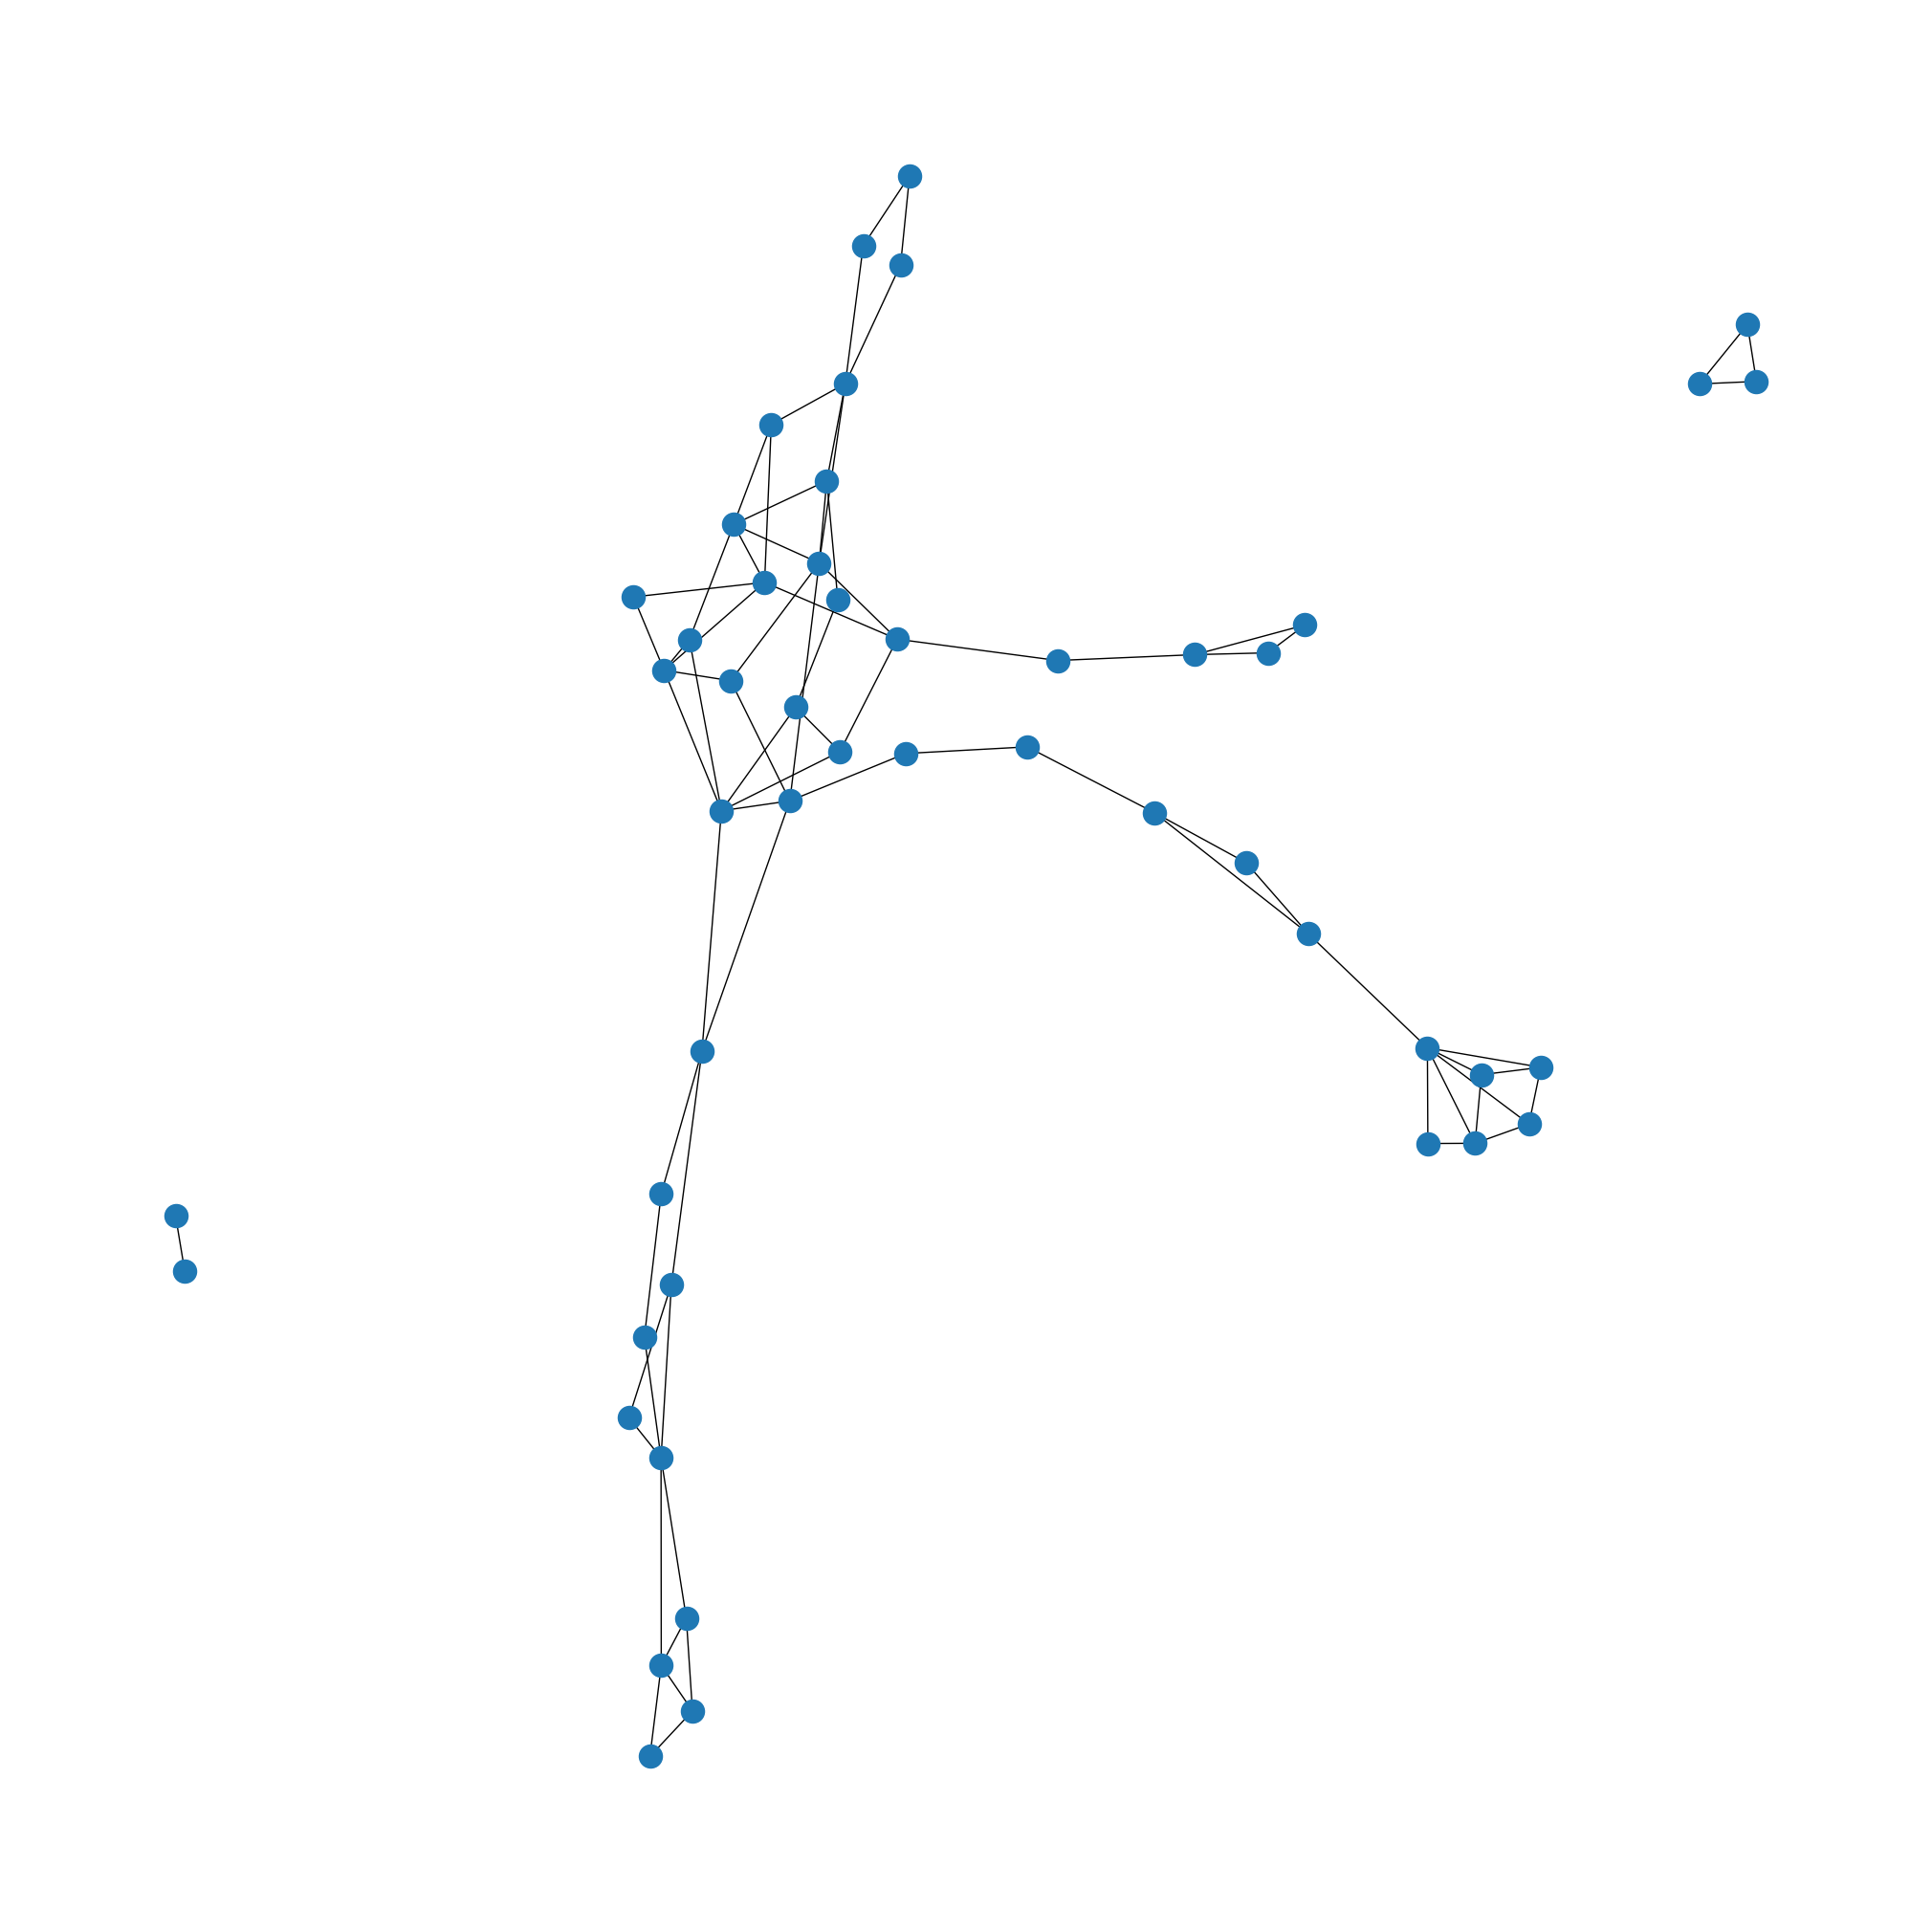

In [634]:

nx.draw(graphs['graph_1'])


In [635]:
clique_coloring(graphs['graph_1'], 3) 

([[1, 2, 17, 32, 46],
  [1, 13, 39],
  [3, 12, 19, 27, 42, 50],
  [5, 7, 14, 15],
  [6, 10, 18],
  [7, 10, 26],
  [8, 18, 24],
  [8, 11, 36],
  [11, 15, 28],
  [9, 16, 38],
  [18, 41, 49],
  [20, 29, 43],
  [21, 22, 33]],
 ((22, 45),
  (22, 21),
  (22, 33),
  (45, 4),
  (21, 33),
  (4, 11),
  (4, 7),
  (4, 49),
  (25, 47),
  (25, 5),
  (47, 23),
  (5, 28),
  (5, 7),
  (5, 14),
  (5, 23),
  (1, 13),
  (1, 34),
  (1, 2),
  (1, 46),
  (1, 39),
  (13, 6),
  (13, 39),
  (34, 35),
  (2, 32),
  (2, 46),
  (2, 17),
  (46, 17),
  (6, 35),
  (6, 18),
  (6, 10),
  (18, 8),
  (18, 24),
  (18, 41),
  (18, 10),
  (18, 49),
  (10, 40),
  (10, 7),
  (10, 26),
  (16, 30),
  (16, 9),
  (16, 38),
  (30, 40),
  (9, 3),
  (9, 38),
  (3, 12),
  (3, 19),
  (3, 27),
  (3, 42),
  (3, 50),
  (12, 19),
  (12, 42),
  (19, 27),
  (19, 50),
  (42, 50),
  (32, 17),
  (11, 15),
  (11, 28),
  (11, 8),
  (11, 36),
  (7, 15),
  (7, 14),
  (7, 26),
  (49, 41),
  (15, 28),
  (15, 14),
  (15, 24),
  (8, 36),
  (8, 24),
  (

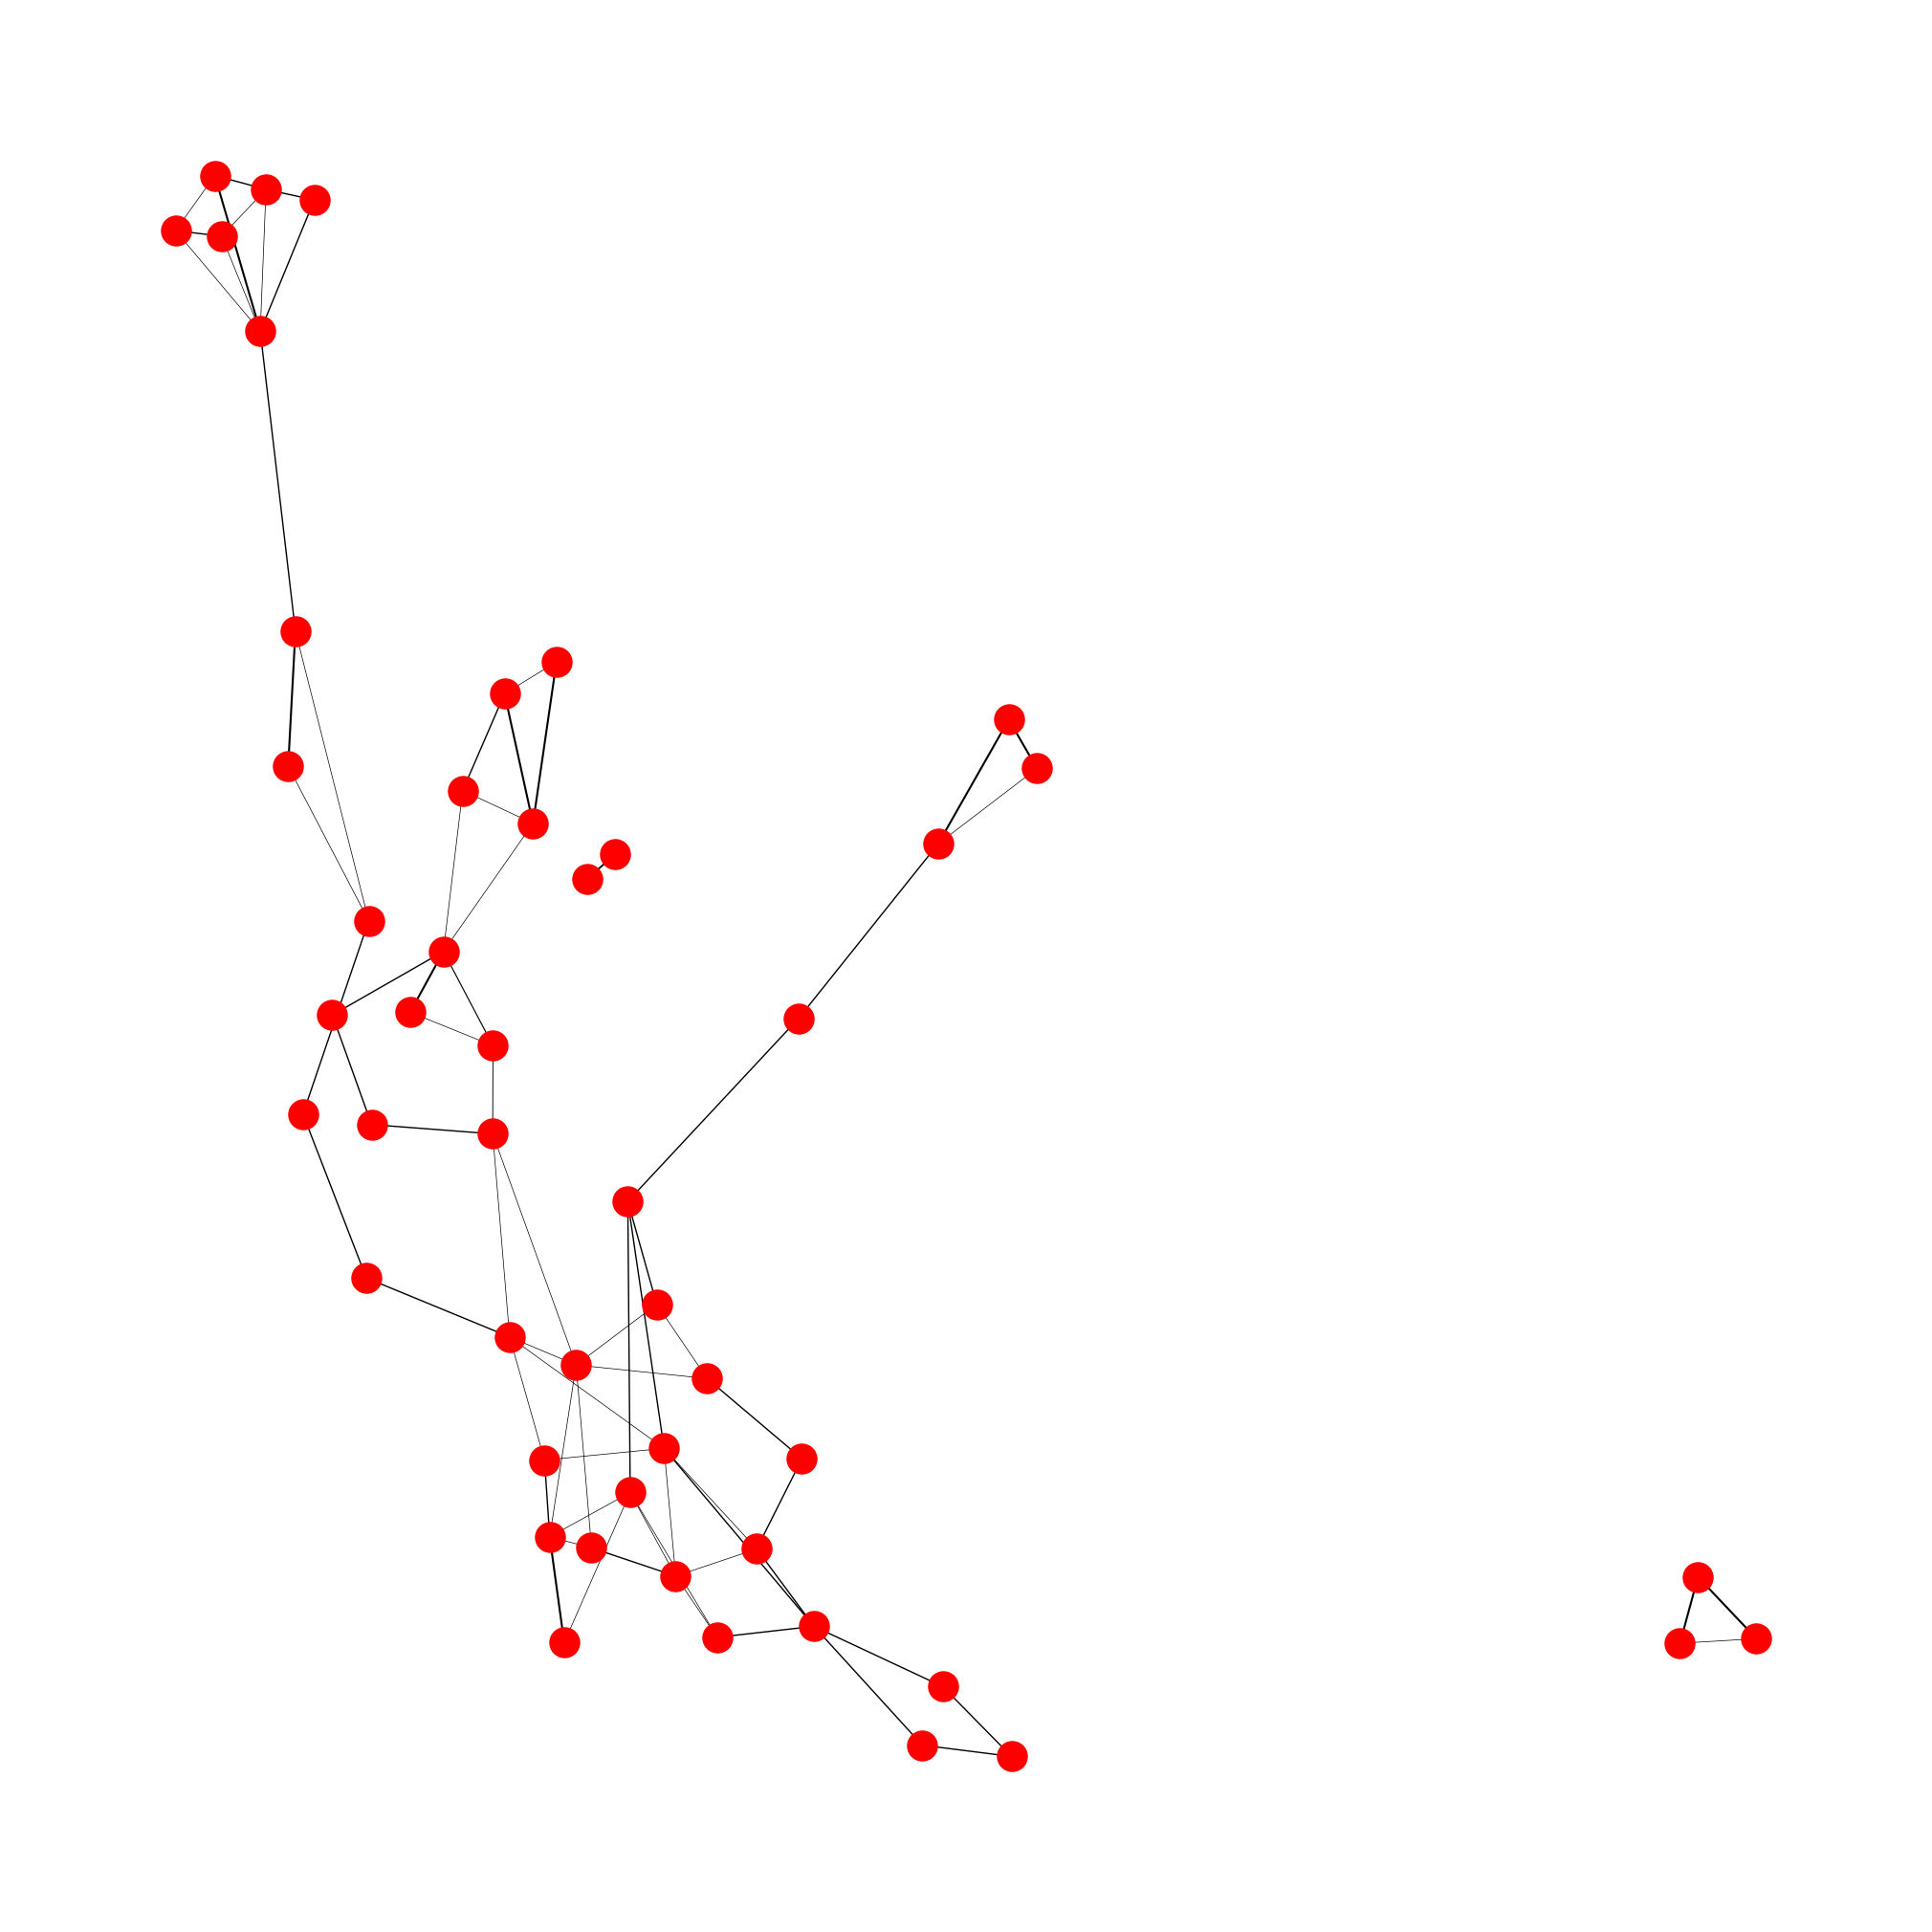

In [849]:
plt.rcParams['figure.figsize'] = [20, 20]

edgest_p, weightst_p = zip(*nx.get_edge_attributes(graphs['graph_1'],'weight').items())

nx.draw(graphs['graph_1'], pos, node_color='r',with_labels=False, edgelist=edgest_p, node_size = 500, width = weightst_p)

In [850]:
edgest_p

((22, 45),
 (22, 21),
 (22, 33),
 (45, 4),
 (21, 33),
 (4, 11),
 (4, 7),
 (4, 49),
 (25, 47),
 (25, 5),
 (47, 23),
 (5, 28),
 (5, 7),
 (5, 14),
 (5, 23),
 (1, 13),
 (1, 34),
 (1, 2),
 (1, 46),
 (1, 39),
 (13, 6),
 (13, 39),
 (34, 35),
 (2, 32),
 (2, 46),
 (2, 17),
 (46, 17),
 (6, 35),
 (6, 18),
 (6, 10),
 (18, 8),
 (18, 24),
 (18, 41),
 (18, 10),
 (18, 49),
 (10, 40),
 (10, 7),
 (10, 26),
 (16, 30),
 (16, 9),
 (16, 38),
 (30, 40),
 (9, 3),
 (9, 38),
 (3, 12),
 (3, 19),
 (3, 27),
 (3, 42),
 (3, 50),
 (12, 19),
 (12, 42),
 (19, 27),
 (19, 50),
 (42, 50),
 (32, 17),
 (11, 15),
 (11, 28),
 (11, 8),
 (11, 36),
 (7, 15),
 (7, 14),
 (7, 26),
 (49, 41),
 (15, 28),
 (15, 14),
 (15, 24),
 (8, 36),
 (8, 24),
 (8, 26),
 (20, 43),
 (20, 29),
 (43, 29),
 (31, 44),
 (14, 48),
 (48, 41))

In [809]:
plt.rcParams['figure.figsize'] = [20, 20]
communities, edgest_p, weightst_p, graph, color_map, size = clique_coloring(graphs['graph_1'], 4) 


No groups for k = 4


UnboundLocalError: local variable 'edgest_p' referenced before assignment

In [804]:
communities2, edgest_p2, weightst_p2, graph2, color_map2, size2 = clique_coloring(ngn_sg['w_0.3333333333333333'], 2) 

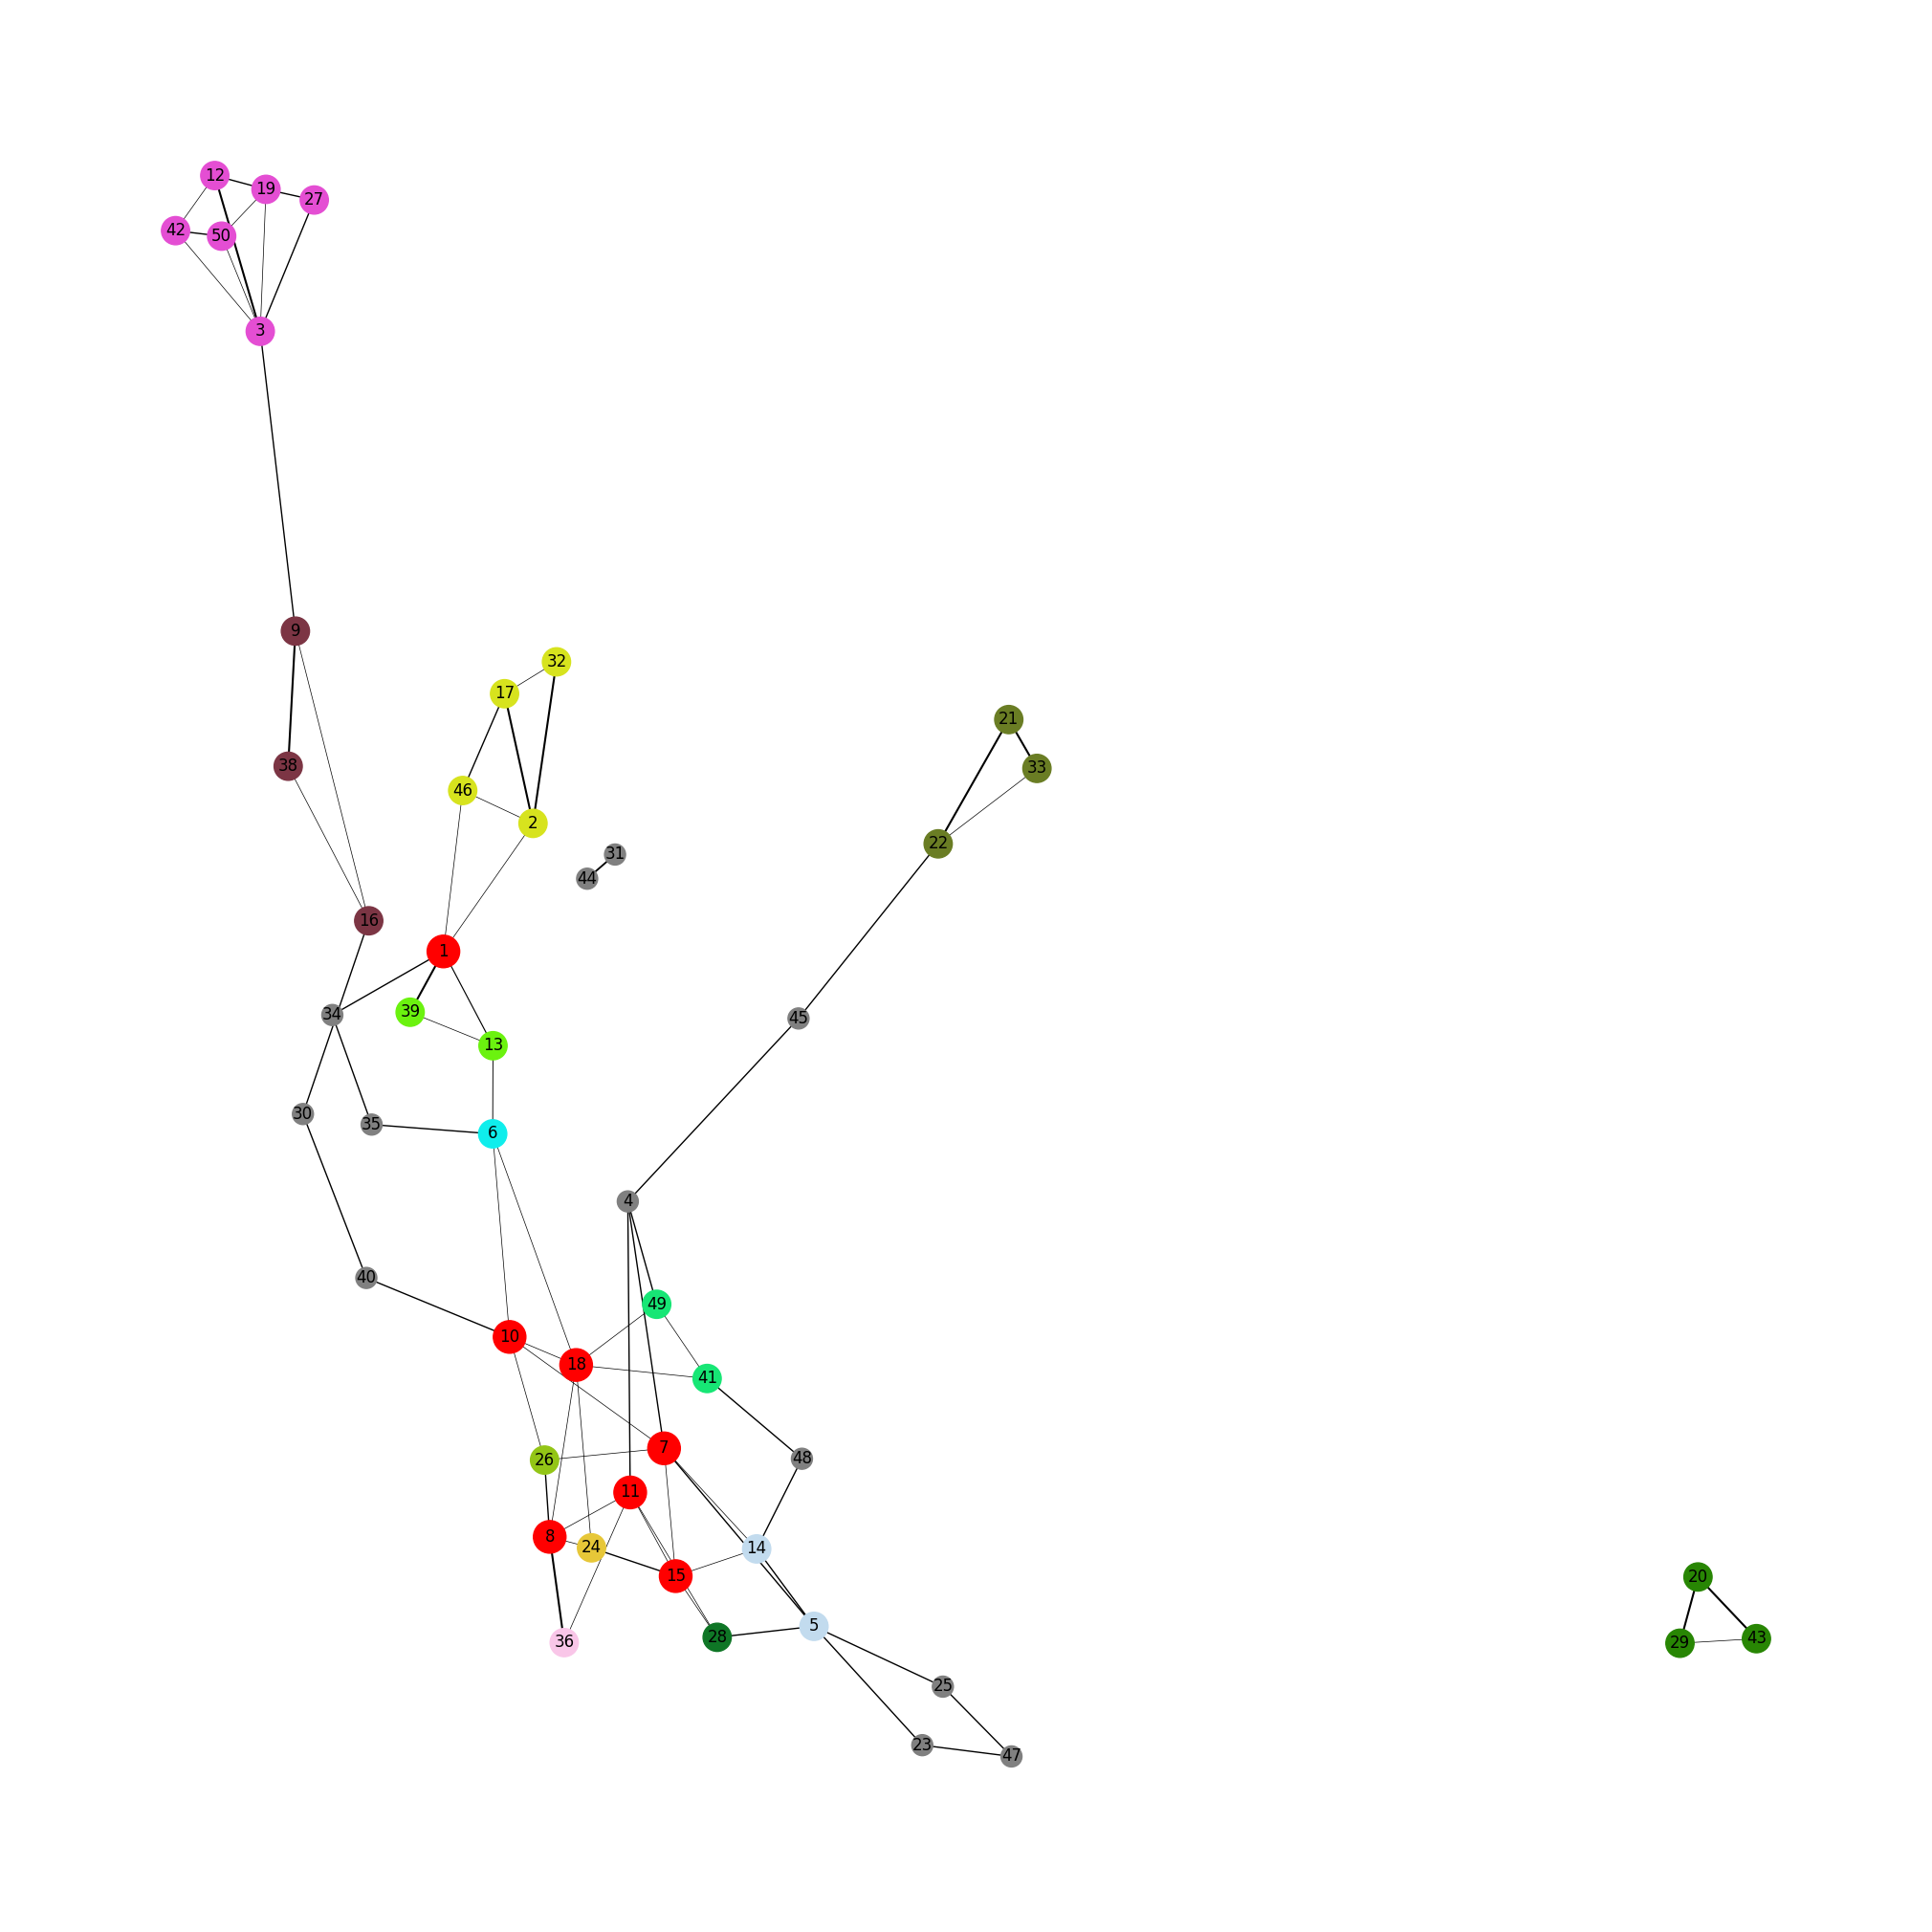

In [810]:
nx.draw(graph, pos, node_color=color_map, with_labels=True, edgelist=edgest_p, node_size = size, width = weightst_p)
#nx.draw(graph2, pos, node_color=color_map2, with_labels=True, edgelist=edgest_p2, node_size = size2, width = weightst_p2)

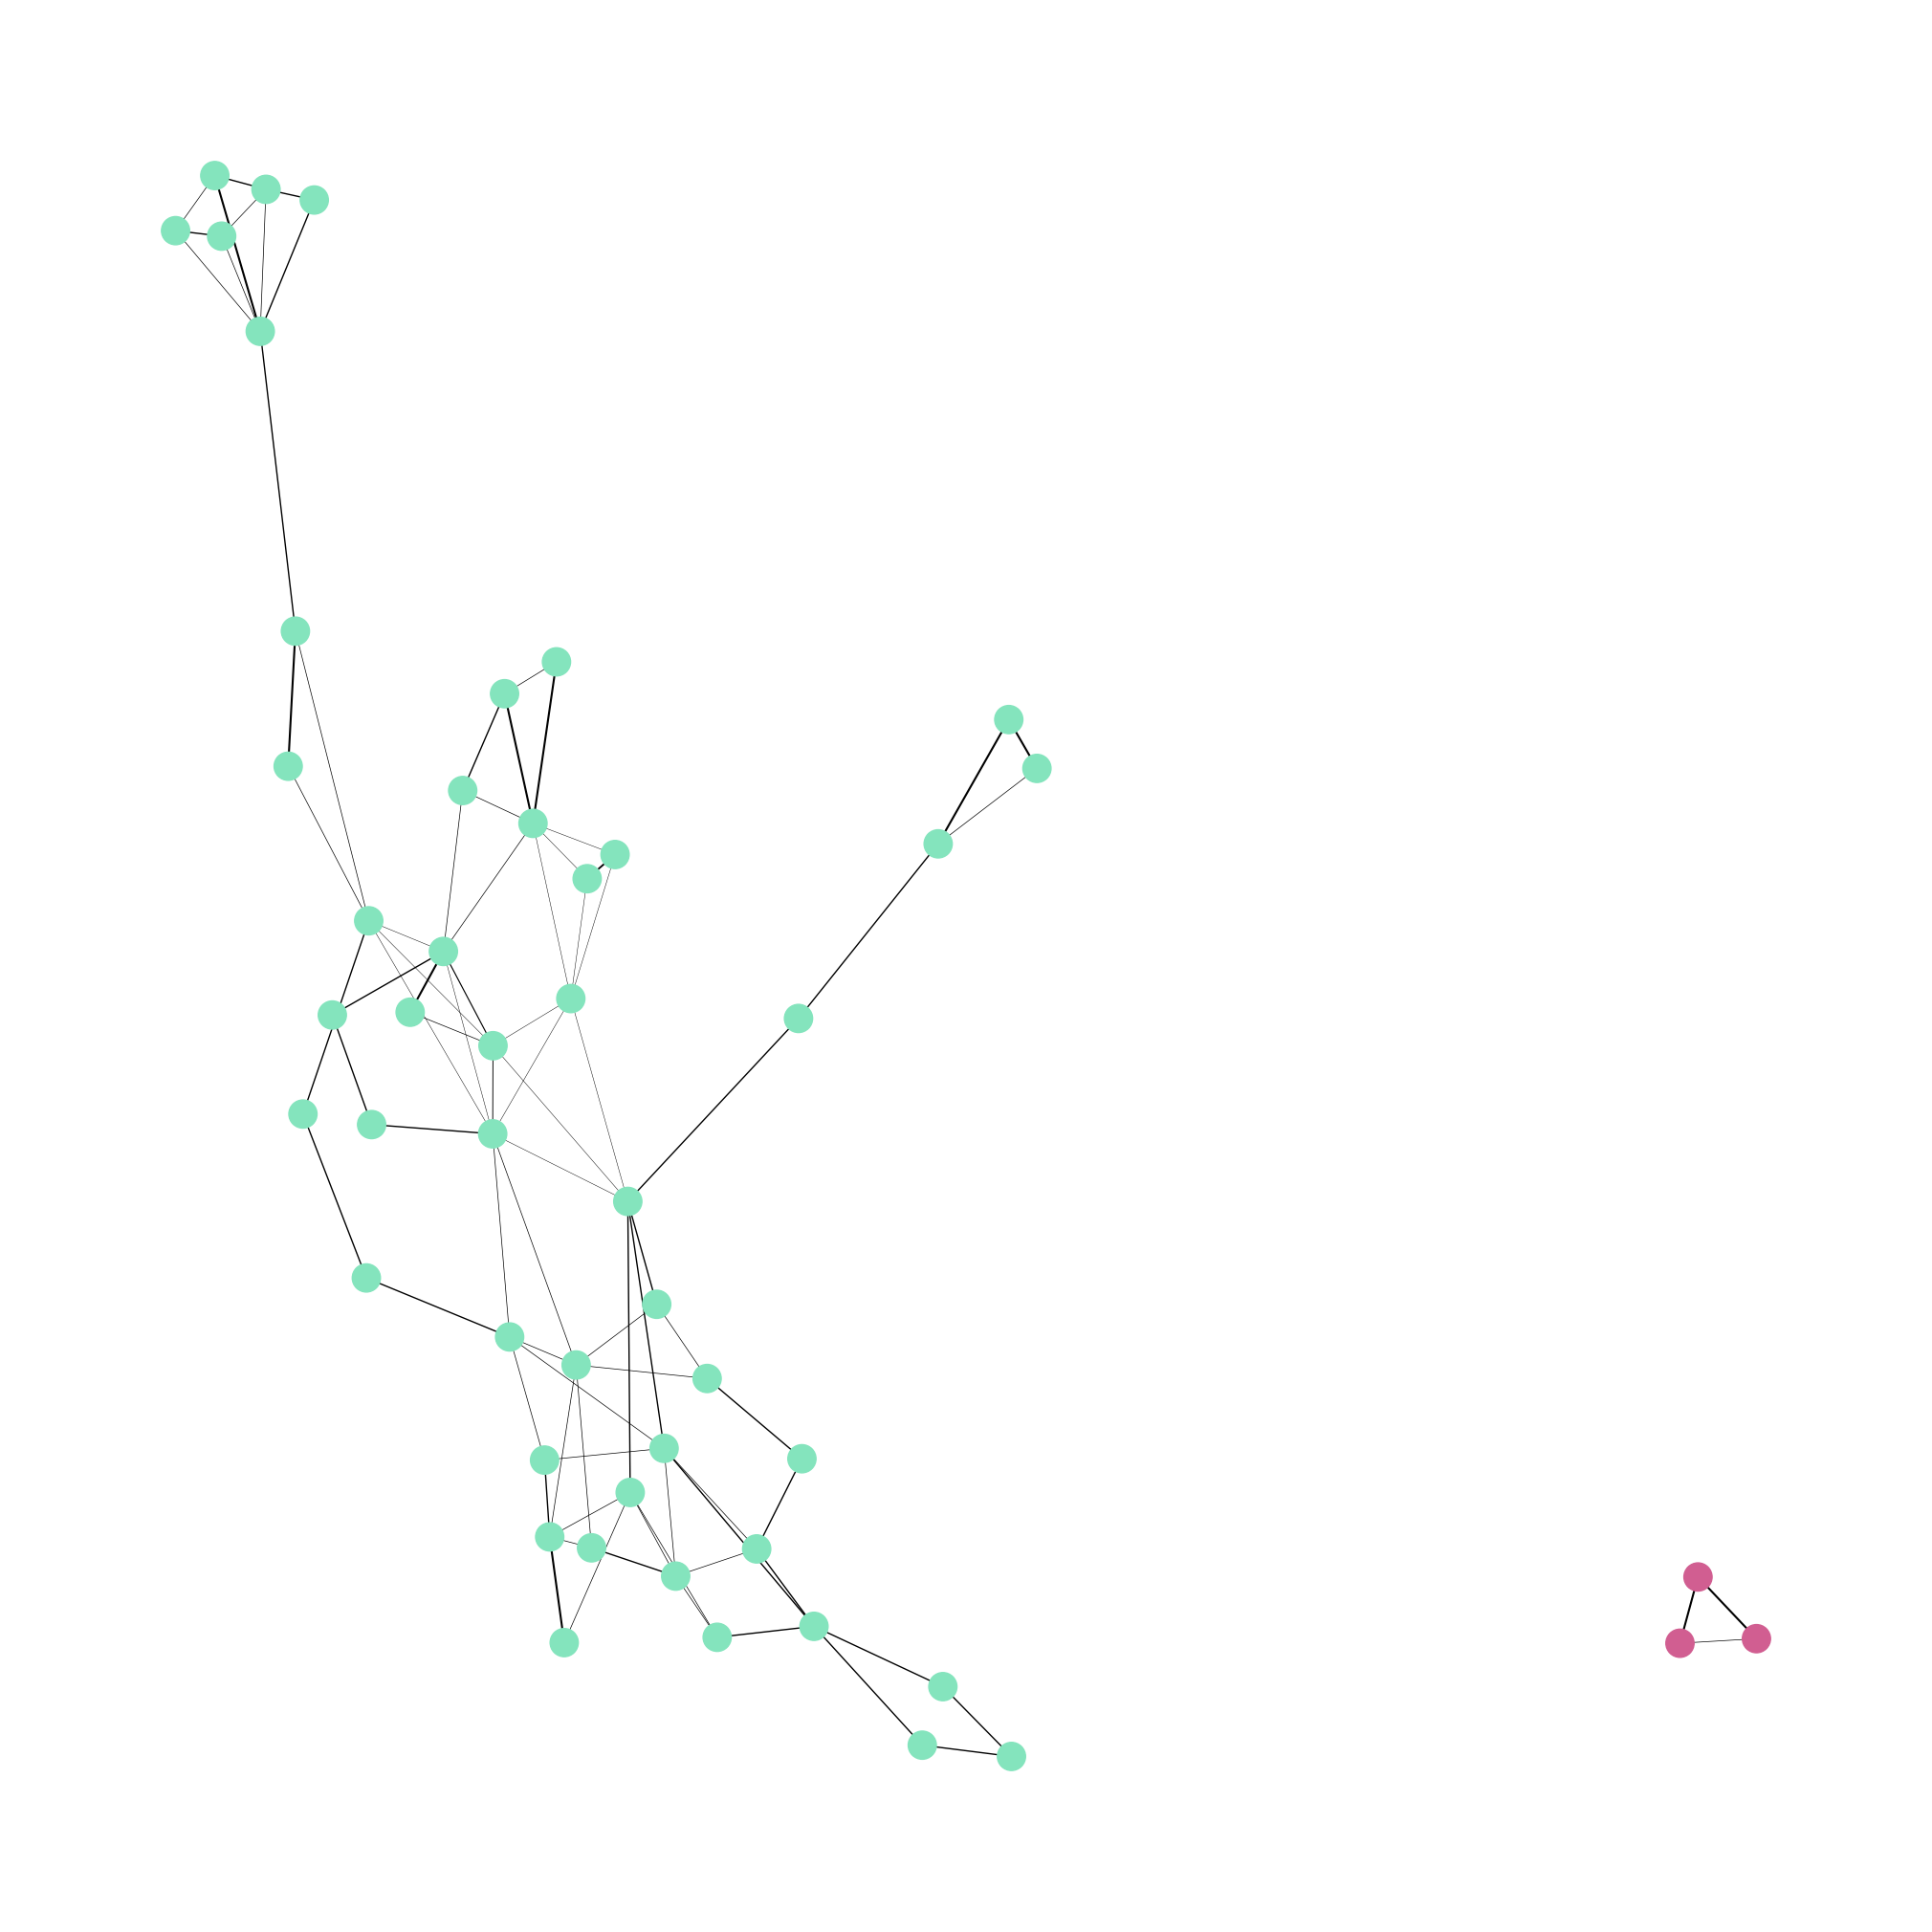

In [806]:
#nx.draw(graph, pos, node_color=color_map, with_labels=False, edgelist=edgest_p, node_size = size, width = weightst_p)
nx.draw(graph2, pos, node_color=color_map2, with_labels=False, edgelist=edgest_p2, node_size = size2, width = weightst_p2)

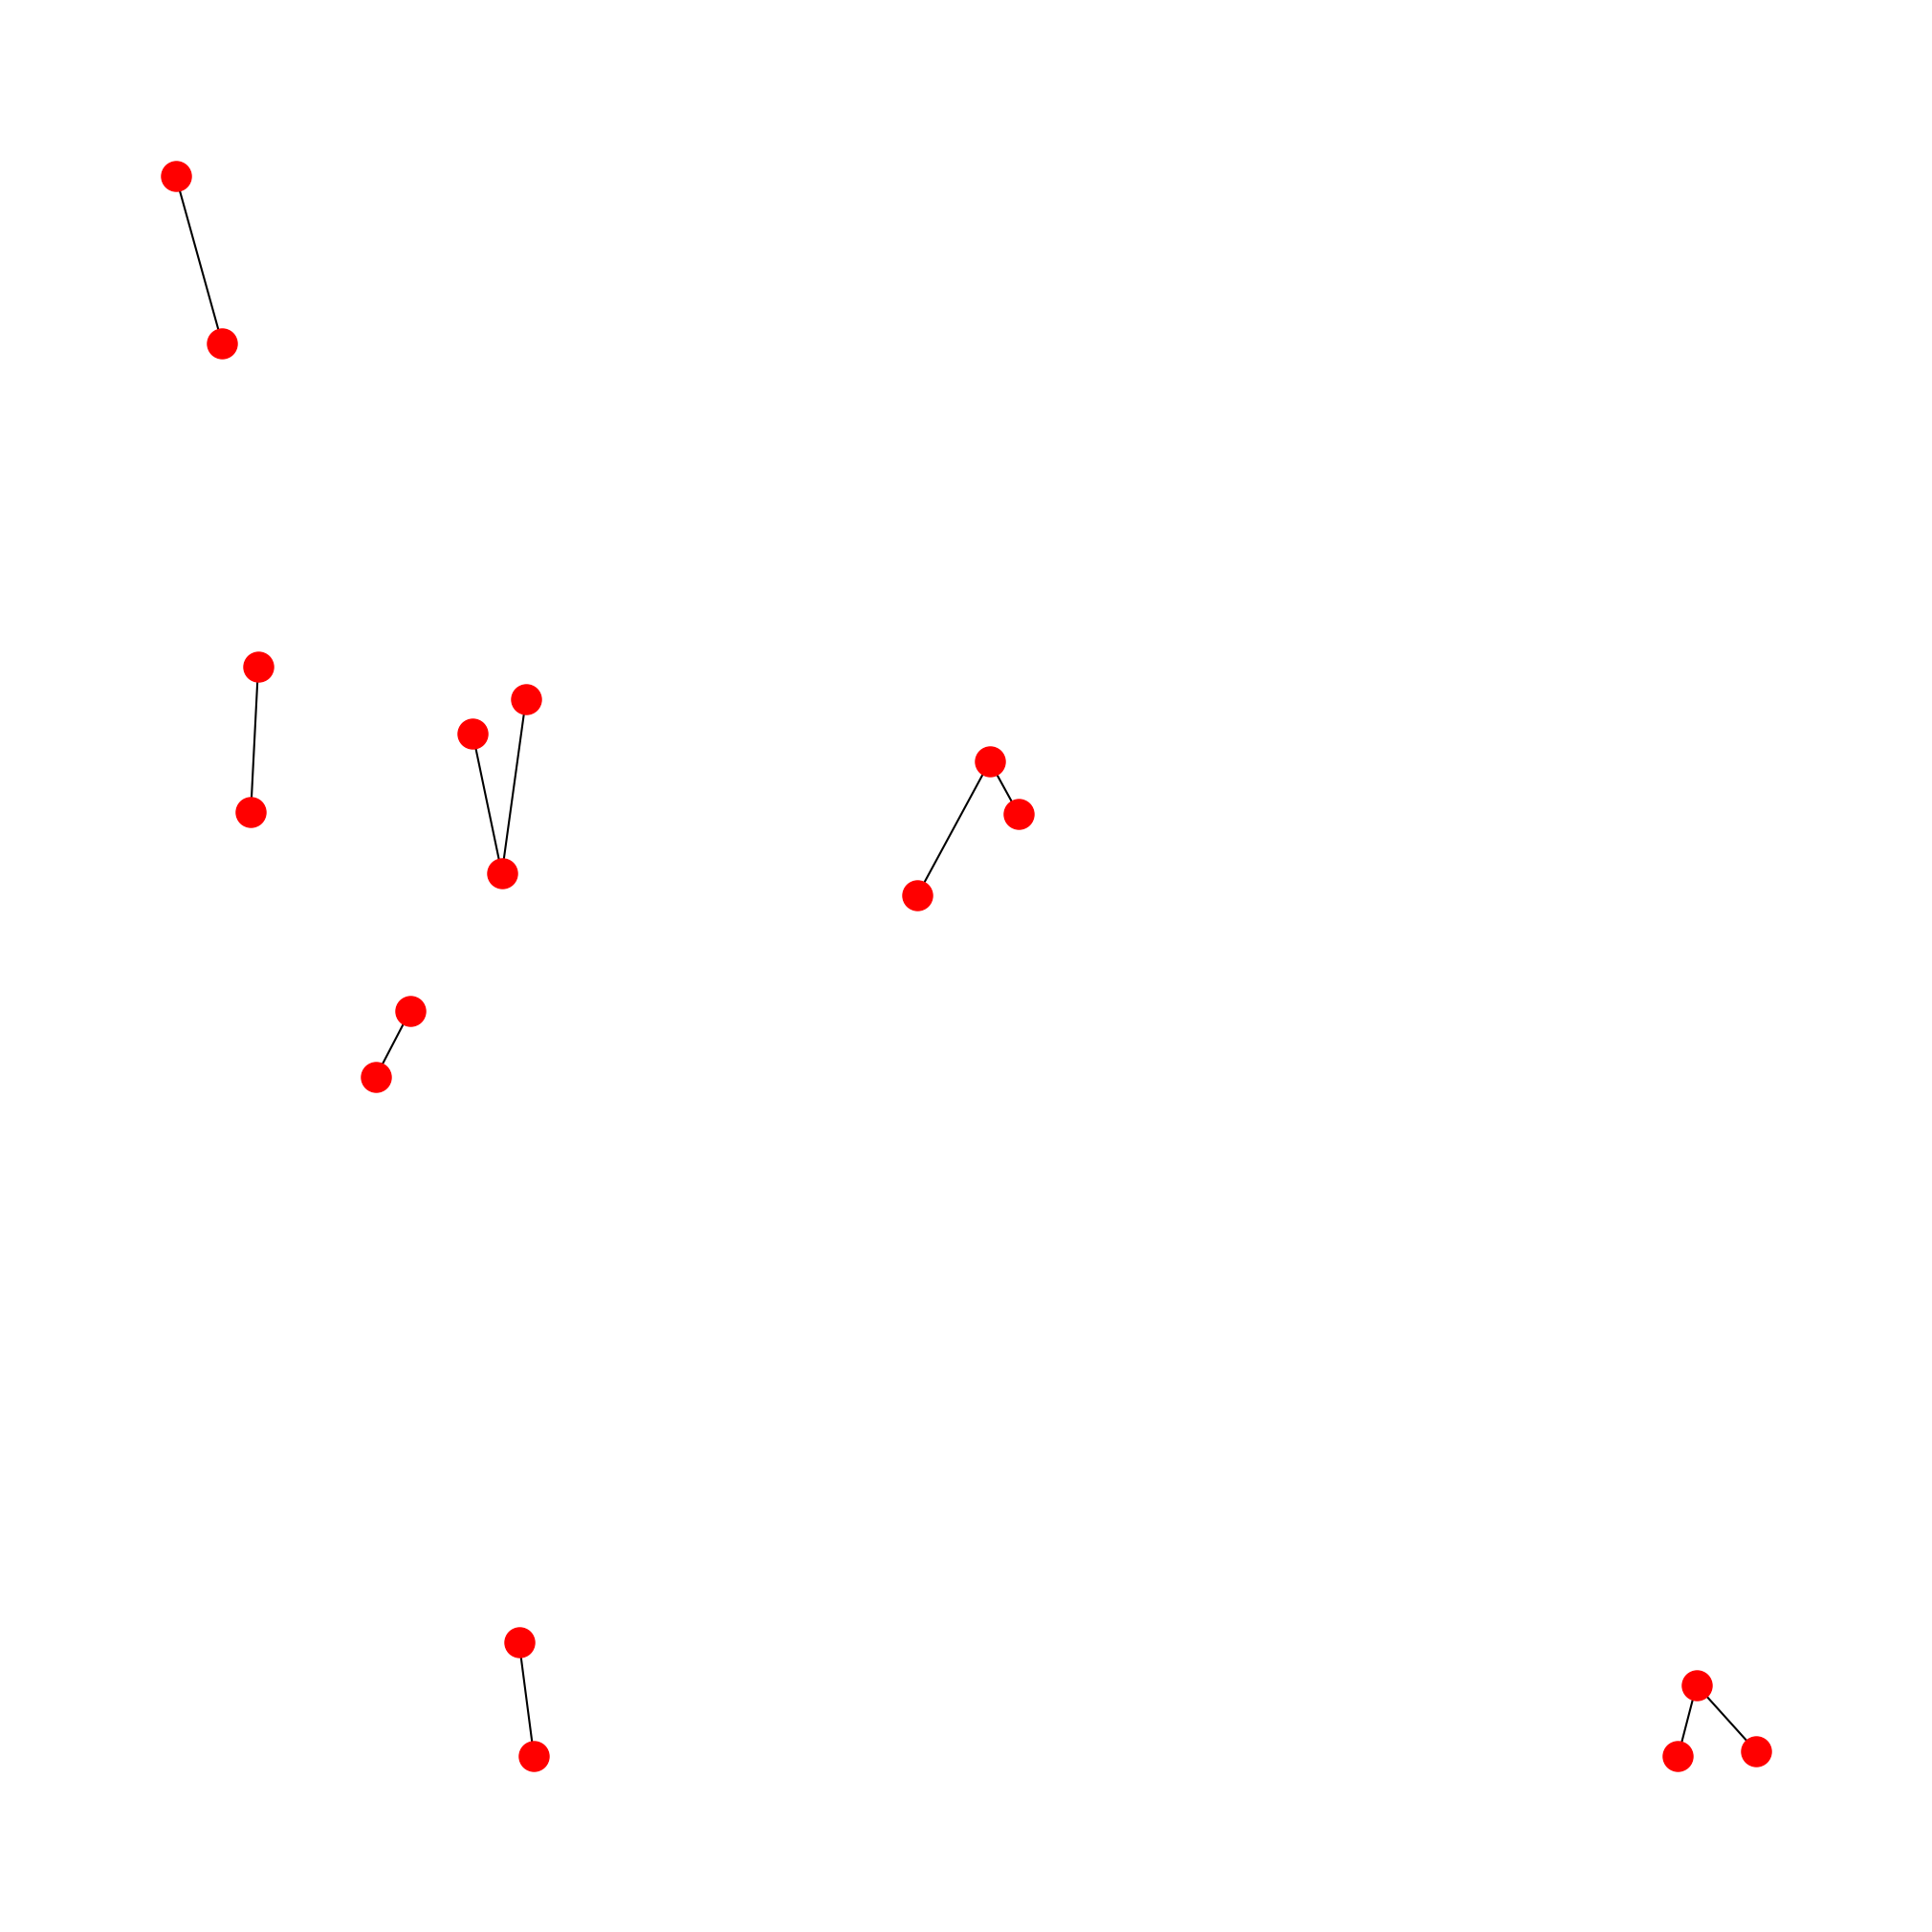

In [826]:

plt.rcParams['figure.figsize'] = [20, 20]

edgest_p, weightst_p = zip(*nx.get_edge_attributes(graphs['graph_6'],'weight').items())

nx.draw(graphs['graph_6'], pos, node_color='r',with_labels=False, edgelist=edgest_p, node_size = 500, width = weightst_p)

In [823]:
weightlist

[0.0,
 0.3333333333333333,
 0.5,
 0.6666666666666666,
 0.8333333333333333,
 1.0,
 1.3333333333333333,
 1.5]

In [640]:
graphs

{'graph_0': <networkx.classes.graph.Graph at 0x14cbaa8feb0>,
 'graph_1': <networkx.classes.graph.Graph at 0x14cbb60e970>,
 'graph_2': <networkx.classes.graph.Graph at 0x14cbb60e850>,
 'graph_3': <networkx.classes.graph.Graph at 0x14cbb23c9d0>,
 'graph_4': <networkx.classes.graph.Graph at 0x14cd70ab9a0>,
 'graph_5': <networkx.classes.graph.Graph at 0x14cbb1cbeb0>,
 'graph_6': <networkx.classes.graph.Graph at 0x14cbb1cb400>,
 'graph_7': <networkx.classes.graph.Graph at 0x14cbb1cbee0>}

In [641]:
similarities

[0.4801170086255184,
 0.48679511142793613,
 0.1478419452887537,
 0.1478419452887537,
 0.1478419452887537,
 0.1478419452887537,
 0.1478419452887537,
 0.1478419452887537]

In [642]:
clique_groups

{'w_0.0': {1: [1, 6],
  2: [1, 2],
  17: [1],
  32: [1],
  46: [1],
  31: [2],
  37: [2, 6],
  44: [2],
  3: [3],
  12: [3],
  19: [3],
  27: [3],
  42: [3],
  50: [3],
  5: [4],
  7: [4, 7],
  14: [4],
  15: [4, 11],
  6: [5, 6],
  10: [5, 7],
  18: [5, 8, 14],
  4: [6],
  13: [6],
  16: [6, 10],
  39: [6],
  26: [7],
  8: [8, 9],
  24: [8],
  11: [9, 11],
  36: [9],
  9: [10],
  38: [10],
  28: [11],
  20: [12],
  29: [12],
  43: [12],
  21: [13],
  22: [13],
  33: [13],
  41: [14],
  49: [14],
  23: [0],
  25: [0],
  30: [0],
  34: [0],
  35: [0],
  40: [0],
  45: [0],
  47: [0],
  48: [0]},
 'w_0.3333333333333333': {1: [1, 2],
  2: [1],
  17: [1],
  32: [1],
  46: [1],
  13: [2],
  39: [2],
  3: [3],
  12: [3],
  19: [3],
  27: [3],
  42: [3],
  50: [3],
  5: [4],
  7: [4, 6],
  14: [4],
  15: [4, 9],
  6: [5],
  10: [5, 6],
  18: [5, 7, 11],
  26: [6],
  8: [7, 8],
  24: [7],
  11: [8, 9],
  36: [8],
  28: [9],
  9: [10],
  16: [10],
  38: [10],
  41: [11],
  49: [11],
  20: [12],

In [643]:
clique_groups_leftout['w_0.3333333333333333']

{34: [51],
 35: [51],
 4: [52],
 31: [52],
 37: [52],
 44: [52],
 45: [52],
 30: [53],
 40: [53],
 23: [54],
 25: [54],
 47: [54]}

In [644]:
last_groups['w_0.3333333333333333']

{1: [1, 2],
 2: [1],
 17: [1],
 32: [1],
 46: [1],
 13: [2],
 39: [2],
 3: [3],
 12: [3],
 19: [3],
 27: [3],
 42: [3],
 50: [3],
 5: [4],
 7: [4, 6],
 14: [4],
 15: [4, 9],
 6: [5],
 10: [5, 6],
 18: [5, 7, 11],
 26: [6],
 8: [7, 8],
 24: [7],
 11: [8, 9],
 36: [8],
 28: [9],
 9: [10],
 16: [10],
 38: [10],
 41: [11],
 49: [11],
 20: [12],
 29: [12],
 43: [12],
 21: [13],
 22: [13],
 33: [13],
 4: [52],
 23: [54],
 25: [54],
 30: [53],
 31: [52],
 34: [51],
 35: [51],
 37: [52],
 40: [53],
 44: [52],
 45: [52],
 47: [54],
 48: [148]}

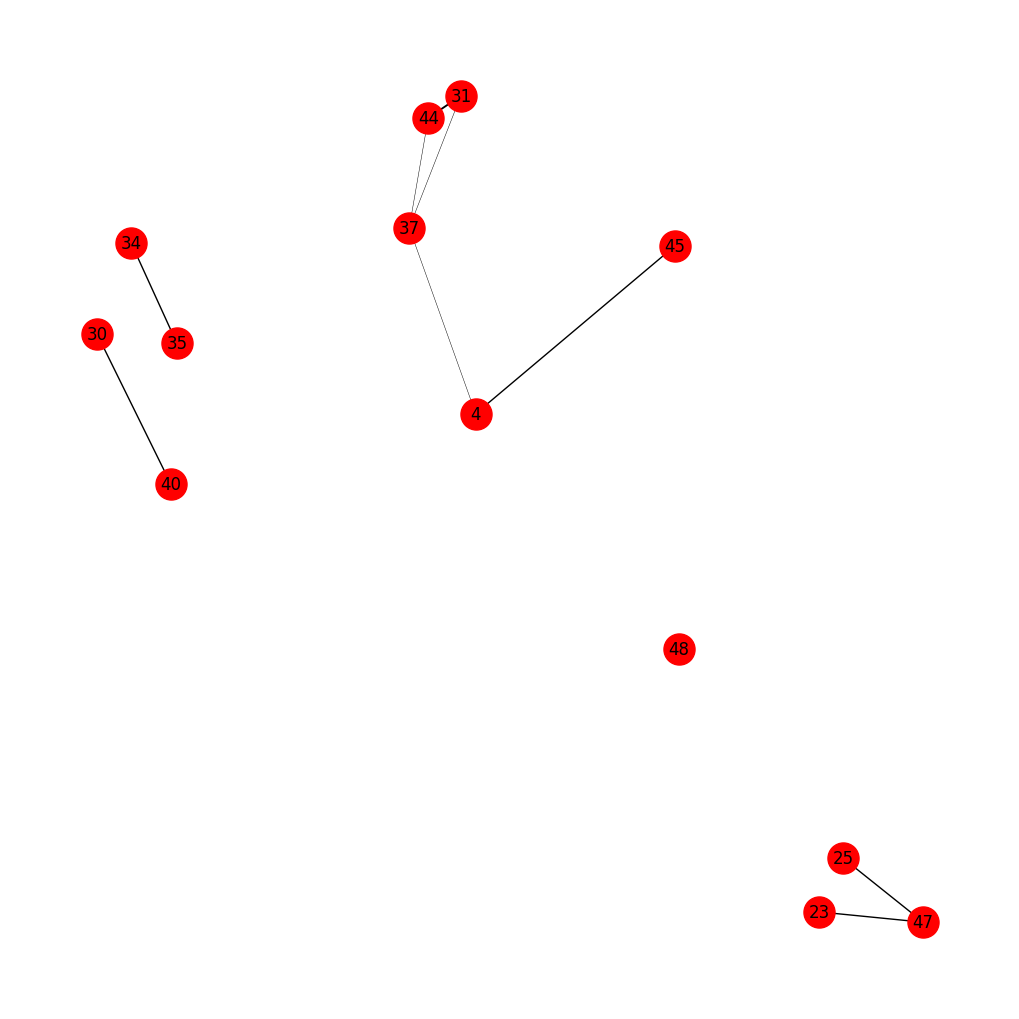

In [645]:
plt.rcParams['figure.figsize'] = [10, 10]

edgest_p, weightst_p = zip(*nx.get_edge_attributes(ngn_sg['w_0.3333333333333333'],'weight').items())

nx.draw(ngn_sg['w_0.3333333333333333'], pos, node_color='r',with_labels=True, edgelist=edgest_p, node_size = 500, width = weightst_p)

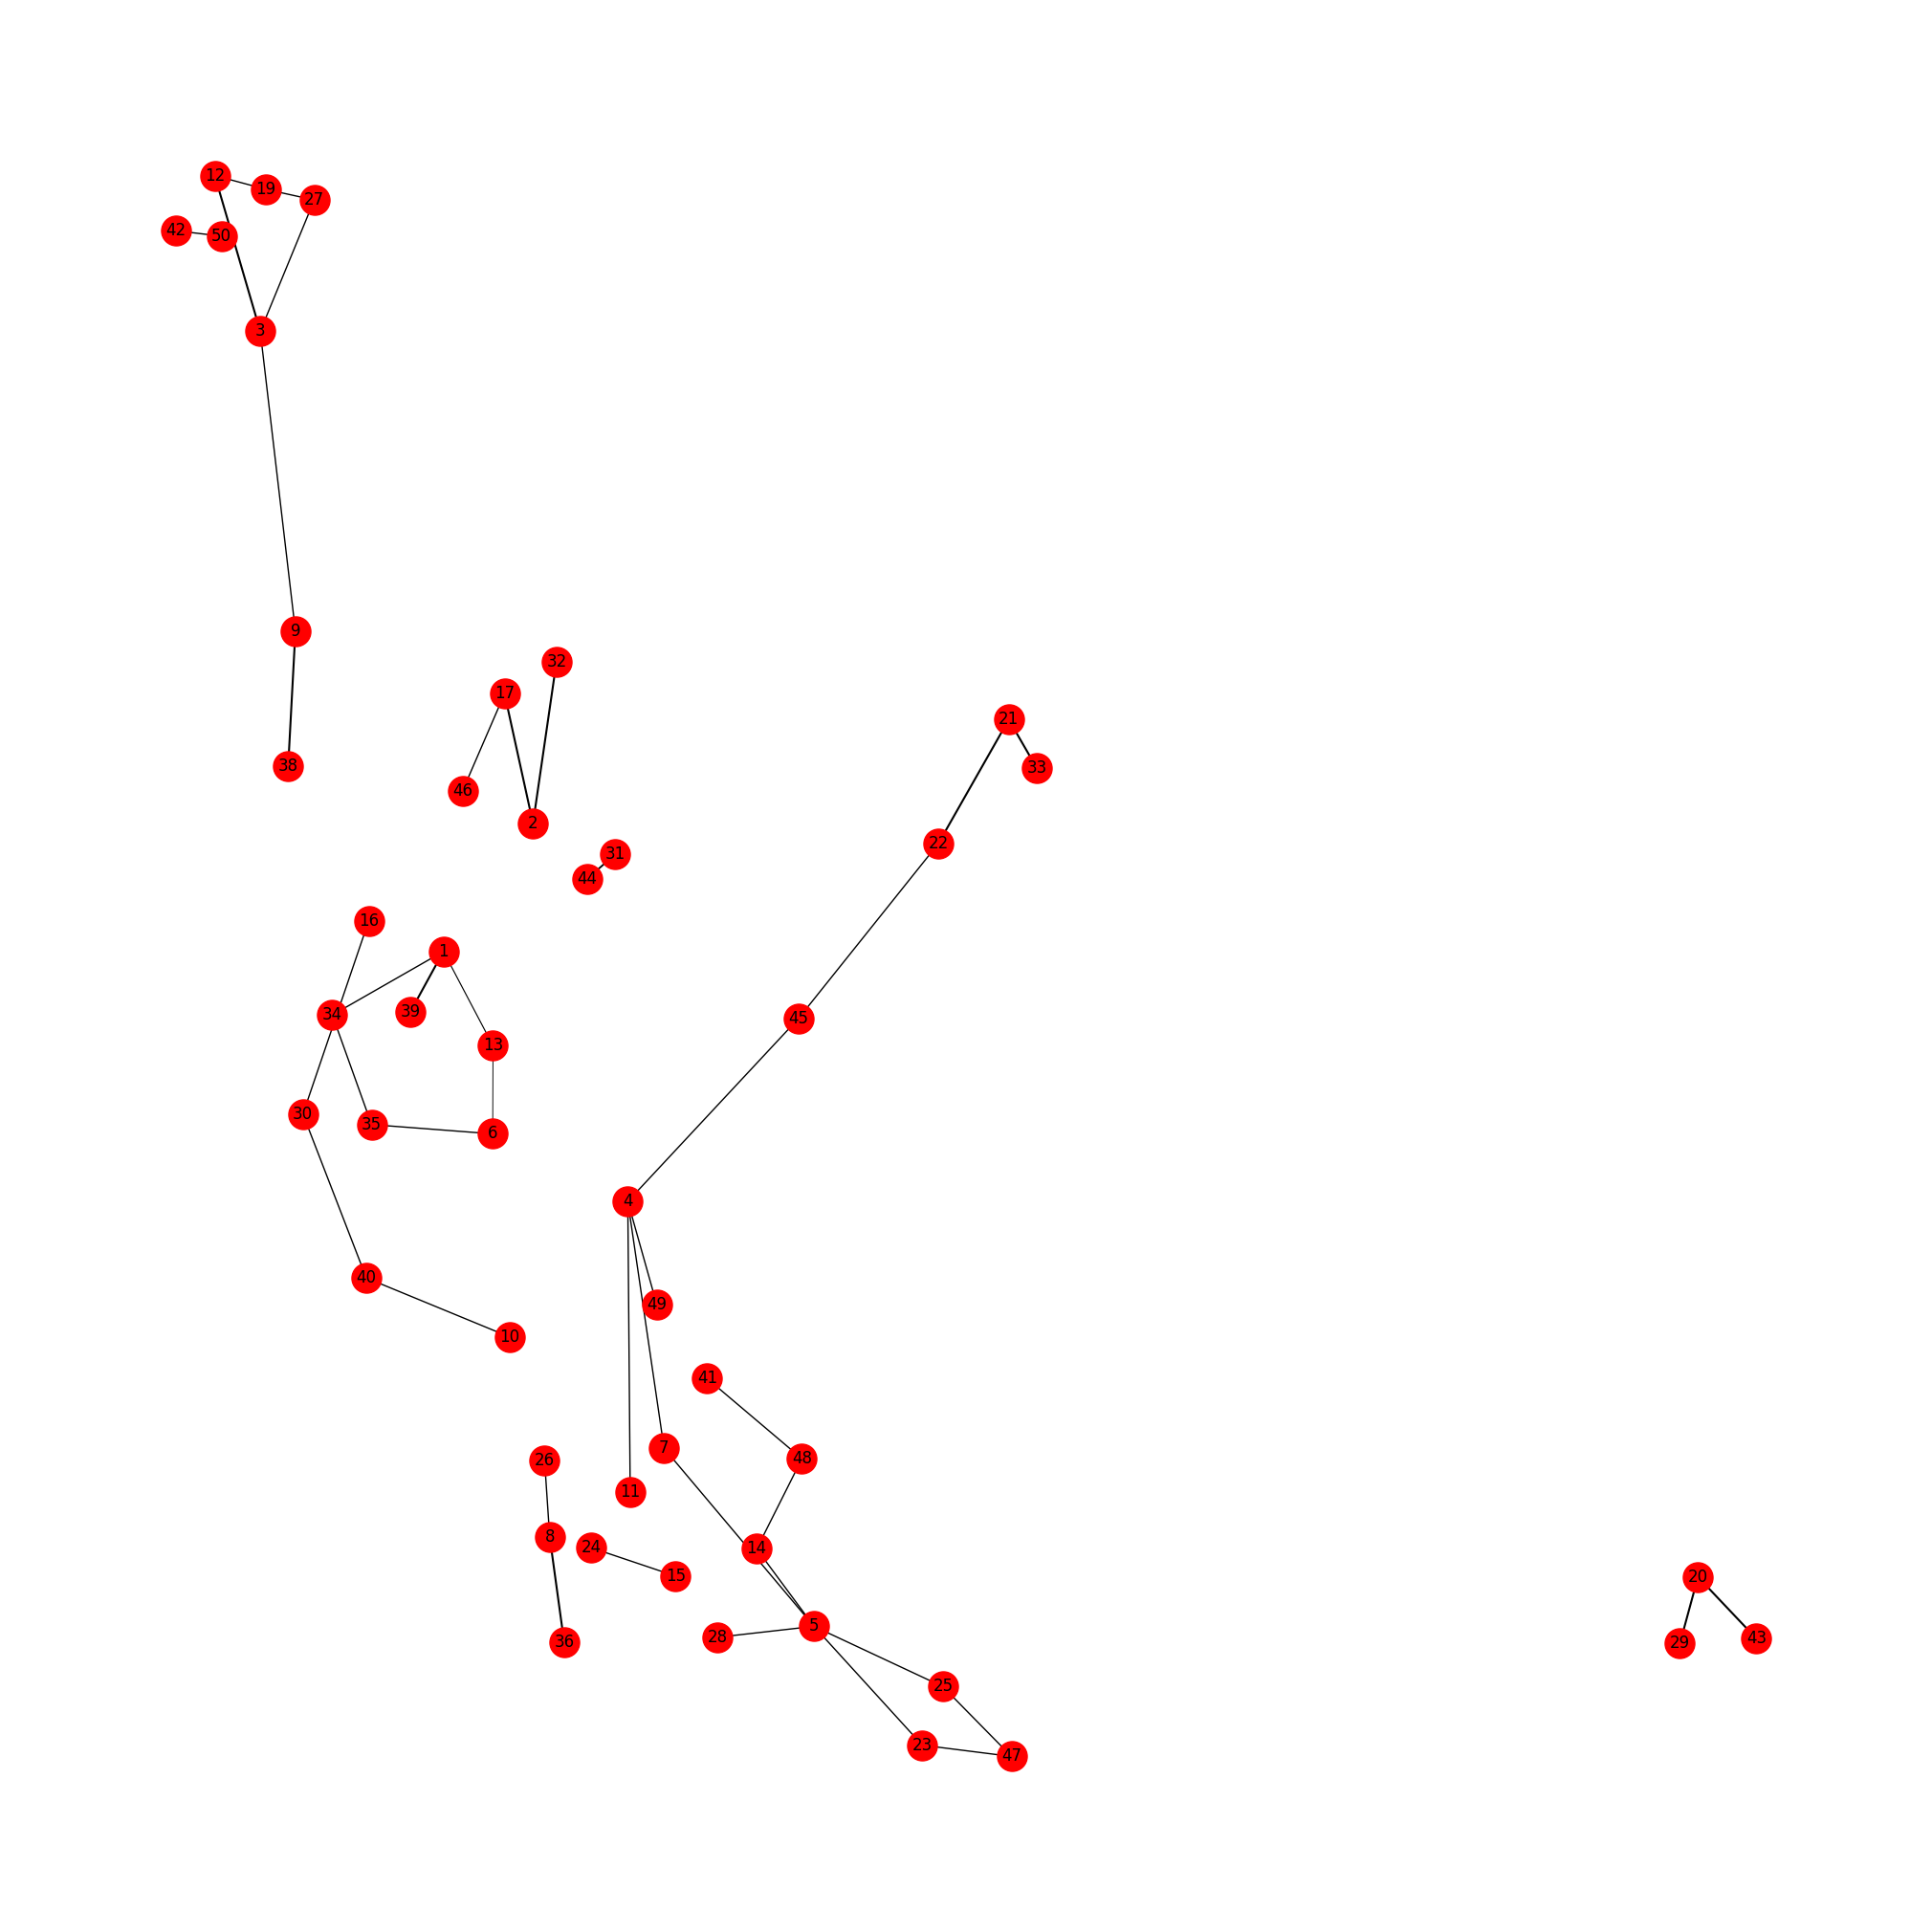

In [646]:
plt.rcParams['figure.figsize'] = [20, 20]

edgest_p, weightst_p = zip(*nx.get_edge_attributes(graphs['graph_2'],'weight').items())

nx.draw(graphs['graph_2'], pos, node_color='r',with_labels=True, edgelist=edgest_p, node_size = 500, width = weightst_p)

In [647]:
graphs

{'graph_0': <networkx.classes.graph.Graph at 0x14cbaa8feb0>,
 'graph_1': <networkx.classes.graph.Graph at 0x14cbb60e970>,
 'graph_2': <networkx.classes.graph.Graph at 0x14cbb60e850>,
 'graph_3': <networkx.classes.graph.Graph at 0x14cbb23c9d0>,
 'graph_4': <networkx.classes.graph.Graph at 0x14cd70ab9a0>,
 'graph_5': <networkx.classes.graph.Graph at 0x14cbb1cbeb0>,
 'graph_6': <networkx.classes.graph.Graph at 0x14cbb1cb400>,
 'graph_7': <networkx.classes.graph.Graph at 0x14cbb1cbee0>}

In [648]:
weightlist

[0.0,
 0.3333333333333333,
 0.5,
 0.6666666666666666,
 0.8333333333333333,
 1.0,
 1.3333333333333333,
 1.5]

In [649]:
clustering_ABCD = Clustering(ABCD_groups)

clustering_clique = {}

similarities = []

for i in range(1, len(clique_groups) + 1):
    clustering_clique[i] = Clustering(clique_groups['w_%s' % weightlist[i-1]])
    similarities.append( sim.element_sim(clustering_ABCD, clustering_clique[i], alpha = 0.9))
    print("Element-centric Similarity No.%s:" %i, sim.element_sim(clustering_ABCD, clustering_clique[i], alpha = 0.9) )
    

#clustering2 = Clustering(clique_groups['w_0.0'])

Element-centric Similarity No.1: 0.4543154213239312
Element-centric Similarity No.2: 0.4382493238821486
Element-centric Similarity No.3: 0.12799999999999978
Element-centric Similarity No.4: 0.12799999999999978
Element-centric Similarity No.5: 0.12799999999999978
Element-centric Similarity No.6: 0.12799999999999978
Element-centric Similarity No.7: 0.12799999999999978
Element-centric Similarity No.8: 0.12799999999999978


'fig, ax = plt.subplots()\n\nax.plot(weightlist, similarities, color="blue")                  # set line color to blue\nax.set_xlabel(\'Weight Bigger than\')\nax.set_ylabel(\'Max community sizes\', color="blue")        # set y axis title to blue\nax.tick_params(axis=\'y\', colors="blue")  \nax.grid(True)# set y axis tick labels to blue\n\n# We create another axis object. It shares the same x axis as ax, but the y-axis is separate.\nax2 = ax.twinx()\nax2.plot(weightlist, susceptibility, color="red", linestyle = \'dashed\')                  # set line color to red\nax2.set_ylabel(\'Phase shift\', color="red")        # set y axis title to red\nax2.tick_params(axis=\'y\', colors="red")       # set y axis tick labels to red\nax2.grid(True)\n\nplt.show()'

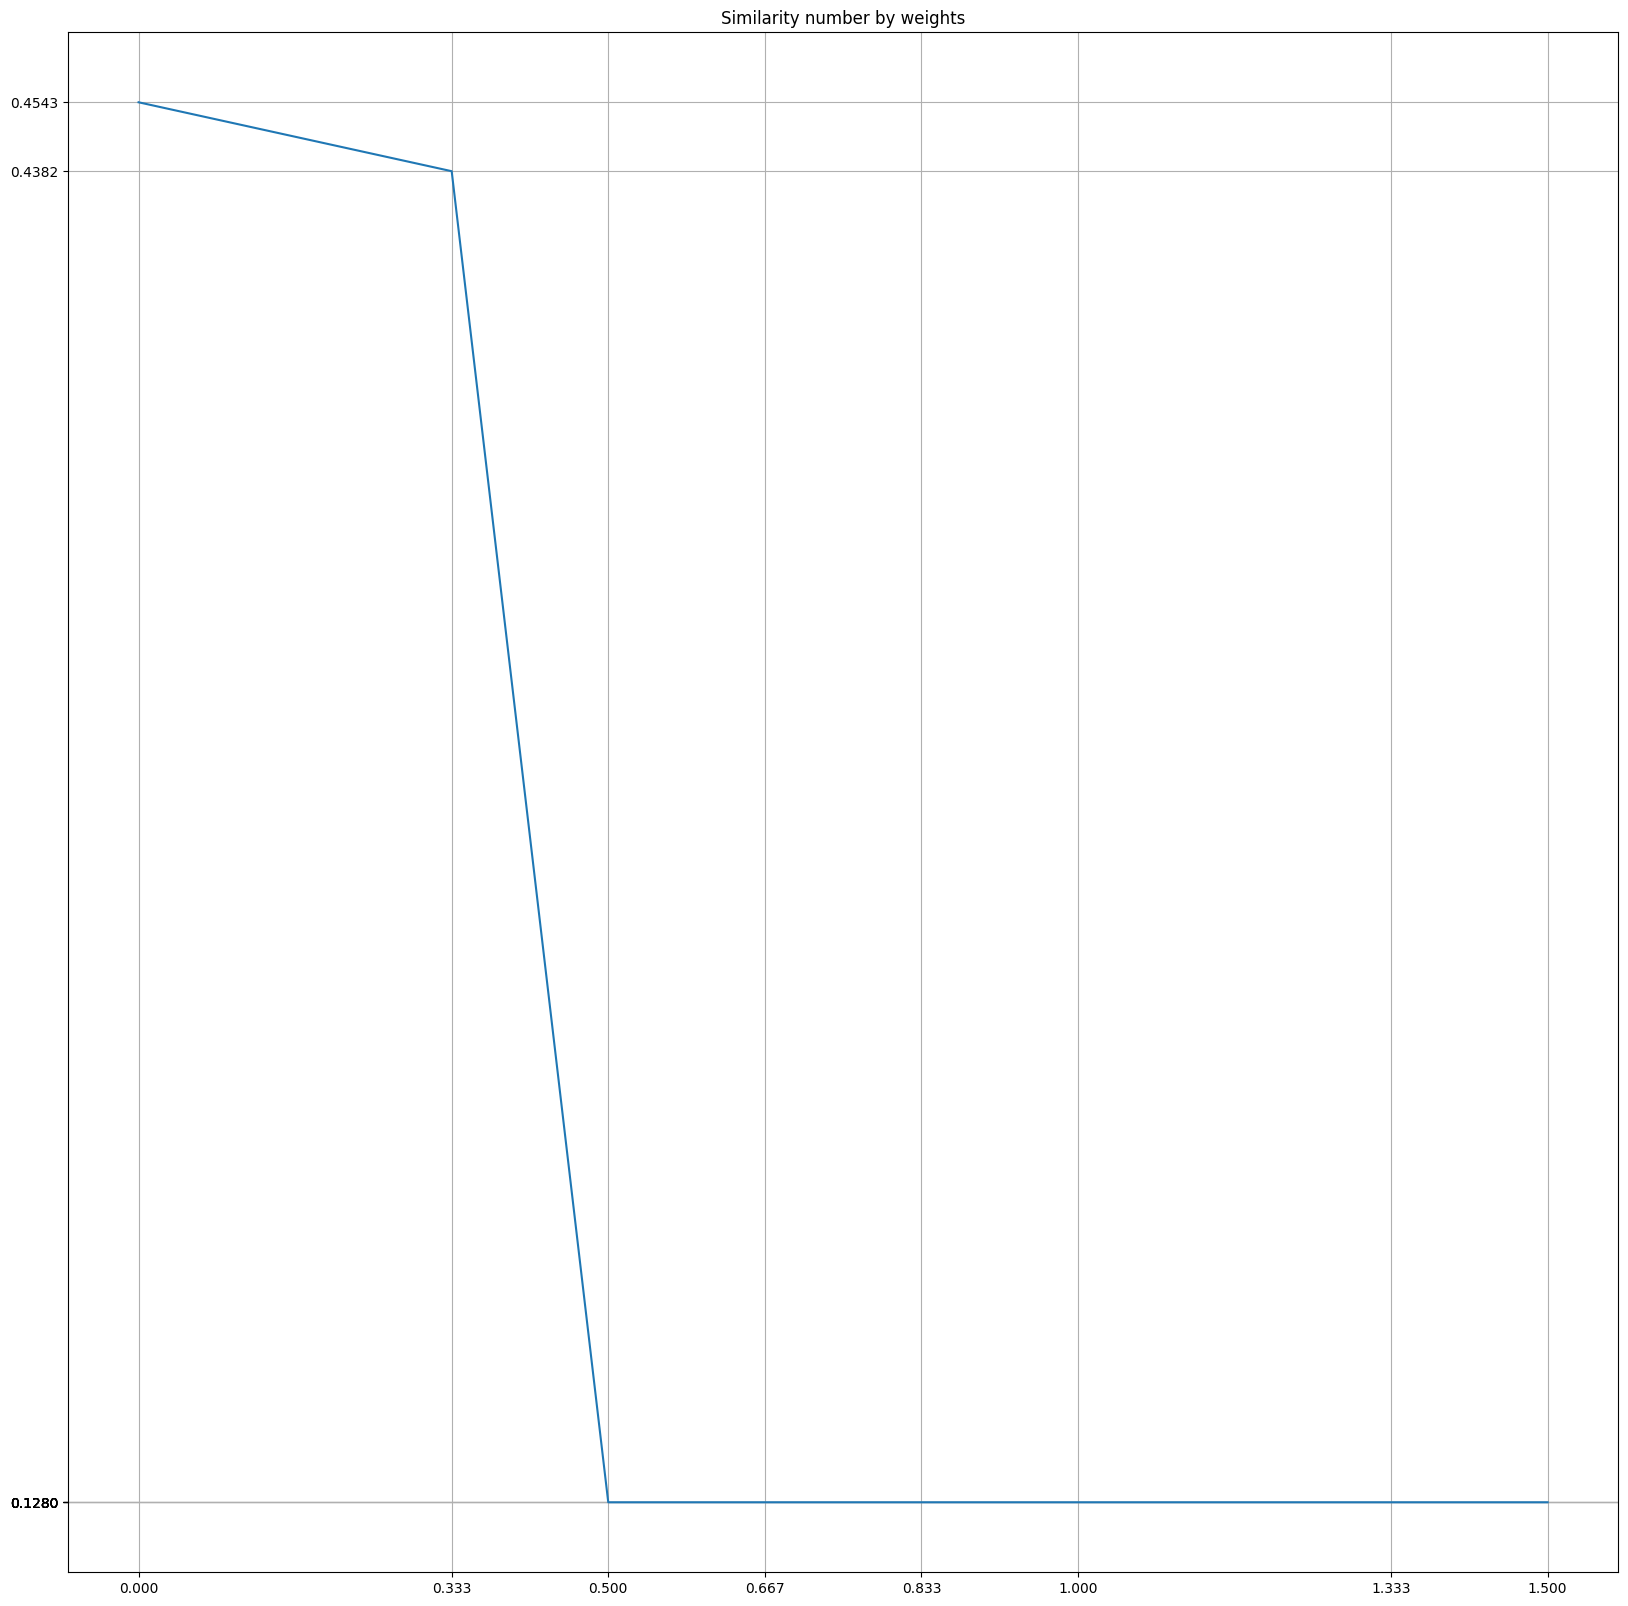

In [650]:
plt.plot(weightlist, similarities)
plt.xticks(weightlist)
plt.yticks(similarities)
plt.title('Similarity number by weights')
plt.grid(True)



"""fig, ax = plt.subplots()

ax.plot(weightlist, similarities, color="blue")                  # set line color to blue
ax.set_xlabel('Weight Bigger than')
ax.set_ylabel('Max community sizes', color="blue")        # set y axis title to blue
ax.tick_params(axis='y', colors="blue")  
ax.grid(True)# set y axis tick labels to blue

# We create another axis object. It shares the same x axis as ax, but the y-axis is separate.
ax2 = ax.twinx()
ax2.plot(weightlist, susceptibility, color="red", linestyle = 'dashed')                  # set line color to red
ax2.set_ylabel('Phase shift', color="red")        # set y axis title to red
ax2.tick_params(axis='y', colors="red")       # set y axis tick labels to red
ax2.grid(True)

plt.show()"""